<img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/Logo_Universidad_Politécnica_Salesiana_del_Ecuador.png" width="90%">
<h2>Práctica 3:
    Redes neuronales</h2>
<h3>Integrantes: Michelle Parraga, Andrés Alba </h3>

<h2>3.Diseñar un Modelo de Redes Neuronales (para el dataset HEPATITIS) con los siguientes pasos:
Dataset: https://archive.ics.uci.edu/ml/datasets/Hepatitis

<h3>3.1 Preparación de datos 

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import seaborn as sns
import copy

print("Módulos y clases importados")

Módulos y clases importados


| Cantidad de variables | Cantidad de observaciones | Variable de salida |
|:-----------:|:-----------:|:-----------:|
| <center>19</center>   | <center>155</center> |<center><b>Class: Vivo/Muerto</b></center>  |




| Id | Variable | Descripción breve | Tipo | Técnica a aplicar | Función en Python  |
|-----------|-----------|-----------|-----------|-----------|-----------|
| 1 | EDAD | Años de edad | Numérica discreta| Estandarización| StandardScaler|
| 2 | SEXO| Masculino o Femenino | Categórica nominal | Sistema binario| OneHotEncoder|
| 3 | ESTEROIDES | Si usa o no | Categórica nominal | Sistema binario| OneHotEncoder |
| 4 | ANTIVIRALES | Si usa o no | Categórica nominal|Sistema binario| OneHotEncoder|
| 5 | FATIGA | Si tiene o no| Categórica nominal | Sistema binario| OneHotEncoder|
|6 | MALESTAR | Si tiene o no | Categórica nominal | Sistema binario|OneHotEncoder|
| 7 | ANOREXIA | Si tiene o no | Categórica nominal | Sistema binario|OneHotEncoder|
| 8| HÍGADO GRANDE | Si tiene o no | Categórica nominal| Sistema binario|OneHotEncoder|
| 9 | HÍGADO FIRME | Si tiene o no | Categórica nominal | Sistema binario|OneHotEncoder|
| 10 | ESPÍLEO PALPABLE | Si tiene o no | Categórica nominal |Sistema binario|OneHotEncoder|
| 11| ARAÑAS | Si tiene o no| Categórica nominal |Sistema binario|OneHotEncoder|
| 12 |  ASCITIS | Si tiene o no | Categórica nominal |Sistema binario|OneHotEncoder|
| 13 | VARICES |Si tiene o no | Categórica nominal |Sistema binario|OneHotEncoder|
| 14 | BILIRRUBINA | niveles de bilirrubina en la sangre,</br> siendo un valor continuo. | Numérica Contínua | Estandarización| StandardScaler|
| 15 |  ALK FOSFATO | niveles de fosfato Alcalino en la sangre.</br>  | Numérica discreta | Estandarización| StandardScaler|
| 16 |SGOT | cantidad de la enzima SGOT en la sangre.  | Numérica discreta |Estandarización| StandardScaler|
| 17 | ALBÚMINA |cantidad de la Albumina en la sangre,</br> siendo un valor continuo. | Numérica Contínua  | Estandarización| StandardScaler|
| 18 | PROTIMA | El tiempo de protrombina es una </br> prueba para evaluar la</br> coagulación de la sangre. | Numérica discreta | Estandarización| StandardScaler|
| 19 | HISTOLOGÍA | Si es histolog@ o no | Categórica nominal| Sistema binario| OneHotEncoder|


<h5>c. Cargar el dataset</h5>

In [2]:
import pandas as pd  
import copy
print("Importaciones hechas")

Importaciones hechas


In [3]:
nombresVariables=['Class','EDAD','SEXO','ESTEROIDES','ANTIVIRALES','FATIGA','MALESTAR','ANOREXIA',' HÍGADO GRANDE','HÍGADO FIRME',
                  'ESPÍLEO PALPABLE','ARAÑAS','ASCITIS','VARICES','BILIRRUBINA','ALK FOSFATO','SGOT','ALBÚMINA',
                  'PROTIMA','HISTOLOGÍA']
dataset = "https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"
dfOriginal = pd.read_csv(dataset, sep = ',', names=nombresVariables)
dataframe=copy.deepcopy(dfOriginal)
print(dataframe.shape)
print('dataset cargado')
dataframe.head(10)



(155, 20)
dataset cargado


,Class,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALESTAR,ANOREXIA,HÍGADO GRANDE,HÍGADO FIRME,ESPÍLEO PALPABLE,ARAÑAS,ASCITIS,VARICES,BILIRRUBINA,ALK FOSFATO,SGOT,ALBÚMINA,PROTIMA,HISTOLOGÍA
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,?,?,?,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,?,48,4.4,?,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,120,3.9,?,1


<h5>d. Realizar preparación de datos con un Pipeline (transformación de variables categóricas a numéricas y transformaciones numéricas). Presentar y guardar el dataset transformado. </h5>

In [4]:
### REEMPLAZO DE ? POR 0 ##
New_DF = dfOriginal.replace('?', '0')

## Separamos nuestra variable de Salida ##
Y=New_DF['Class']

## Eliminamos las variables que no necesitamos ##
New_DF=New_DF.drop(['HISTOLOGÍA'], axis=1)
New_DF=New_DF.drop(['Class'], axis=1)

print(New_DF.shape)
New_DF.head(10)

(155, 18)


,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALESTAR,ANOREXIA,HÍGADO GRANDE,HÍGADO FIRME,ESPÍLEO PALPABLE,ARAÑAS,ASCITIS,VARICES,BILIRRUBINA,ALK FOSFATO,SGOT,ALBÚMINA,PROTIMA
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0
3,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0
5,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75
6,51,1,1,2,1,2,1,2,2,1,1,2,2,0,0,0,0,0
7,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,0,0,0
8,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,0,48,4.4,0
9,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,120,3.9,0


<h6>Función para un resumen de nuestras variables antes de hacer el pipeline</h6>

In [5]:

def descripcionCantidadVariables(dataframePreprocesado, categorical_ordinal_features, categorical_nominal_features,numeric_features):
    cantidadTotalVariables = len(dataframePreprocesado.columns) 
    print('Cantidad de variables antes de procesamiento: ',cantidadTotalVariables)

    cantidadVariablesNominales = len(categorical_nominal_features)
    cantidadVariablesBinarias=0
    for variable in categorical_nominal_features:
        cantidadVariablesBinarias=cantidadVariablesBinarias+dataframePreprocesado[variable].nunique()
    print('Cantidad de variables binarias: ',cantidadVariablesBinarias)
    
    cantidadTotalVariablesConPreprocesado = cantidadTotalVariables - cantidadVariablesNominales + cantidadVariablesBinarias
    print ('Cantidad de variables númericas: ', len(numeric_features))
    print('Cantidad de variables que habrá después de preprocesamiento: ',cantidadTotalVariablesConPreprocesado)
    print('Cantidad de variables de salida: ',len(salida))
    return cantidadTotalVariablesConPreprocesado

Separación de nuestras variables

In [6]:
DFPreproces=copy.deepcopy(New_DF)

categorical_ordinal_features = []
categorical_nominal_features = ['SEXO','ESTEROIDES','ANTIVIRALES','FATIGA','MALESTAR','ANOREXIA',' HÍGADO GRANDE','HÍGADO FIRME',
                  'ESPÍLEO PALPABLE','ARAÑAS','ASCITIS','VARICES'] 
numeric_features = ['EDAD','BILIRRUBINA','ALK FOSFATO','SGOT','ALBÚMINA','PROTIMA']
salida = ['Class']
TotVariablePreProces= descripcionCantidadVariables(DFPreproces, categorical_ordinal_features, categorical_nominal_features,numeric_features)               

Cantidad de variables antes de procesamiento:  18
Cantidad de variables binarias:  34
Cantidad de variables númericas:  6
Cantidad de variables que habrá después de preprocesamiento:  40
Cantidad de variables de salida:  1


<h6>Definición de preprocesadores</h6>

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
print ('Librerias importadas')

Librerias importadas


In [8]:
#1. Preprocesador de variables categóricas a numéricas (ordinales y nominales)

categorical_ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())])

categorical_nominal_transformer_ConNombres = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse = False))])

preprocesorCategoricoNumericoConNombres = ColumnTransformer(
    transformers=[
        ('catord', categorical_ordinal_transformer, categorical_ordinal_features),
        ('catnom', categorical_nominal_transformer_ConNombres, categorical_nominal_features)
    ],remainder='passthrough',n_jobs=-1)

#2. Preprocesador de variables numéricas con transformación MinMaxScaler

minmax_transformer = Pipeline(steps=[
    ('minmax', MinMaxScaler(feature_range=(0, 1)))])

preprocesorMinMax = ColumnTransformer(transformers =[
    ('tranminmax', minmax_transformer, list(range(TotVariablePreProces)))
], remainder ='passthrough')

#3. Preprocesador de variables numéricas con transformación StandardScaler

standardscaler_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=True,with_std=True))])

preprocesorStandardScaler = ColumnTransformer(transformers =[
    ('transcaler', standardscaler_transformer, list(range(TotVariablePreProces)))
], remainder ='passthrough')

#4. Preprocesador de variables numéricas con transformación SimpleImputer

simpleimputer_transformer = Pipeline(steps=[
    ('simpleimputer', SimpleImputer(strategy='median')) #otras: strategy='constant', strategy='most_frequent'
])

preprocesorSimpleImputer = ColumnTransformer(transformers =[
    ('transimpleimputer', simpleimputer_transformer, list(range(TotVariablePreProces)))
], remainder ='passthrough')

print("Preprocesadores y transformadores definidos")

Preprocesadores y transformadores definidos


<h6> Construcción de Pipelines, selección de preprocesadores y aplicación de un Pipeline </h6>

In [9]:
pipe = Pipeline(steps=[
    ('prepcn', preprocesorCategoricoNumericoConNombres), 
    ('prepminmax', preprocesorMinMax) 
    #('prepstandard', preprocesorStandardScaler) 
    #('prepsimple', preprocesorSimpleImputer)
])

X_Preprocesado = pipe.fit_transform(DFPreproces)
print('Pipeline aplicado')

Pipeline aplicado


In [10]:
X_Preprocesado.shape

(155, 40)

In [11]:
X_Preprocesado

array([[0.        , 1.        , 0.        , ..., 0.02777778, 0.625     ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.06481481, 0.546875  ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.04938272, 0.625     ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.0308642 , 0.640625  ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02932099, 0.640625  ,
        0.48      ],
       [1.        , 0.        , 0.        , ..., 0.02932099, 0.484375  ,
        0.42      ]])

<h6>Guardar y cargar Pipeline</h6>

In [12]:
##Importar las librerias necesarias
import pickle
print ('Librerias pickle importada correctamente')
# Funciones para guardar y cargar un Pipeline

def guardarPipeline(pipeline,nombreArchivo):
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)

def cargarPipeline(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
    return pipeline

Librerias pickle importada correctamente


In [13]:
## Guardado del Pipeline
guardarPipeline(pipe,'pipePreprocesadores')

pipe=None
pipe=cargarPipeline('pipePreprocesadores')
print(pipe)

Pipeline(steps=[('prepcn',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('catord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  []),
                                                 ('catnom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['SEXO', 'ESTEROIDES',
                                                   'ANTIVIRALES', 'FATIGA',
                                                   'MALESTAR', 'ANOREXIA',
                                                   ' HÍGADO GRANDE',
                                                   'HÍGADO FIRME',
                         

<h6>Guardar dataframe preprocesado</h6>

In [14]:
pipe.named_steps['prepcn'].transformers_[1]

('catnom',
 Pipeline(steps=[('onehot', OneHotEncoder(sparse=False, sparse_output=False))]),
 ['SEXO',
  'ESTEROIDES',
  'ANTIVIRALES',
  'FATIGA',
  'MALESTAR',
  'ANOREXIA',
  ' HÍGADO GRANDE',
  'HÍGADO FIRME',
  'ESPÍLEO PALPABLE',
  'ARAÑAS',
  'ASCITIS',
  'VARICES'])

In [15]:
print('Cantidad de variables después de preprocesamiento: ',TotVariablePreProces)
print('Cantidad de variables de salida: ',1)

categorical_ordinal_features = []
categorical_nominal_features = ['SEXO','ESTEROIDES','ANTIVIRALES','FATIGA','MALESTAR','ANOREXIA',' HÍGADO GRANDE','HÍGADO FIRME',
                  'ESPÍLEO PALPABLE','ARAÑAS','ASCITIS','VARICES'] 
numeric_features = ['EDAD','BILIRRUBINA','ALK FOSFATO','SGOT','ALBÚMINA','PROTIMA']

cnamesDataset1=[]
cnamesDataset1.extend(categorical_ordinal_features)

cnamesDataset2 = pipe.named_steps['prepcn'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names_out(categorical_nominal_features)

cnamesDataset3 = numeric_features

cnamesDataset1.extend(cnamesDataset2)
cnamesDataset1.extend(cnamesDataset3)
print(cnamesDataset1)


DFPreproces = pd.DataFrame(data=X_Preprocesado,columns=cnamesDataset1)
DFPreproces.head()
DFPreproces = pd.concat([DFPreproces, dfOriginal[salida]], axis = 1)
DFPreproces.to_csv("DatasetHepatitisPreprocesado.csv", sep=";",index = False)
DFPreproces.head()

Cantidad de variables después de preprocesamiento:  40
Cantidad de variables de salida:  1
['SEXO_1', 'SEXO_2', 'ESTEROIDES_0', 'ESTEROIDES_1', 'ESTEROIDES_2', 'ANTIVIRALES_1', 'ANTIVIRALES_2', 'FATIGA_0', 'FATIGA_1', 'FATIGA_2', 'MALESTAR_0', 'MALESTAR_1', 'MALESTAR_2', 'ANOREXIA_0', 'ANOREXIA_1', 'ANOREXIA_2', ' HÍGADO GRANDE_0', ' HÍGADO GRANDE_1', ' HÍGADO GRANDE_2', 'HÍGADO FIRME_0', 'HÍGADO FIRME_1', 'HÍGADO FIRME_2', 'ESPÍLEO PALPABLE_0', 'ESPÍLEO PALPABLE_1', 'ESPÍLEO PALPABLE_2', 'ARAÑAS_0', 'ARAÑAS_1', 'ARAÑAS_2', 'ASCITIS_0', 'ASCITIS_1', 'ASCITIS_2', 'VARICES_0', 'VARICES_1', 'VARICES_2', 'EDAD', 'BILIRRUBINA', 'ALK FOSFATO', 'SGOT', 'ALBÚMINA', 'PROTIMA']


,SEXO_1,SEXO_2,ESTEROIDES_0,ESTEROIDES_1,ESTEROIDES_2,ANTIVIRALES_1,ANTIVIRALES_2,FATIGA_0,FATIGA_1,FATIGA_2,...,VARICES_0,VARICES_1,VARICES_2,EDAD,BILIRRUBINA,ALK FOSFATO,SGOT,ALBÚMINA,PROTIMA,Class
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.323944,0.1250,0.288136,0.027778,0.625000,0.0,2
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.605634,0.1125,0.457627,0.064815,0.546875,0.0,2
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.000000,0.0875,0.325424,0.049383,0.625000,0.0,2
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.338028,0.0875,0.155932,0.080247,0.625000,0.8,2
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.380282,0.1250,0.000000,0.308642,0.625000,0.0,2


<h3>3. Estadística descriptiva </h3>

<h5>a. calcular las medidas descriptivas y generar conclusiones de la media y la desviación estándar de una variable que considere interesante </h5>

In [16]:
DFPreproces.describe() 

,SEXO_1,SEXO_2,ESTEROIDES_0,ESTEROIDES_1,ESTEROIDES_2,ANTIVIRALES_1,ANTIVIRALES_2,FATIGA_0,FATIGA_1,FATIGA_2,...,VARICES_0,VARICES_1,VARICES_2,EDAD,BILIRRUBINA,ALK FOSFATO,SGOT,ALBÚMINA,PROTIMA,Class
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,...,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.896774,0.103226,0.006452,0.490323,0.503226,0.154839,0.845161,0.006452,0.645161,0.348387,...,0.032258,0.116129,0.851613,0.481690,0.171532,0.290235,0.129132,0.534879,0.351161,1.793548
std,0.305240,0.305240,0.080322,0.501527,0.501610,0.362923,0.362923,0.080322,0.480015,0.478004,...,0.177257,0.321418,0.356636,0.176984,0.152499,0.210379,0.138160,0.205991,0.352219,0.406070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.352113,0.087500,0.172881,0.047068,0.476562,0.000000,2.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.450704,0.125000,0.284746,0.084877,0.609375,0.350000,2.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.605634,0.187500,0.405085,0.152778,0.656250,0.650000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


<h5>b. Calcular las correlaciones entre todas las variables</h5>

In [17]:
cr=DFPreproces.corr()
cr.head(41)

,SEXO_1,SEXO_2,ESTEROIDES_0,ESTEROIDES_1,ESTEROIDES_2,ANTIVIRALES_1,ANTIVIRALES_2,FATIGA_0,FATIGA_1,FATIGA_2,...,VARICES_0,VARICES_1,VARICES_2,EDAD,BILIRRUBINA,ALK FOSFATO,SGOT,ALBÚMINA,PROTIMA,Class
SEXO_1,1.000000,-1.000000,0.027340,-0.048985,0.044599,-0.089249,0.089249,0.027340,-0.074340,0.070059,...,-0.058072,0.056792,-0.022321,-0.008126,0.039341,-0.162851,0.008991,0.018906,-0.067128,-0.173051
SEXO_2,-1.000000,1.000000,-0.027340,0.048985,-0.044599,0.089249,-0.089249,-0.027340,0.074340,-0.070059,...,0.058072,-0.056792,0.022321,0.008126,-0.039341,0.162851,-0.008991,-0.018906,0.067128,0.173051
ESTEROIDES_0,0.027340,-0.027340,1.000000,-0.079037,-0.081104,0.188265,-0.188265,-0.006494,-0.108657,0.110206,...,-0.014712,-0.029209,0.033637,-0.065622,-0.044548,-0.051609,-0.028605,0.035369,0.103020,0.041102
ESTEROIDES_1,-0.048985,0.048985,-0.079037,1.000000,-0.987177,0.043961,-0.043961,0.082157,0.160968,-0.175451,...,0.040056,-0.073548,0.046376,0.090466,0.020253,0.059860,0.030734,-0.219649,-0.066839,-0.137413
ESTEROIDES_2,0.044599,-0.044599,-0.081104,-0.987177,1.000000,-0.074101,0.074101,-0.081104,-0.143542,0.157775,...,-0.037694,0.078213,-0.051755,-0.079943,-0.013117,-0.051586,-0.026149,0.213949,0.050331,0.130809
ANTIVIRALES_1,-0.089249,0.089249,0.188265,0.043961,-0.074101,1.000000,-1.000000,-0.034491,-0.055310,0.061339,...,-0.078146,-0.155148,0.178668,0.013100,-0.177958,-0.041764,-0.095980,0.153939,0.276452,0.130196
ANTIVIRALES_2,0.089249,-0.089249,-0.188265,-0.043961,0.074101,-1.000000,1.000000,0.034491,0.055310,-0.061339,...,0.078146,0.155148,-0.178668,-0.013100,0.177958,0.041764,0.095980,-0.153939,-0.276452,-0.130196
FATIGA_0,0.027340,-0.027340,-0.006494,0.082157,-0.081104,-0.034491,0.034491,1.000000,-0.108657,-0.058922,...,0.441367,-0.029209,-0.193047,-0.046322,-0.090933,-0.111530,-0.075561,-0.209919,-0.080601,0.041102
FATIGA_1,-0.074340,0.074340,-0.108657,0.160968,-0.143542,-0.055310,0.055310,-0.108657,1.000000,-0.985950,...,-0.017233,0.184642,-0.157844,0.285284,0.279140,0.149979,0.204176,-0.132600,-0.048244,-0.311644
FATIGA_2,0.070059,-0.070059,0.110206,-0.175451,0.157775,0.061339,-0.061339,-0.058922,-0.985950,1.000000,...,-0.056860,-0.180511,0.190947,-0.278701,-0.265035,-0.131869,-0.192338,0.168432,0.061991,0.306049


<h5>c. Realizar un mapa de calor con los valores de las correlaciones  </h5>

Libreria numpy,seaborn y matplotlib importadas correctamente


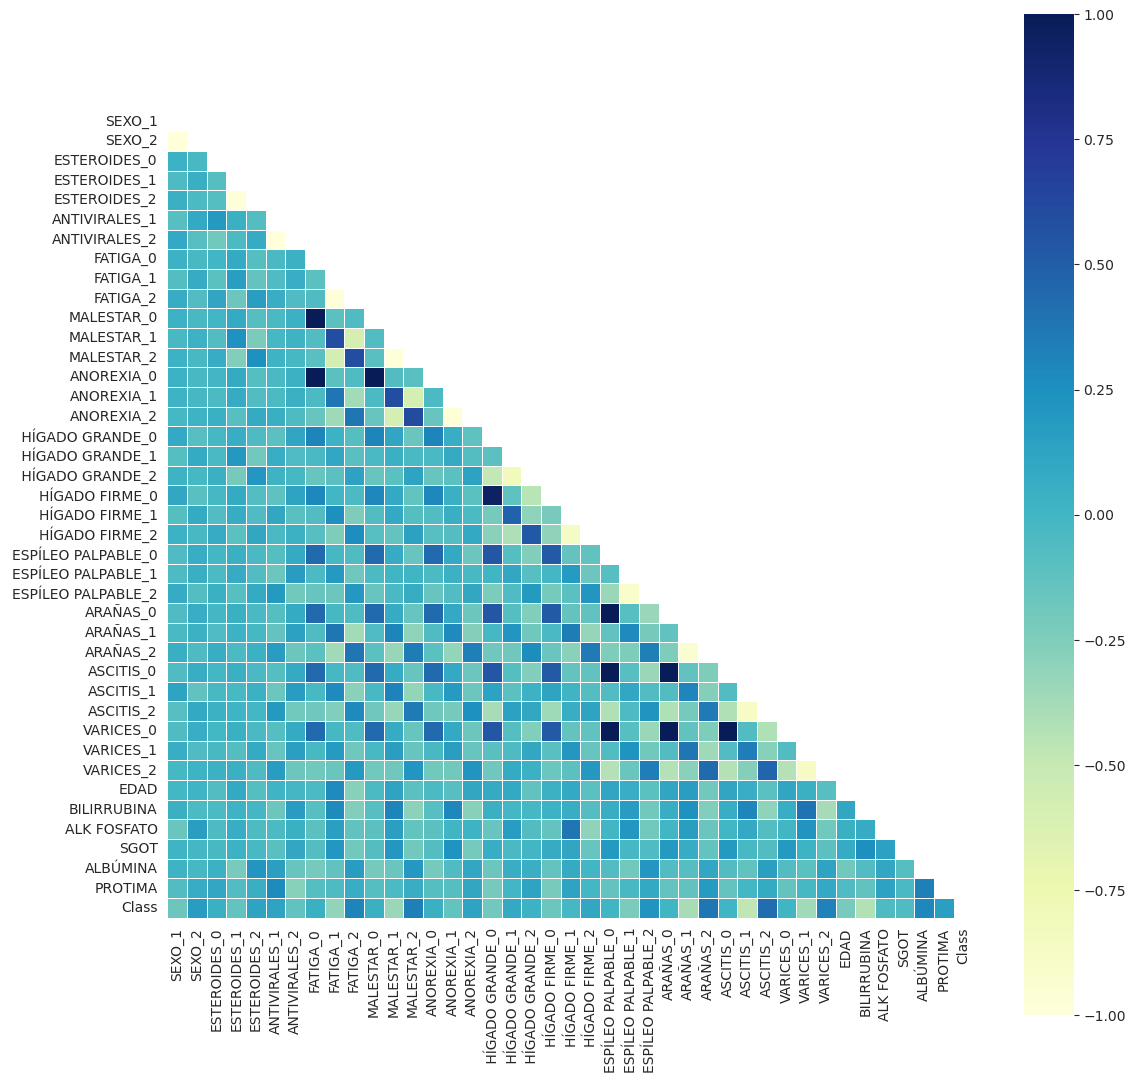

In [18]:
## Importar librerias 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt 
print('Libreria numpy,seaborn y matplotlib importadas correctamente')

mask = np.zeros_like(cr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 13))
    ax = sns.heatmap(cr, mask=mask, square=True, linewidths=.5, cmap="YlGnBu")
plt.savefig('attribute_correlations.png')

<h3>3.2 Desarrollo y entrenamiento de una Red Neuronal (arquitectura de 4 capas - L1:256, L2:128, L3:64, L4:1). Guardar 
el modelo en un archivo h5

In [57]:
#Modelo secuencial quiere decir que agregaremos capas y se conectarán de manera secuencial.
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.models import model_from_json
from tensorflow.keras import layers
#json:  {l1:'8',l2:'1'}
from sklearn.model_selection import train_test_split
from keras.models import load_model

from sklearn import metrics 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


print('Librerías importadas')

def guardarRNN(model,nombreArchivo):
    print("Guardando Red Neuronal en Archivo")  
    model.save(nombreArchivo+'.h5')
    print("Red Neuronal Grabada en Archivo")   
    
def cargarRNN(nombreArchivo):
    model = load_model(nombreArchivo+'.h5')    
    print("Red Neuronal Cargada desde Archivo") 
    return model
print('Funciones definidas')



Librerías importadas
Funciones definidas


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_Preprocesado, Y, test_size=.2, random_state=12)

#Construcción del Modelo o Arquitectura de Redes Neoronales
model = Sequential()

#La primera capa Dense recibe el numero de variables, que es la segunda dimensión de la matriz X, esto es X_train.shape[1]
#La primera capa tiene 3 neuronas. La función de activación es la función sigmoide.

model.add(Dense(64, input_shape=(X_train.shape[1],), activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

#Como tenemos dos posibles salidas "0 o 1", vamos a escoger que el error lo trate como una clasificación binaria, 
#el optimizador será nuestra función derivada que nos ayudará a determinar hacia donde mover los pesos.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 64)                2624      
                                                                 
 dense_44 (Dense)            (None, 32)                2080      
                                                                 
 dense_45 (Dense)            (None, 16)                528       
                                                                 
 dense_46 (Dense)            (None, 1)                 17        
                                                                 
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________


In [96]:
#Entrenamiento: 

history = model.fit(X_train, y_train, epochs=25000, batch_size=X_train.shape[0], verbose=2)
#history = model.fit(X_train, y_train, epochs=10000, batch_size=X_train.shape[0], verbose=2, validation_split=0.2)

score = model.evaluate(X_train, y_train, verbose=0)
print('Resultado en Train:')
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

#Fase de Testing
score = model.evaluate(X_test, y_test, verbose=0)
print('Resultado en Test:')
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

#mostrar pesos de la red
#print(model.get_weights())

#Guardar pesos y la arquitectura de la red en un archivo 

guardarRNN(model,'RNNHepatitis')

Epoch 1/25000
1/1 - 1s - loss: -1.8211e-01 - accuracy: 0.2016 - 1s/epoch - 1s/step
Epoch 2/25000
1/1 - 0s - loss: -2.3364e-01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 3/25000
1/1 - 0s - loss: -2.8478e-01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 4/25000
1/1 - 0s - loss: -3.3551e-01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5/25000
1/1 - 0s - loss: -3.8579e-01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 6/25000
1/1 - 0s - loss: -4.3558e-01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7/25000
1/1 - 0s - loss: -4.8485e-01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8/25000
1/1 - 0s - loss: -5.3358e-01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9/25000
1/1 - 0s - loss: -5.8174e-01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10/25000
1/1 - 0s - loss: -6.2930e-01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 11/25000
1/1 - 0s - loss: -6.7626e-01 - accuracy: 0.2016 - 15ms/epoch - 15ms/step
Epoch 12/25000
1/1 - 0s - loss: -7.2259e-01 - accuracy: 0.201

Epoch 96/25000
1/1 - 0s - loss: -3.0385e+00 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 97/25000
1/1 - 0s - loss: -3.0566e+00 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 98/25000
1/1 - 0s - loss: -3.0746e+00 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 99/25000
1/1 - 0s - loss: -3.0924e+00 - accuracy: 0.2016 - 3ms/epoch - 3ms/step
Epoch 100/25000
1/1 - 0s - loss: -3.1101e+00 - accuracy: 0.2016 - 4ms/epoch - 4ms/step
Epoch 101/25000
1/1 - 0s - loss: -3.1277e+00 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 102/25000
1/1 - 0s - loss: -3.1451e+00 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 103/25000
1/1 - 0s - loss: -3.1624e+00 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 104/25000
1/1 - 0s - loss: -3.1796e+00 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 105/25000
1/1 - 0s - loss: -3.1966e+00 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 106/25000
1/1 - 0s - loss: -3.2135e+00 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 107/25000
1/1 - 0s - loss: -3.2303e+0

Epoch 190/25000
1/1 - 0s - loss: -4.3123e+00 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 191/25000
1/1 - 0s - loss: -4.3233e+00 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 192/25000
1/1 - 0s - loss: -4.3343e+00 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 193/25000
1/1 - 0s - loss: -4.3453e+00 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 194/25000
1/1 - 0s - loss: -4.3562e+00 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 195/25000
1/1 - 0s - loss: -4.3671e+00 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 196/25000
1/1 - 0s - loss: -4.3780e+00 - accuracy: 0.2016 - 4ms/epoch - 4ms/step
Epoch 197/25000
1/1 - 0s - loss: -4.3889e+00 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 198/25000
1/1 - 0s - loss: -4.3997e+00 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 199/25000
1/1 - 0s - loss: -4.4106e+00 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 200/25000
1/1 - 0s - loss: -4.4214e+00 - accuracy: 0.2016 - 1ms/epoch - 1ms/step
Epoch 201/25000
1/1 - 0s - loss: -4.4

Epoch 284/25000
1/1 - 0s - loss: -5.2827e+00 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 285/25000
1/1 - 0s - loss: -5.2926e+00 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 286/25000
1/1 - 0s - loss: -5.3025e+00 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 287/25000
1/1 - 0s - loss: -5.3124e+00 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 288/25000
1/1 - 0s - loss: -5.3222e+00 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 289/25000
1/1 - 0s - loss: -5.3321e+00 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 290/25000
1/1 - 0s - loss: -5.3420e+00 - accuracy: 0.2016 - 0s/epoch - 0s/step
Epoch 291/25000
1/1 - 0s - loss: -5.3518e+00 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 292/25000
1/1 - 0s - loss: -5.3617e+00 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 293/25000
1/1 - 0s - loss: -5.3715e+00 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 294/25000
1/1 - 0s - loss: -5.3813e+00 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 295/25000
1/1 - 0s - loss: -5.391

Epoch 378/25000
1/1 - 0s - loss: -6.2013e+00 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 379/25000
1/1 - 0s - loss: -6.2114e+00 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 380/25000
1/1 - 0s - loss: -6.2215e+00 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 381/25000
1/1 - 0s - loss: -6.2316e+00 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 382/25000
1/1 - 0s - loss: -6.2418e+00 - accuracy: 0.2016 - 996us/epoch - 996us/step
Epoch 383/25000
1/1 - 0s - loss: -6.2520e+00 - accuracy: 0.2016 - 15ms/epoch - 15ms/step
Epoch 384/25000
1/1 - 0s - loss: -6.2622e+00 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 385/25000
1/1 - 0s - loss: -6.2725e+00 - accuracy: 0.2016 - 4ms/epoch - 4ms/step
Epoch 386/25000
1/1 - 0s - loss: -6.2828e+00 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 387/25000
1/1 - 0s - loss: -6.2932e+00 - accuracy: 0.2016 - 4ms/epoch - 4ms/step
Epoch 388/25000
1/1 - 0s - loss: -6.3036e+00 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 389/25000
1/1 - 0s - loss

Epoch 472/25000
1/1 - 0s - loss: -7.4602e+00 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 473/25000
1/1 - 0s - loss: -7.4739e+00 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 474/25000
1/1 - 0s - loss: -7.4876e+00 - accuracy: 0.2016 - 15ms/epoch - 15ms/step
Epoch 475/25000
1/1 - 0s - loss: -7.5012e+00 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 476/25000
1/1 - 0s - loss: -7.5148e+00 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 477/25000
1/1 - 0s - loss: -7.5283e+00 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 478/25000
1/1 - 0s - loss: -7.5418e+00 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 479/25000
1/1 - 0s - loss: -7.5553e+00 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 480/25000
1/1 - 0s - loss: -7.5687e+00 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 481/25000
1/1 - 0s - loss: -7.5822e+00 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 482/25000
1/1 - 0s - loss: -7.5955e+00 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 483/25000
1/1 - 0s - loss: -7

Epoch 566/25000
1/1 - 0s - loss: -8.6514e+00 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 567/25000
1/1 - 0s - loss: -8.6634e+00 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 568/25000
1/1 - 0s - loss: -8.6755e+00 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 569/25000
1/1 - 0s - loss: -8.6875e+00 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 570/25000
1/1 - 0s - loss: -8.6995e+00 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 571/25000
1/1 - 0s - loss: -8.7115e+00 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 572/25000
1/1 - 0s - loss: -8.7235e+00 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 573/25000
1/1 - 0s - loss: -8.7355e+00 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 574/25000
1/1 - 0s - loss: -8.7475e+00 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 575/25000
1/1 - 0s - loss: -8.7594e+00 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 576/25000
1/1 - 0s - loss: -8.7714e+00 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 577/25000
1/1 - 0s - loss: -8.7834e+0

Epoch 660/25000
1/1 - 0s - loss: -9.7543e+00 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 661/25000
1/1 - 0s - loss: -9.7658e+00 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 662/25000
1/1 - 0s - loss: -9.7773e+00 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 663/25000
1/1 - 0s - loss: -9.7888e+00 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 664/25000
1/1 - 0s - loss: -9.8002e+00 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 665/25000
1/1 - 0s - loss: -9.8117e+00 - accuracy: 0.2016 - 0s/epoch - 0s/step
Epoch 666/25000
1/1 - 0s - loss: -9.8232e+00 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 667/25000
1/1 - 0s - loss: -9.8347e+00 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 668/25000
1/1 - 0s - loss: -9.8461e+00 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 669/25000
1/1 - 0s - loss: -9.8576e+00 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 670/25000
1/1 - 0s - loss: -9.8690e+00 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 671/25000
1/1 - 0s - loss: -9.880

Epoch 754/25000
1/1 - 0s - loss: -1.0820e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 755/25000
1/1 - 0s - loss: -1.0831e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 756/25000
1/1 - 0s - loss: -1.0843e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 757/25000
1/1 - 0s - loss: -1.0854e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 758/25000
1/1 - 0s - loss: -1.0865e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 759/25000
1/1 - 0s - loss: -1.0876e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 760/25000
1/1 - 0s - loss: -1.0887e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 761/25000
1/1 - 0s - loss: -1.0899e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 762/25000
1/1 - 0s - loss: -1.0910e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 763/25000
1/1 - 0s - loss: -1.0921e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 764/25000
1/1 - 0s - loss: -1.0932e+01 - accuracy: 0.2016 - 3ms/epoch - 3ms/step
Epoch 765/25000
1/1 - 0s - loss: -1.094

Epoch 848/25000
1/1 - 0s - loss: -1.1865e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 849/25000
1/1 - 0s - loss: -1.1876e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 850/25000
1/1 - 0s - loss: -1.1887e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 851/25000
1/1 - 0s - loss: -1.1898e+01 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 852/25000
1/1 - 0s - loss: -1.1909e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 853/25000
1/1 - 0s - loss: -1.1920e+01 - accuracy: 0.2016 - 3ms/epoch - 3ms/step
Epoch 854/25000
1/1 - 0s - loss: -1.1931e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 855/25000
1/1 - 0s - loss: -1.1942e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 856/25000
1/1 - 0s - loss: -1.1953e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 857/25000
1/1 - 0s - loss: -1.1964e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 858/25000
1/1 - 0s - loss: -1.1975e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 859/25000
1/1 - 0s - loss: -1

Epoch 942/25000
1/1 - 0s - loss: -1.2896e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 943/25000
1/1 - 0s - loss: -1.2907e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 944/25000
1/1 - 0s - loss: -1.2918e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 945/25000
1/1 - 0s - loss: -1.2928e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 946/25000
1/1 - 0s - loss: -1.2939e+01 - accuracy: 0.2016 - 3ms/epoch - 3ms/step
Epoch 947/25000
1/1 - 0s - loss: -1.2950e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 948/25000
1/1 - 0s - loss: -1.2961e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 949/25000
1/1 - 0s - loss: -1.2972e+01 - accuracy: 0.2016 - 0s/epoch - 0s/step
Epoch 950/25000
1/1 - 0s - loss: -1.2983e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 951/25000
1/1 - 0s - loss: -1.2994e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 952/25000
1/1 - 0s - loss: -1.3005e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 953/25000
1/1 - 0s - loss: -1

1/1 - 0s - loss: -1.3906e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 1036/25000
1/1 - 0s - loss: -1.3917e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 1037/25000
1/1 - 0s - loss: -1.3928e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 1038/25000
1/1 - 0s - loss: -1.3939e+01 - accuracy: 0.2016 - 4ms/epoch - 4ms/step
Epoch 1039/25000
1/1 - 0s - loss: -1.3949e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 1040/25000
1/1 - 0s - loss: -1.3960e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 1041/25000
1/1 - 0s - loss: -1.3971e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 1042/25000
1/1 - 0s - loss: -1.3982e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 1043/25000
1/1 - 0s - loss: -1.3993e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 1044/25000
1/1 - 0s - loss: -1.4004e+01 - accuracy: 0.2016 - 4ms/epoch - 4ms/step
Epoch 1045/25000
1/1 - 0s - loss: -1.4014e+01 - accuracy: 0.2016 - 13ms/epoch - 13ms/step
Epoch 1046/25000
1/1 - 0s - loss: -1.4025e+01

Epoch 1128/25000
1/1 - 0s - loss: -1.4912e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 1129/25000
1/1 - 0s - loss: -1.4923e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 1130/25000
1/1 - 0s - loss: -1.4934e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 1131/25000
1/1 - 0s - loss: -1.4945e+01 - accuracy: 0.2016 - 4ms/epoch - 4ms/step
Epoch 1132/25000
1/1 - 0s - loss: -1.4956e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 1133/25000
1/1 - 0s - loss: -1.4966e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 1134/25000
1/1 - 0s - loss: -1.4977e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 1135/25000
1/1 - 0s - loss: -1.4988e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 1136/25000
1/1 - 0s - loss: -1.4999e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 1137/25000
1/1 - 0s - loss: -1.5010e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 1138/25000
1/1 - 0s - loss: -1.5021e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 1139/25000
1/1 - 0s - lo

Epoch 1221/25000
1/1 - 0s - loss: -1.6129e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 1222/25000
1/1 - 0s - loss: -1.6143e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 1223/25000
1/1 - 0s - loss: -1.6157e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 1224/25000
1/1 - 0s - loss: -1.6171e+01 - accuracy: 0.2016 - 0s/epoch - 0s/step
Epoch 1225/25000
1/1 - 0s - loss: -1.6185e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 1226/25000
1/1 - 0s - loss: -1.6199e+01 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 1227/25000
1/1 - 0s - loss: -1.6213e+01 - accuracy: 0.2016 - 22ms/epoch - 22ms/step
Epoch 1228/25000
1/1 - 0s - loss: -1.6227e+01 - accuracy: 0.2016 - 22ms/epoch - 22ms/step
Epoch 1229/25000
1/1 - 0s - loss: -1.6241e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 1230/25000
1/1 - 0s - loss: -1.6255e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 1231/25000
1/1 - 0s - loss: -1.6269e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 1232/25000
1/1 - 0s 

Epoch 1314/25000
1/1 - 0s - loss: -1.7355e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 1315/25000
1/1 - 0s - loss: -1.7367e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 1316/25000
1/1 - 0s - loss: -1.7380e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 1317/25000
1/1 - 0s - loss: -1.7393e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 1318/25000
1/1 - 0s - loss: -1.7405e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 1319/25000
1/1 - 0s - loss: -1.7418e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 1320/25000
1/1 - 0s - loss: -1.7430e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 1321/25000
1/1 - 0s - loss: -1.7443e+01 - accuracy: 0.2016 - 3ms/epoch - 3ms/step
Epoch 1322/25000
1/1 - 0s - loss: -1.7456e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 1323/25000
1/1 - 0s - loss: -1.7468e+01 - accuracy: 0.2016 - 20ms/epoch - 20ms/step
Epoch 1324/25000
1/1 - 0s - loss: -1.7481e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 1325/25000
1/1 - 0s 

Epoch 1407/25000
1/1 - 0s - loss: -1.8506e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 1408/25000
1/1 - 0s - loss: -1.8518e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 1409/25000
1/1 - 0s - loss: -1.8530e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 1410/25000
1/1 - 0s - loss: -1.8542e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 1411/25000
1/1 - 0s - loss: -1.8555e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 1412/25000
1/1 - 0s - loss: -1.8567e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 1413/25000
1/1 - 0s - loss: -1.8579e+01 - accuracy: 0.2016 - 13ms/epoch - 13ms/step
Epoch 1414/25000
1/1 - 0s - loss: -1.8591e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 1415/25000
1/1 - 0s - loss: -1.8603e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 1416/25000
1/1 - 0s - loss: -1.8615e+01 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 1417/25000
1/1 - 0s - loss: -1.8627e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 1418/25000
1/1 -

Epoch 1500/25000
1/1 - 0s - loss: -1.9627e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 1501/25000
1/1 - 0s - loss: -1.9639e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 1502/25000
1/1 - 0s - loss: -1.9651e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 1503/25000
1/1 - 0s - loss: -1.9663e+01 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 1504/25000
1/1 - 0s - loss: -1.9675e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 1505/25000
1/1 - 0s - loss: -1.9686e+01 - accuracy: 0.2016 - 4ms/epoch - 4ms/step
Epoch 1506/25000
1/1 - 0s - loss: -1.9698e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 1507/25000
1/1 - 0s - loss: -1.9710e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 1508/25000
1/1 - 0s - loss: -1.9722e+01 - accuracy: 0.2016 - 4ms/epoch - 4ms/step
Epoch 1509/25000
1/1 - 0s - loss: -1.9734e+01 - accuracy: 0.2016 - 0s/epoch - 0s/step
Epoch 1510/25000
1/1 - 0s - loss: -1.9746e+01 - accuracy: 0.2016 - 0s/epoch - 0s/step
Epoch 1511/25000
1/1 - 0s - loss: 

Epoch 1593/25000
1/1 - 0s - loss: -2.0730e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 1594/25000
1/1 - 0s - loss: -2.0742e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 1595/25000
1/1 - 0s - loss: -2.0754e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 1596/25000
1/1 - 0s - loss: -2.0766e+01 - accuracy: 0.2016 - 0s/epoch - 0s/step
Epoch 1597/25000
1/1 - 0s - loss: -2.0778e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 1598/25000
1/1 - 0s - loss: -2.0789e+01 - accuracy: 0.2016 - 0s/epoch - 0s/step
Epoch 1599/25000
1/1 - 0s - loss: -2.0801e+01 - accuracy: 0.2016 - 4ms/epoch - 4ms/step
Epoch 1600/25000
1/1 - 0s - loss: -2.0813e+01 - accuracy: 0.2016 - 0s/epoch - 0s/step
Epoch 1601/25000
1/1 - 0s - loss: -2.0825e+01 - accuracy: 0.2016 - 0s/epoch - 0s/step
Epoch 1602/25000
1/1 - 0s - loss: -2.0837e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 1603/25000
1/1 - 0s - loss: -2.0848e+01 - accuracy: 0.2016 - 0s/epoch - 0s/step
Epoch 1604/25000
1/1 - 0s - loss: -2.0

Epoch 1687/25000
1/1 - 0s - loss: -2.1834e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 1688/25000
1/1 - 0s - loss: -2.1846e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 1689/25000
1/1 - 0s - loss: -2.1857e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 1690/25000
1/1 - 0s - loss: -2.1869e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 1691/25000
1/1 - 0s - loss: -2.1881e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 1692/25000
1/1 - 0s - loss: -2.1892e+01 - accuracy: 0.2016 - 4ms/epoch - 4ms/step
Epoch 1693/25000
1/1 - 0s - loss: -2.1904e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 1694/25000
1/1 - 0s - loss: -2.1916e+01 - accuracy: 0.2016 - 2ms/epoch - 2ms/step
Epoch 1695/25000
1/1 - 0s - loss: -2.1928e+01 - accuracy: 0.2016 - 13ms/epoch - 13ms/step
Epoch 1696/25000
1/1 - 0s - loss: -2.1939e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 1697/25000
1/1 - 0s - loss: -2.1951e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 1698/25000
1/1 - 0s - lo

Epoch 1780/25000
1/1 - 0s - loss: -2.2917e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 1781/25000
1/1 - 0s - loss: -2.2929e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 1782/25000
1/1 - 0s - loss: -2.2941e+01 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 1783/25000
1/1 - 0s - loss: -2.2952e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 1784/25000
1/1 - 0s - loss: -2.2964e+01 - accuracy: 0.2016 - 0s/epoch - 0s/step
Epoch 1785/25000
1/1 - 0s - loss: -2.2975e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 1786/25000
1/1 - 0s - loss: -2.2987e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 1787/25000
1/1 - 0s - loss: -2.2999e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 1788/25000
1/1 - 0s - loss: -2.3010e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 1789/25000
1/1 - 0s - loss: -2.3022e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 1790/25000
1/1 - 0s - loss: -2.3033e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 1791/25000
1/1 - 0s - lo

Epoch 1873/25000
1/1 - 0s - loss: -2.3994e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 1874/25000
1/1 - 0s - loss: -2.4006e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 1875/25000
1/1 - 0s - loss: -2.4017e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 1876/25000
1/1 - 0s - loss: -2.4029e+01 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 1877/25000
1/1 - 0s - loss: -2.4040e+01 - accuracy: 0.2016 - 4ms/epoch - 4ms/step
Epoch 1878/25000
1/1 - 0s - loss: -2.4052e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 1879/25000
1/1 - 0s - loss: -2.4064e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 1880/25000
1/1 - 0s - loss: -2.4075e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 1881/25000
1/1 - 0s - loss: -2.4087e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 1882/25000
1/1 - 0s - loss: -2.4098e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 1883/25000
1/1 - 0s - loss: -2.4110e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 1884/25000
1/1 - 0s 

Epoch 1966/25000
1/1 - 0s - loss: -2.5066e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 1967/25000
1/1 - 0s - loss: -2.5077e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 1968/25000
1/1 - 0s - loss: -2.5089e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 1969/25000
1/1 - 0s - loss: -2.5100e+01 - accuracy: 0.2016 - 13ms/epoch - 13ms/step
Epoch 1970/25000
1/1 - 0s - loss: -2.5112e+01 - accuracy: 0.2016 - 0s/epoch - 0s/step
Epoch 1971/25000
1/1 - 0s - loss: -2.5123e+01 - accuracy: 0.2016 - 15ms/epoch - 15ms/step
Epoch 1972/25000
1/1 - 0s - loss: -2.5135e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 1973/25000
1/1 - 0s - loss: -2.5146e+01 - accuracy: 0.2016 - 3ms/epoch - 3ms/step
Epoch 1974/25000
1/1 - 0s - loss: -2.5158e+01 - accuracy: 0.2016 - 13ms/epoch - 13ms/step
Epoch 1975/25000
1/1 - 0s - loss: -2.5169e+01 - accuracy: 0.2016 - 999us/epoch - 999us/step
Epoch 1976/25000
1/1 - 0s - loss: -2.5181e+01 - accuracy: 0.2016 - 16ms/epoch - 16ms/step
Epoch 1977/25000
1/1 -

Epoch 2059/25000
1/1 - 0s - loss: -2.6133e+01 - accuracy: 0.2016 - 45ms/epoch - 45ms/step
Epoch 2060/25000
1/1 - 0s - loss: -2.6145e+01 - accuracy: 0.2016 - 44ms/epoch - 44ms/step
Epoch 2061/25000
1/1 - 0s - loss: -2.6156e+01 - accuracy: 0.2016 - 35ms/epoch - 35ms/step
Epoch 2062/25000
1/1 - 0s - loss: -2.6168e+01 - accuracy: 0.2016 - 36ms/epoch - 36ms/step
Epoch 2063/25000
1/1 - 0s - loss: -2.6179e+01 - accuracy: 0.2016 - 30ms/epoch - 30ms/step
Epoch 2064/25000
1/1 - 0s - loss: -2.6191e+01 - accuracy: 0.2016 - 25ms/epoch - 25ms/step
Epoch 2065/25000
1/1 - 0s - loss: -2.6202e+01 - accuracy: 0.2016 - 25ms/epoch - 25ms/step
Epoch 2066/25000
1/1 - 0s - loss: -2.6214e+01 - accuracy: 0.2016 - 26ms/epoch - 26ms/step
Epoch 2067/25000
1/1 - 0s - loss: -2.6225e+01 - accuracy: 0.2016 - 29ms/epoch - 29ms/step
Epoch 2068/25000
1/1 - 0s - loss: -2.6237e+01 - accuracy: 0.2016 - 26ms/epoch - 26ms/step
Epoch 2069/25000
1/1 - 0s - loss: -2.6248e+01 - accuracy: 0.2016 - 29ms/epoch - 29ms/step
Epoch 2070

Epoch 2151/25000
1/1 - 0s - loss: -2.7186e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 2152/25000
1/1 - 0s - loss: -2.7197e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 2153/25000
1/1 - 0s - loss: -2.7209e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 2154/25000
1/1 - 0s - loss: -2.7220e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 2155/25000
1/1 - 0s - loss: -2.7232e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 2156/25000
1/1 - 0s - loss: -2.7243e+01 - accuracy: 0.2016 - 14ms/epoch - 14ms/step
Epoch 2157/25000
1/1 - 0s - loss: -2.7255e+01 - accuracy: 0.2016 - 13ms/epoch - 13ms/step
Epoch 2158/25000
1/1 - 0s - loss: -2.7266e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 2159/25000
1/1 - 0s - loss: -2.7277e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 2160/25000
1/1 - 0s - loss: -2.7289e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2161/25000
1/1 - 0s - loss: -2.7300e+01 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 2162/250

1/1 - 0s - loss: -2.8236e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2244/25000
1/1 - 0s - loss: -2.8247e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 2245/25000
1/1 - 0s - loss: -2.8259e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2246/25000
1/1 - 0s - loss: -2.8270e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2247/25000
1/1 - 0s - loss: -2.8281e+01 - accuracy: 0.2016 - 17ms/epoch - 17ms/step
Epoch 2248/25000
1/1 - 0s - loss: -2.8293e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 2249/25000
1/1 - 0s - loss: -2.8304e+01 - accuracy: 0.2016 - 4ms/epoch - 4ms/step
Epoch 2250/25000
1/1 - 0s - loss: -2.8315e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2251/25000
1/1 - 0s - loss: -2.8327e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 2252/25000
1/1 - 0s - loss: -2.8338e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 2253/25000
1/1 - 0s - loss: -2.8350e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 2254/25000
1/1 - 0s - loss: -2.8361e+

Epoch 2336/25000
1/1 - 0s - loss: -2.9294e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2337/25000
1/1 - 0s - loss: -2.9306e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 2338/25000
1/1 - 0s - loss: -2.9317e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 2339/25000
1/1 - 0s - loss: -2.9328e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 2340/25000
1/1 - 0s - loss: -2.9340e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2341/25000
1/1 - 0s - loss: -2.9351e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 2342/25000
1/1 - 0s - loss: -2.9363e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 2343/25000
1/1 - 0s - loss: -2.9374e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 2344/25000
1/1 - 0s - loss: -2.9385e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 2345/25000
1/1 - 0s - loss: -2.9397e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2346/25000
1/1 - 0s - loss: -2.9408e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 2347/25000
1/1 - 0s - 

Epoch 2429/25000
1/1 - 0s - loss: -3.0351e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2430/25000
1/1 - 0s - loss: -3.0362e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2431/25000
1/1 - 0s - loss: -3.0374e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 2432/25000
1/1 - 0s - loss: -3.0385e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 2433/25000
1/1 - 0s - loss: -3.0396e+01 - accuracy: 0.2016 - 1ms/epoch - 1ms/step
Epoch 2434/25000
1/1 - 0s - loss: -3.0408e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2435/25000
1/1 - 0s - loss: -3.0419e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 2436/25000
1/1 - 0s - loss: -3.0430e+01 - accuracy: 0.2016 - 4ms/epoch - 4ms/step
Epoch 2437/25000
1/1 - 0s - loss: -3.0442e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 2438/25000
1/1 - 0s - loss: -3.0453e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 2439/25000
1/1 - 0s - loss: -3.0464e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 2440/25000
1/1 - 0

Epoch 2522/25000
1/1 - 0s - loss: -3.1405e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 2523/25000
1/1 - 0s - loss: -3.1417e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2524/25000
1/1 - 0s - loss: -3.1428e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2525/25000
1/1 - 0s - loss: -3.1439e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2526/25000
1/1 - 0s - loss: -3.1451e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2527/25000
1/1 - 0s - loss: -3.1462e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2528/25000
1/1 - 0s - loss: -3.1473e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 2529/25000
1/1 - 0s - loss: -3.1485e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2530/25000
1/1 - 0s - loss: -3.1496e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2531/25000
1/1 - 0s - loss: -3.1507e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2532/25000
1/1 - 0s - loss: -3.1519e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 2533/25000
1/1 - 0s - loss

Epoch 2615/25000
1/1 - 0s - loss: -3.2458e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 2616/25000
1/1 - 0s - loss: -3.2470e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2617/25000
1/1 - 0s - loss: -3.2481e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2618/25000
1/1 - 0s - loss: -3.2492e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2619/25000
1/1 - 0s - loss: -3.2504e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2620/25000
1/1 - 0s - loss: -3.2515e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2621/25000
1/1 - 0s - loss: -3.2526e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 2622/25000
1/1 - 0s - loss: -3.2538e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 2623/25000
1/1 - 0s - loss: -3.2549e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 2624/25000
1/1 - 0s - loss: -3.2560e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 2625/25000
1/1 - 0s - loss: -3.2572e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2626/25000
1/1 - 0s - 

Epoch 2708/25000
1/1 - 0s - loss: -3.3510e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2709/25000
1/1 - 0s - loss: -3.3521e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 2710/25000
1/1 - 0s - loss: -3.3533e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 2711/25000
1/1 - 0s - loss: -3.3544e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 2712/25000
1/1 - 0s - loss: -3.3555e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 2713/25000
1/1 - 0s - loss: -3.3567e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2714/25000
1/1 - 0s - loss: -3.3578e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2715/25000
1/1 - 0s - loss: -3.3589e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2716/25000
1/1 - 0s - loss: -3.3600e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2717/25000
1/1 - 0s - loss: -3.3612e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2718/25000
1/1 - 0s - loss: -3.3623e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 2719/25000
1/1 - 0s - loss

Epoch 2801/25000
1/1 - 0s - loss: -3.4560e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 2802/25000
1/1 - 0s - loss: -3.4572e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 2803/25000
1/1 - 0s - loss: -3.4583e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2804/25000
1/1 - 0s - loss: -3.4594e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2805/25000
1/1 - 0s - loss: -3.4606e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 2806/25000
1/1 - 0s - loss: -3.4617e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2807/25000
1/1 - 0s - loss: -3.4628e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2808/25000
1/1 - 0s - loss: -3.4639e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 2809/25000
1/1 - 0s - loss: -3.4651e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2810/25000
1/1 - 0s - loss: -3.4662e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2811/25000
1/1 - 0s - loss: -3.4673e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 2812/25000
1/1 - 0s - loss

1/1 - 0s - loss: -3.5610e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2895/25000
1/1 - 0s - loss: -3.5621e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2896/25000
1/1 - 0s - loss: -3.5632e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 2897/25000
1/1 - 0s - loss: -3.5643e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2898/25000
1/1 - 0s - loss: -3.5655e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2899/25000
1/1 - 0s - loss: -3.5666e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 2900/25000
1/1 - 0s - loss: -3.5677e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2901/25000
1/1 - 0s - loss: -3.5689e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 2902/25000
1/1 - 0s - loss: -3.5700e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2903/25000
1/1 - 0s - loss: -3.5711e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 2904/25000
1/1 - 0s - loss: -3.5722e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 2905/25000
1/1 - 0s - loss: -3.5734e+01 - a

Epoch 2988/25000
1/1 - 0s - loss: -3.6669e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2989/25000
1/1 - 0s - loss: -3.6680e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2990/25000
1/1 - 0s - loss: -3.6692e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2991/25000
1/1 - 0s - loss: -3.6703e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 2992/25000
1/1 - 0s - loss: -3.6714e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 2993/25000
1/1 - 0s - loss: -3.6726e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 2994/25000
1/1 - 0s - loss: -3.6737e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2995/25000
1/1 - 0s - loss: -3.6748e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 2996/25000
1/1 - 0s - loss: -3.6759e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 2997/25000
1/1 - 0s - loss: -3.6771e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 2998/25000
1/1 - 0s - loss: -3.6782e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 2999/25000
1/1 - 0s - loss

1/1 - 0s - loss: -3.7717e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3082/25000
1/1 - 0s - loss: -3.7728e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3083/25000
1/1 - 0s - loss: -3.7739e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 3084/25000
1/1 - 0s - loss: -3.7750e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 3085/25000
1/1 - 0s - loss: -3.7762e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3086/25000
1/1 - 0s - loss: -3.7773e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 3087/25000
1/1 - 0s - loss: -3.7784e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 3088/25000
1/1 - 0s - loss: -3.7795e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 3089/25000
1/1 - 0s - loss: -3.7807e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3090/25000
1/1 - 0s - loss: -3.7818e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3091/25000
1/1 - 0s - loss: -3.7829e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3092/25000
1/1 - 0s - loss: -3.7840e+01 - a

Epoch 3175/25000
1/1 - 0s - loss: -3.8774e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3176/25000
1/1 - 0s - loss: -3.8786e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3177/25000
1/1 - 0s - loss: -3.8797e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3178/25000
1/1 - 0s - loss: -3.8808e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 3179/25000
1/1 - 0s - loss: -3.8819e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 3180/25000
1/1 - 0s - loss: -3.8831e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 3181/25000
1/1 - 0s - loss: -3.8842e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3182/25000
1/1 - 0s - loss: -3.8853e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3183/25000
1/1 - 0s - loss: -3.8864e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 3184/25000
1/1 - 0s - loss: -3.8876e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3185/25000
1/1 - 0s - loss: -3.8887e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 3186/25000
1/1 - 0s - loss

1/1 - 0s - loss: -3.9820e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3269/25000
1/1 - 0s - loss: -3.9832e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3270/25000
1/1 - 0s - loss: -3.9843e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3271/25000
1/1 - 0s - loss: -3.9854e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3272/25000
1/1 - 0s - loss: -3.9865e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3273/25000
1/1 - 0s - loss: -3.9877e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 3274/25000
1/1 - 0s - loss: -3.9888e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3275/25000
1/1 - 0s - loss: -3.9899e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 3276/25000
1/1 - 0s - loss: -3.9910e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 3277/25000
1/1 - 0s - loss: -3.9922e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 3278/25000
1/1 - 0s - loss: -3.9933e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 3279/25000
1/1 - 0s - loss: -3.9944e+01 -

Epoch 3362/25000
1/1 - 0s - loss: -4.0877e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 3363/25000
1/1 - 0s - loss: -4.0888e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3364/25000
1/1 - 0s - loss: -4.0899e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3365/25000
1/1 - 0s - loss: -4.0911e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3366/25000
1/1 - 0s - loss: -4.0922e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 3367/25000
1/1 - 0s - loss: -4.0933e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3368/25000
1/1 - 0s - loss: -4.0944e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3369/25000
1/1 - 0s - loss: -4.0956e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 3370/25000
1/1 - 0s - loss: -4.0967e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3371/25000
1/1 - 0s - loss: -4.0978e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 3372/25000
1/1 - 0s - loss: -4.0989e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3373/25000
1/1 - 0s - loss

Epoch 3455/25000
1/1 - 0s - loss: -4.1922e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3456/25000
1/1 - 0s - loss: -4.1933e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 3457/25000
1/1 - 0s - loss: -4.1944e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 3458/25000
1/1 - 0s - loss: -4.1955e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 3459/25000
1/1 - 0s - loss: -4.1967e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3460/25000
1/1 - 0s - loss: -4.1978e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3461/25000
1/1 - 0s - loss: -4.1989e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3462/25000
1/1 - 0s - loss: -4.2000e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3463/25000
1/1 - 0s - loss: -4.2012e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3464/25000
1/1 - 0s - loss: -4.2023e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3465/25000
1/1 - 0s - loss: -4.2034e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 3466/25000
1/1 - 0s - loss

Epoch 3548/25000
1/1 - 0s - loss: -4.2966e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3549/25000
1/1 - 0s - loss: -4.2977e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3550/25000
1/1 - 0s - loss: -4.2988e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3551/25000
1/1 - 0s - loss: -4.3000e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3552/25000
1/1 - 0s - loss: -4.3011e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3553/25000
1/1 - 0s - loss: -4.3022e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3554/25000
1/1 - 0s - loss: -4.3033e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3555/25000
1/1 - 0s - loss: -4.3045e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 3556/25000
1/1 - 0s - loss: -4.3056e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3557/25000
1/1 - 0s - loss: -4.3067e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3558/25000
1/1 - 0s - loss: -4.3078e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3559/25000
1/1 - 0s - lo

Epoch 3641/25000
1/1 - 0s - loss: -4.4010e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3642/25000
1/1 - 0s - loss: -4.4021e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 3643/25000
1/1 - 0s - loss: -4.4032e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 3644/25000
1/1 - 0s - loss: -4.4043e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3645/25000
1/1 - 0s - loss: -4.4055e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3646/25000
1/1 - 0s - loss: -4.4066e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3647/25000
1/1 - 0s - loss: -4.4077e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3648/25000
1/1 - 0s - loss: -4.4088e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3649/25000
1/1 - 0s - loss: -4.4100e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3650/25000
1/1 - 0s - loss: -4.4111e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 3651/25000
1/1 - 0s - loss: -4.4122e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 3652/25000
1/1 - 0s - lo

Epoch 3734/25000
1/1 - 0s - loss: -4.5053e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 3735/25000
1/1 - 0s - loss: -4.5064e+01 - accuracy: 0.2016 - 13ms/epoch - 13ms/step
Epoch 3736/25000
1/1 - 0s - loss: -4.5076e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 3737/25000
1/1 - 0s - loss: -4.5087e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3738/25000
1/1 - 0s - loss: -4.5098e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3739/25000
1/1 - 0s - loss: -4.5109e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3740/25000
1/1 - 0s - loss: -4.5120e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3741/25000
1/1 - 0s - loss: -4.5132e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3742/25000
1/1 - 0s - loss: -4.5143e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3743/25000
1/1 - 0s - loss: -4.5154e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 3744/25000
1/1 - 0s - loss: -4.5165e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3745/25000
1/1 - 0s 

Epoch 3827/25000
1/1 - 0s - loss: -4.6096e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 3828/25000
1/1 - 0s - loss: -4.6107e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 3829/25000
1/1 - 0s - loss: -4.6119e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3830/25000
1/1 - 0s - loss: -4.6130e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3831/25000
1/1 - 0s - loss: -4.6141e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3832/25000
1/1 - 0s - loss: -4.6152e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 3833/25000
1/1 - 0s - loss: -4.6163e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 3834/25000
1/1 - 0s - loss: -4.6175e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3835/25000
1/1 - 0s - loss: -4.6186e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3836/25000
1/1 - 0s - loss: -4.6197e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 3837/25000
1/1 - 0s - loss: -4.6208e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 3838/25000
1/1 - 0s - 

Epoch 3920/25000
1/1 - 0s - loss: -4.7139e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3921/25000
1/1 - 0s - loss: -4.7150e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3922/25000
1/1 - 0s - loss: -4.7161e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3923/25000
1/1 - 0s - loss: -4.7173e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3924/25000
1/1 - 0s - loss: -4.7184e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 3925/25000
1/1 - 0s - loss: -4.7195e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3926/25000
1/1 - 0s - loss: -4.7206e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3927/25000
1/1 - 0s - loss: -4.7217e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 3928/25000
1/1 - 0s - loss: -4.7229e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 3929/25000
1/1 - 0s - loss: -4.7240e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 3930/25000
1/1 - 0s - loss: -4.7251e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 3931/25000
1/1 - 0s - loss

Epoch 4013/25000
1/1 - 0s - loss: -4.8181e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 4014/25000
1/1 - 0s - loss: -4.8193e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4015/25000
1/1 - 0s - loss: -4.8204e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 4016/25000
1/1 - 0s - loss: -4.8215e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 4017/25000
1/1 - 0s - loss: -4.8226e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 4018/25000
1/1 - 0s - loss: -4.8237e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 4019/25000
1/1 - 0s - loss: -4.8249e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 4020/25000
1/1 - 0s - loss: -4.8260e+01 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 4021/25000
1/1 - 0s - loss: -4.8271e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 4022/25000
1/1 - 0s - loss: -4.8282e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 4023/25000
1/1 - 0s - loss: -4.8293e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 4024/25000

Epoch 4106/25000
1/1 - 0s - loss: -4.9223e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4107/25000
1/1 - 0s - loss: -4.9235e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4108/25000
1/1 - 0s - loss: -4.9246e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 4109/25000
1/1 - 0s - loss: -4.9257e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4110/25000
1/1 - 0s - loss: -4.9268e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4111/25000
1/1 - 0s - loss: -4.9280e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 4112/25000
1/1 - 0s - loss: -4.9291e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4113/25000
1/1 - 0s - loss: -4.9302e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4114/25000
1/1 - 0s - loss: -4.9313e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4115/25000
1/1 - 0s - loss: -4.9324e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4116/25000
1/1 - 0s - loss: -4.9336e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4117/25000
1/1 - 0s - lo

Epoch 4199/25000
1/1 - 0s - loss: -5.0265e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4200/25000
1/1 - 0s - loss: -5.0277e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4201/25000
1/1 - 0s - loss: -5.0288e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4202/25000
1/1 - 0s - loss: -5.0299e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 4203/25000
1/1 - 0s - loss: -5.0310e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4204/25000
1/1 - 0s - loss: -5.0321e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 4205/25000
1/1 - 0s - loss: -5.0333e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 4206/25000
1/1 - 0s - loss: -5.0344e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 4207/25000
1/1 - 0s - loss: -5.0355e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 4208/25000
1/1 - 0s - loss: -5.0366e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4209/25000
1/1 - 0s - loss: -5.0377e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4210/25000
1/1 - 0s - loss

1/1 - 0s - loss: -5.1307e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 4293/25000
1/1 - 0s - loss: -5.1318e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 4294/25000
1/1 - 0s - loss: -5.1330e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 4295/25000
1/1 - 0s - loss: -5.1341e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4296/25000
1/1 - 0s - loss: -5.1352e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4297/25000
1/1 - 0s - loss: -5.1363e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4298/25000
1/1 - 0s - loss: -5.1374e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 4299/25000
1/1 - 0s - loss: -5.1386e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 4300/25000
1/1 - 0s - loss: -5.1397e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 4301/25000
1/1 - 0s - loss: -5.1408e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 4302/25000
1/1 - 0s - loss: -5.1419e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 4303/25000
1/1 - 0s - loss: -5.1430e+01 -

Epoch 4386/25000
1/1 - 0s - loss: -5.2360e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4387/25000
1/1 - 0s - loss: -5.2371e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4388/25000
1/1 - 0s - loss: -5.2382e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 4389/25000
1/1 - 0s - loss: -5.2393e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4390/25000
1/1 - 0s - loss: -5.2405e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4391/25000
1/1 - 0s - loss: -5.2416e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 4392/25000
1/1 - 0s - loss: -5.2427e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4393/25000
1/1 - 0s - loss: -5.2438e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4394/25000
1/1 - 0s - loss: -5.2449e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4395/25000
1/1 - 0s - loss: -5.2461e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 4396/25000
1/1 - 0s - loss: -5.2472e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 4397/25000
1/1 - 0s - loss

1/1 - 0s - loss: -5.3401e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 4480/25000
1/1 - 0s - loss: -5.3412e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4481/25000
1/1 - 0s - loss: -5.3424e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4482/25000
1/1 - 0s - loss: -5.3435e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4483/25000
1/1 - 0s - loss: -5.3446e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4484/25000
1/1 - 0s - loss: -5.3457e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4485/25000
1/1 - 0s - loss: -5.3468e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4486/25000
1/1 - 0s - loss: -5.3480e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4487/25000
1/1 - 0s - loss: -5.3491e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4488/25000
1/1 - 0s - loss: -5.3502e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4489/25000
1/1 - 0s - loss: -5.3513e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4490/25000
1/1 - 0s - loss: -5.3524e+01 - a

Epoch 4573/25000
1/1 - 0s - loss: -5.4454e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4574/25000
1/1 - 0s - loss: -5.4465e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4575/25000
1/1 - 0s - loss: -5.4476e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4576/25000
1/1 - 0s - loss: -5.4487e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 4577/25000
1/1 - 0s - loss: -5.4498e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4578/25000
1/1 - 0s - loss: -5.4510e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4579/25000
1/1 - 0s - loss: -5.4521e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 4580/25000
1/1 - 0s - loss: -5.4532e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4581/25000
1/1 - 0s - loss: -5.4543e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 4582/25000
1/1 - 0s - loss: -5.4554e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4583/25000
1/1 - 0s - loss: -5.4566e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4584/25000
1/1 - 0s - loss

1/1 - 0s - loss: -5.5495e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4667/25000
1/1 - 0s - loss: -5.5506e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 4668/25000
1/1 - 0s - loss: -5.5517e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 4669/25000
1/1 - 0s - loss: -5.5528e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4670/25000
1/1 - 0s - loss: -5.5539e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4671/25000
1/1 - 0s - loss: -5.5551e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 4672/25000
1/1 - 0s - loss: -5.5562e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 4673/25000
1/1 - 0s - loss: -5.5573e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 4674/25000
1/1 - 0s - loss: -5.5584e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 4675/25000
1/1 - 0s - loss: -5.5595e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 4676/25000
1/1 - 0s - loss: -5.5607e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4677/25000
1/1 - 0s - loss: -5.5618e+01 - a

Epoch 4760/25000
1/1 - 0s - loss: -5.6547e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4761/25000
1/1 - 0s - loss: -5.6558e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 4762/25000
1/1 - 0s - loss: -5.6569e+01 - accuracy: 0.2016 - 13ms/epoch - 13ms/step
Epoch 4763/25000
1/1 - 0s - loss: -5.6580e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4764/25000
1/1 - 0s - loss: -5.6591e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4765/25000
1/1 - 0s - loss: -5.6603e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 4766/25000
1/1 - 0s - loss: -5.6614e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4767/25000
1/1 - 0s - loss: -5.6625e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 4768/25000
1/1 - 0s - loss: -5.6636e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4769/25000
1/1 - 0s - loss: -5.6647e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4770/25000
1/1 - 0s - loss: -5.6659e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 4771/25000
1/1 - 0s - 

Epoch 4853/25000
1/1 - 0s - loss: -5.7587e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4854/25000
1/1 - 0s - loss: -5.7599e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 4855/25000
1/1 - 0s - loss: -5.7610e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 4856/25000
1/1 - 0s - loss: -5.7621e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 4857/25000
1/1 - 0s - loss: -5.7632e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 4858/25000
1/1 - 0s - loss: -5.7643e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4859/25000
1/1 - 0s - loss: -5.7655e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4860/25000
1/1 - 0s - loss: -5.7666e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 4861/25000
1/1 - 0s - loss: -5.7677e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 4862/25000
1/1 - 0s - loss: -5.7688e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4863/25000
1/1 - 0s - loss: -5.7699e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4864/25000
1/1 - 0s - 

Epoch 4946/25000
1/1 - 0s - loss: -5.8628e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4947/25000
1/1 - 0s - loss: -5.8639e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4948/25000
1/1 - 0s - loss: -5.8650e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 4949/25000
1/1 - 0s - loss: -5.8662e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 4950/25000
1/1 - 0s - loss: -5.8673e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4951/25000
1/1 - 0s - loss: -5.8684e+01 - accuracy: 0.2016 - 20ms/epoch - 20ms/step
Epoch 4952/25000
1/1 - 0s - loss: -5.8695e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 4953/25000
1/1 - 0s - loss: -5.8706e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 4954/25000
1/1 - 0s - loss: -5.8718e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 4955/25000
1/1 - 0s - loss: -5.8729e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 4956/25000
1/1 - 0s - loss: -5.8740e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 4957/25000
1/1 - 0s - 

Epoch 5039/25000
1/1 - 0s - loss: -5.9669e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 5040/25000
1/1 - 0s - loss: -5.9680e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5041/25000
1/1 - 0s - loss: -5.9691e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5042/25000
1/1 - 0s - loss: -5.9702e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 5043/25000
1/1 - 0s - loss: -5.9713e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5044/25000
1/1 - 0s - loss: -5.9725e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5045/25000
1/1 - 0s - loss: -5.9736e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5046/25000
1/1 - 0s - loss: -5.9747e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5047/25000
1/1 - 0s - loss: -5.9758e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5048/25000
1/1 - 0s - loss: -5.9769e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5049/25000
1/1 - 0s - loss: -5.9781e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5050/25000
1/1 - 0s - loss

Epoch 5132/25000
1/1 - 0s - loss: -6.0709e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5133/25000
1/1 - 0s - loss: -6.0720e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5134/25000
1/1 - 0s - loss: -6.0731e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5135/25000
1/1 - 0s - loss: -6.0743e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5136/25000
1/1 - 0s - loss: -6.0754e+01 - accuracy: 0.2016 - 13ms/epoch - 13ms/step
Epoch 5137/25000
1/1 - 0s - loss: -6.0765e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 5138/25000
1/1 - 0s - loss: -6.0776e+01 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 5139/25000
1/1 - 0s - loss: -6.0787e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 5140/25000
1/1 - 0s - loss: -6.0799e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5141/25000
1/1 - 0s - loss: -6.0810e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 5142/25000
1/1 - 0s - loss: -6.0821e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5143/25000
1/1 - 0s 

Epoch 5225/25000
1/1 - 0s - loss: -6.1749e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 5226/25000
1/1 - 0s - loss: -6.1761e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 5227/25000
1/1 - 0s - loss: -6.1772e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5228/25000
1/1 - 0s - loss: -6.1783e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5229/25000
1/1 - 0s - loss: -6.1794e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5230/25000
1/1 - 0s - loss: -6.1805e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5231/25000
1/1 - 0s - loss: -6.1816e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5232/25000
1/1 - 0s - loss: -6.1828e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 5233/25000
1/1 - 0s - loss: -6.1839e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 5234/25000
1/1 - 0s - loss: -6.1850e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 5235/25000
1/1 - 0s - loss: -6.1861e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 5236/25000
1/1 -

Epoch 5318/25000
1/1 - 0s - loss: -6.2790e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5319/25000
1/1 - 0s - loss: -6.2801e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5320/25000
1/1 - 0s - loss: -6.2812e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 5321/25000
1/1 - 0s - loss: -6.2823e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 5322/25000
1/1 - 0s - loss: -6.2834e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 5323/25000
1/1 - 0s - loss: -6.2846e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 5324/25000
1/1 - 0s - loss: -6.2857e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5325/25000
1/1 - 0s - loss: -6.2868e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 5326/25000
1/1 - 0s - loss: -6.2879e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5327/25000
1/1 - 0s - loss: -6.2890e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5328/25000
1/1 - 0s - loss: -6.2901e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5329/25000
1/1 - 0s - loss

Epoch 5411/25000
1/1 - 0s - loss: -6.3830e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 5412/25000
1/1 - 0s - loss: -6.3841e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 5413/25000
1/1 - 0s - loss: -6.3852e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 5414/25000
1/1 - 0s - loss: -6.3863e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 5415/25000
1/1 - 0s - loss: -6.3875e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 5416/25000
1/1 - 0s - loss: -6.3886e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 5417/25000
1/1 - 0s - loss: -6.3897e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 5418/25000
1/1 - 0s - loss: -6.3908e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5419/25000
1/1 - 0s - loss: -6.3919e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5420/25000
1/1 - 0s - loss: -6.3930e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 5421/25000
1/1 - 0s - loss: -6.3942e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5422/25000
1/1 - 0s - lo

Epoch 5504/25000
1/1 - 0s - loss: -6.4870e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5505/25000
1/1 - 0s - loss: -6.4881e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5506/25000
1/1 - 0s - loss: -6.4892e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5507/25000
1/1 - 0s - loss: -6.4903e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5508/25000
1/1 - 0s - loss: -6.4915e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5509/25000
1/1 - 0s - loss: -6.4926e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5510/25000
1/1 - 0s - loss: -6.4937e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5511/25000
1/1 - 0s - loss: -6.4948e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5512/25000
1/1 - 0s - loss: -6.4959e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5513/25000
1/1 - 0s - loss: -6.4971e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5514/25000
1/1 - 0s - loss: -6.4982e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5515/25000
1/1 - 0s - loss

Epoch 5597/25000
1/1 - 0s - loss: -6.5910e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5598/25000
1/1 - 0s - loss: -6.5921e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5599/25000
1/1 - 0s - loss: -6.5932e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5600/25000
1/1 - 0s - loss: -6.5943e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5601/25000
1/1 - 0s - loss: -6.5955e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5602/25000
1/1 - 0s - loss: -6.5966e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5603/25000
1/1 - 0s - loss: -6.5977e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5604/25000
1/1 - 0s - loss: -6.5988e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5605/25000
1/1 - 0s - loss: -6.5999e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5606/25000
1/1 - 0s - loss: -6.6011e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5607/25000
1/1 - 0s - loss: -6.6022e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5608/25000
1/1 - 0s - loss

1/1 - 0s - loss: -6.6950e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5691/25000
1/1 - 0s - loss: -6.6961e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5692/25000
1/1 - 0s - loss: -6.6972e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5693/25000
1/1 - 0s - loss: -6.6983e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5694/25000
1/1 - 0s - loss: -6.6995e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5695/25000
1/1 - 0s - loss: -6.7006e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 5696/25000
1/1 - 0s - loss: -6.7017e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5697/25000
1/1 - 0s - loss: -6.7028e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5698/25000
1/1 - 0s - loss: -6.7039e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5699/25000
1/1 - 0s - loss: -6.7050e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5700/25000
1/1 - 0s - loss: -6.7062e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5701/25000
1/1 - 0s - loss: -6.7073e+01 - a

Epoch 5784/25000
1/1 - 0s - loss: -6.8001e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5785/25000
1/1 - 0s - loss: -6.8012e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5786/25000
1/1 - 0s - loss: -6.8023e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5787/25000
1/1 - 0s - loss: -6.8035e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5788/25000
1/1 - 0s - loss: -6.8046e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5789/25000
1/1 - 0s - loss: -6.8057e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5790/25000
1/1 - 0s - loss: -6.8068e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5791/25000
1/1 - 0s - loss: -6.8079e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5792/25000
1/1 - 0s - loss: -6.8090e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5793/25000
1/1 - 0s - loss: -6.8102e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5794/25000
1/1 - 0s - loss: -6.8113e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5795/25000
1/1 - 0s - loss

1/1 - 0s - loss: -6.9041e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5878/25000
1/1 - 0s - loss: -6.9052e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5879/25000
1/1 - 0s - loss: -6.9063e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5880/25000
1/1 - 0s - loss: -6.9074e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5881/25000
1/1 - 0s - loss: -6.9086e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5882/25000
1/1 - 0s - loss: -6.9097e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5883/25000
1/1 - 0s - loss: -6.9108e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5884/25000
1/1 - 0s - loss: -6.9119e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5885/25000
1/1 - 0s - loss: -6.9130e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5886/25000
1/1 - 0s - loss: -6.9141e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5887/25000
1/1 - 0s - loss: -6.9153e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5888/25000
1/1 - 0s - loss: -6.9164e+01 - a

Epoch 5971/25000
1/1 - 0s - loss: -7.0092e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5972/25000
1/1 - 0s - loss: -7.0103e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5973/25000
1/1 - 0s - loss: -7.0114e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5974/25000
1/1 - 0s - loss: -7.0125e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 5975/25000
1/1 - 0s - loss: -7.0137e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5976/25000
1/1 - 0s - loss: -7.0148e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5977/25000
1/1 - 0s - loss: -7.0159e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5978/25000
1/1 - 0s - loss: -7.0170e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5979/25000
1/1 - 0s - loss: -7.0181e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5980/25000
1/1 - 0s - loss: -7.0192e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 5981/25000
1/1 - 0s - loss: -7.0204e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 5982/25000
1/1 - 0s - loss

1/1 - 0s - loss: -7.1132e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6065/25000
1/1 - 0s - loss: -7.1143e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 6066/25000
1/1 - 0s - loss: -7.1154e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6067/25000
1/1 - 0s - loss: -7.1165e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 6068/25000
1/1 - 0s - loss: -7.1176e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6069/25000
1/1 - 0s - loss: -7.1187e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 6070/25000
1/1 - 0s - loss: -7.1199e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6071/25000
1/1 - 0s - loss: -7.1210e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6072/25000
1/1 - 0s - loss: -7.1221e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 6073/25000
1/1 - 0s - loss: -7.1232e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6074/25000
1/1 - 0s - loss: -7.1243e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6075/25000
1/1 - 0s - loss: -7.1255e+01 -

Epoch 6157/25000
1/1 - 0s - loss: -7.2171e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 6158/25000
1/1 - 0s - loss: -7.2182e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 6159/25000
1/1 - 0s - loss: -7.2194e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6160/25000
1/1 - 0s - loss: -7.2205e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6161/25000
1/1 - 0s - loss: -7.2216e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6162/25000
1/1 - 0s - loss: -7.2227e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6163/25000
1/1 - 0s - loss: -7.2238e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 6164/25000
1/1 - 0s - loss: -7.2250e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 6165/25000
1/1 - 0s - loss: -7.2261e+01 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 6166/25000
1/1 - 0s - loss: -7.2272e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 6167/25000
1/1 - 0s - loss: -7.2283e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6168/25000
1/1 - 0

Epoch 6250/25000
1/1 - 0s - loss: -7.3211e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6251/25000
1/1 - 0s - loss: -7.3222e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6252/25000
1/1 - 0s - loss: -7.3233e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 6253/25000
1/1 - 0s - loss: -7.3244e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6254/25000
1/1 - 0s - loss: -7.3256e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6255/25000
1/1 - 0s - loss: -7.3267e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 6256/25000
1/1 - 0s - loss: -7.3278e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6257/25000
1/1 - 0s - loss: -7.3289e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 6258/25000
1/1 - 0s - loss: -7.3300e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6259/25000
1/1 - 0s - loss: -7.3312e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6260/25000
1/1 - 0s - loss: -7.3323e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 6261/25000
1/1 - 0s 

Epoch 6343/25000
1/1 - 0s - loss: -7.4251e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6344/25000
1/1 - 0s - loss: -7.4262e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6345/25000
1/1 - 0s - loss: -7.4273e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6346/25000
1/1 - 0s - loss: -7.4284e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 6347/25000
1/1 - 0s - loss: -7.4295e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6348/25000
1/1 - 0s - loss: -7.4307e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6349/25000
1/1 - 0s - loss: -7.4318e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6350/25000
1/1 - 0s - loss: -7.4329e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6351/25000
1/1 - 0s - loss: -7.4340e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6352/25000
1/1 - 0s - loss: -7.4351e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6353/25000
1/1 - 0s - loss: -7.4362e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6354/25000
1/1 - 0s - lo

Epoch 6436/25000
1/1 - 0s - loss: -7.5290e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6437/25000
1/1 - 0s - loss: -7.5301e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6438/25000
1/1 - 0s - loss: -7.5313e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6439/25000
1/1 - 0s - loss: -7.5324e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6440/25000
1/1 - 0s - loss: -7.5335e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6441/25000
1/1 - 0s - loss: -7.5346e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6442/25000
1/1 - 0s - loss: -7.5357e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6443/25000
1/1 - 0s - loss: -7.5369e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6444/25000
1/1 - 0s - loss: -7.5380e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6445/25000
1/1 - 0s - loss: -7.5391e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6446/25000
1/1 - 0s - loss: -7.5402e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6447/25000
1/1 - 0s - loss

Epoch 6529/25000
1/1 - 0s - loss: -7.6330e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 6530/25000
1/1 - 0s - loss: -7.6341e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 6531/25000
1/1 - 0s - loss: -7.6352e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6532/25000
1/1 - 0s - loss: -7.6363e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6533/25000
1/1 - 0s - loss: -7.6375e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6534/25000
1/1 - 0s - loss: -7.6386e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6535/25000
1/1 - 0s - loss: -7.6397e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6536/25000
1/1 - 0s - loss: -7.6408e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6537/25000
1/1 - 0s - loss: -7.6419e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6538/25000
1/1 - 0s - loss: -7.6431e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 6539/25000
1/1 - 0s - loss: -7.6442e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 6540/25000
1/1 - 0s - 

Epoch 6622/25000
1/1 - 0s - loss: -7.7370e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6623/25000
1/1 - 0s - loss: -7.7381e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6624/25000
1/1 - 0s - loss: -7.7392e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6625/25000
1/1 - 0s - loss: -7.7403e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6626/25000
1/1 - 0s - loss: -7.7414e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 6627/25000
1/1 - 0s - loss: -7.7425e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6628/25000
1/1 - 0s - loss: -7.7437e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 6629/25000
1/1 - 0s - loss: -7.7448e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6630/25000
1/1 - 0s - loss: -7.7459e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6631/25000
1/1 - 0s - loss: -7.7470e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6632/25000
1/1 - 0s - loss: -7.7481e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6633/25000
1/1 - 0s - 

Epoch 6715/25000
1/1 - 0s - loss: -7.8409e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6716/25000
1/1 - 0s - loss: -7.8420e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6717/25000
1/1 - 0s - loss: -7.8432e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6718/25000
1/1 - 0s - loss: -7.8443e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 6719/25000
1/1 - 0s - loss: -7.8454e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 6720/25000
1/1 - 0s - loss: -7.8465e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 6721/25000
1/1 - 0s - loss: -7.8476e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6722/25000
1/1 - 0s - loss: -7.8487e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6723/25000
1/1 - 0s - loss: -7.8499e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 6724/25000
1/1 - 0s - loss: -7.8510e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6725/25000
1/1 - 0s - loss: -7.8521e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6726/25000
1/1 - 0s 

Epoch 6808/25000
1/1 - 0s - loss: -7.9449e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6809/25000
1/1 - 0s - loss: -7.9460e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 6810/25000
1/1 - 0s - loss: -7.9471e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6811/25000
1/1 - 0s - loss: -7.9482e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6812/25000
1/1 - 0s - loss: -7.9493e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6813/25000
1/1 - 0s - loss: -7.9505e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6814/25000
1/1 - 0s - loss: -7.9516e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 6815/25000
1/1 - 0s - loss: -7.9527e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6816/25000
1/1 - 0s - loss: -7.9538e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6817/25000
1/1 - 0s - loss: -7.9549e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6818/25000
1/1 - 0s - loss: -7.9561e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6819/25000
1/1 - 0s - loss

1/1 - 0s - loss: -8.0488e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 6902/25000
1/1 - 0s - loss: -8.0500e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6903/25000
1/1 - 0s - loss: -8.0511e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6904/25000
1/1 - 0s - loss: -8.0522e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6905/25000
1/1 - 0s - loss: -8.0533e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6906/25000
1/1 - 0s - loss: -8.0544e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 6907/25000
1/1 - 0s - loss: -8.0555e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 6908/25000
1/1 - 0s - loss: -8.0567e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 6909/25000
1/1 - 0s - loss: -8.0578e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 6910/25000
1/1 - 0s - loss: -8.0589e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6911/25000
1/1 - 0s - loss: -8.0600e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 6912/25000
1/1 - 0s - loss: -8.0611e+01 - a

Epoch 6995/25000
1/1 - 0s - loss: -8.1539e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6996/25000
1/1 - 0s - loss: -8.1550e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 6997/25000
1/1 - 0s - loss: -8.1561e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 6998/25000
1/1 - 0s - loss: -8.1573e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 6999/25000
1/1 - 0s - loss: -8.1584e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 7000/25000
1/1 - 0s - loss: -8.1595e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 7001/25000
1/1 - 0s - loss: -8.1606e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7002/25000
1/1 - 0s - loss: -8.1617e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 7003/25000
1/1 - 0s - loss: -8.1629e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7004/25000
1/1 - 0s - loss: -8.1640e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 7005/25000
1/1 - 0s - loss: -8.1651e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 7006/25000
1/1 - 0s - loss

1/1 - 0s - loss: -8.2579e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7089/25000
1/1 - 0s - loss: -8.2590e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7090/25000
1/1 - 0s - loss: -8.2601e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 7091/25000
1/1 - 0s - loss: -8.2612e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7092/25000
1/1 - 0s - loss: -8.2623e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7093/25000
1/1 - 0s - loss: -8.2635e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 7094/25000
1/1 - 0s - loss: -8.2646e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7095/25000
1/1 - 0s - loss: -8.2657e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 7096/25000
1/1 - 0s - loss: -8.2668e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 7097/25000
1/1 - 0s - loss: -8.2679e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 7098/25000
1/1 - 0s - loss: -8.2690e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 7099/25000
1/1 - 0s - loss: -8.2702e+01 - a

Epoch 7182/25000
1/1 - 0s - loss: -8.3629e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 7183/25000
1/1 - 0s - loss: -8.3641e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7184/25000
1/1 - 0s - loss: -8.3652e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7185/25000
1/1 - 0s - loss: -8.3663e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7186/25000
1/1 - 0s - loss: -8.3674e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7187/25000
1/1 - 0s - loss: -8.3685e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7188/25000
1/1 - 0s - loss: -8.3697e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7189/25000
1/1 - 0s - loss: -8.3708e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7190/25000
1/1 - 0s - loss: -8.3719e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7191/25000
1/1 - 0s - loss: -8.3730e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7192/25000
1/1 - 0s - loss: -8.3741e+01 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 7193/25000
1/1 - 0s - loss

1/1 - 0s - loss: -8.4669e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7276/25000
1/1 - 0s - loss: -8.4680e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 7277/25000
1/1 - 0s - loss: -8.4691e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7278/25000
1/1 - 0s - loss: -8.4703e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7279/25000
1/1 - 0s - loss: -8.4714e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7280/25000
1/1 - 0s - loss: -8.4725e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7281/25000
1/1 - 0s - loss: -8.4736e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7282/25000
1/1 - 0s - loss: -8.4747e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 7283/25000
1/1 - 0s - loss: -8.4758e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 7284/25000
1/1 - 0s - loss: -8.4770e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7285/25000
1/1 - 0s - loss: -8.4781e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7286/25000
1/1 - 0s - loss: -8.4792e+01 - a

Epoch 7369/25000
1/1 - 0s - loss: -8.5720e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7370/25000
1/1 - 0s - loss: -8.5731e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7371/25000
1/1 - 0s - loss: -8.5742e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 7372/25000
1/1 - 0s - loss: -8.5753e+01 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 7373/25000
1/1 - 0s - loss: -8.5764e+01 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 7374/25000
1/1 - 0s - loss: -8.5776e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 7375/25000
1/1 - 0s - loss: -8.5787e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7376/25000
1/1 - 0s - loss: -8.5798e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 7377/25000
1/1 - 0s - loss: -8.5809e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7378/25000
1/1 - 0s - loss: -8.5820e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7379/25000
1/1 - 0s - loss: -8.5832e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7380/25000
1/1 - 0s - 

Epoch 7462/25000
1/1 - 0s - loss: -8.6759e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7463/25000
1/1 - 0s - loss: -8.6771e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7464/25000
1/1 - 0s - loss: -8.6782e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 7465/25000
1/1 - 0s - loss: -8.6793e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 7466/25000
1/1 - 0s - loss: -8.6804e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7467/25000
1/1 - 0s - loss: -8.6815e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7468/25000
1/1 - 0s - loss: -8.6826e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 7469/25000
1/1 - 0s - loss: -8.6838e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 7470/25000
1/1 - 0s - loss: -8.6849e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7471/25000
1/1 - 0s - loss: -8.6860e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7472/25000
1/1 - 0s - loss: -8.6871e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7473/25000
1/1 - 0s - lo

Epoch 7555/25000
1/1 - 0s - loss: -8.7799e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 7556/25000
1/1 - 0s - loss: -8.7810e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7557/25000
1/1 - 0s - loss: -8.7821e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 7558/25000
1/1 - 0s - loss: -8.7833e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7559/25000
1/1 - 0s - loss: -8.7844e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7560/25000
1/1 - 0s - loss: -8.7855e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7561/25000
1/1 - 0s - loss: -8.7866e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7562/25000
1/1 - 0s - loss: -8.7877e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 7563/25000
1/1 - 0s - loss: -8.7888e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7564/25000
1/1 - 0s - loss: -8.7900e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7565/25000
1/1 - 0s - loss: -8.7911e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7566/25000
1/1 - 0s - lo

Epoch 7648/25000
1/1 - 0s - loss: -8.8839e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 7649/25000
1/1 - 0s - loss: -8.8850e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 7650/25000
1/1 - 0s - loss: -8.8861e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 7651/25000
1/1 - 0s - loss: -8.8872e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7652/25000
1/1 - 0s - loss: -8.8883e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7653/25000
1/1 - 0s - loss: -8.8895e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7654/25000
1/1 - 0s - loss: -8.8906e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7655/25000
1/1 - 0s - loss: -8.8917e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7656/25000
1/1 - 0s - loss: -8.8928e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7657/25000
1/1 - 0s - loss: -8.8939e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7658/25000
1/1 - 0s - loss: -8.8950e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7659/25000
1/1 - 0s - 

Epoch 7741/25000
1/1 - 0s - loss: -8.9878e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7742/25000
1/1 - 0s - loss: -8.9890e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7743/25000
1/1 - 0s - loss: -8.9901e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 7744/25000
1/1 - 0s - loss: -8.9912e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 7745/25000
1/1 - 0s - loss: -8.9923e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7746/25000
1/1 - 0s - loss: -8.9934e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 7747/25000
1/1 - 0s - loss: -8.9945e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7748/25000
1/1 - 0s - loss: -8.9957e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 7749/25000
1/1 - 0s - loss: -8.9968e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7750/25000
1/1 - 0s - loss: -8.9979e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 7751/25000
1/1 - 0s - loss: -8.9990e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 7752/25000
1/1 - 0s - lo

Epoch 7834/25000
1/1 - 0s - loss: -9.0918e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7835/25000
1/1 - 0s - loss: -9.0929e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7836/25000
1/1 - 0s - loss: -9.0941e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7837/25000
1/1 - 0s - loss: -9.0952e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7838/25000
1/1 - 0s - loss: -9.0963e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 7839/25000
1/1 - 0s - loss: -9.0974e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 7840/25000
1/1 - 0s - loss: -9.0985e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7841/25000
1/1 - 0s - loss: -9.0996e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7842/25000
1/1 - 0s - loss: -9.1008e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7843/25000
1/1 - 0s - loss: -9.1019e+01 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 7844/25000
1/1 - 0s - loss: -9.1030e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7845/25000
1/1 - 0s - lo

Epoch 7927/25000
1/1 - 0s - loss: -9.2262e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7928/25000
1/1 - 0s - loss: -9.2283e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 7929/25000
1/1 - 0s - loss: -9.2304e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7930/25000
1/1 - 0s - loss: -9.2324e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7931/25000
1/1 - 0s - loss: -9.2344e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 7932/25000
1/1 - 0s - loss: -9.2363e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 7933/25000
1/1 - 0s - loss: -9.2381e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 7934/25000
1/1 - 0s - loss: -9.2400e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 7935/25000
1/1 - 0s - loss: -9.2418e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 7936/25000
1/1 - 0s - loss: -9.2436e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 7937/25000
1/1 - 0s - loss: -9.2453e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 7938/25000
1/1 - 0s - 

Epoch 8020/25000
1/1 - 0s - loss: -9.3688e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 8021/25000
1/1 - 0s - loss: -9.3701e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8022/25000
1/1 - 0s - loss: -9.3715e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 8023/25000
1/1 - 0s - loss: -9.3729e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 8024/25000
1/1 - 0s - loss: -9.3743e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 8025/25000
1/1 - 0s - loss: -9.3756e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8026/25000
1/1 - 0s - loss: -9.3770e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8027/25000
1/1 - 0s - loss: -9.3784e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8028/25000
1/1 - 0s - loss: -9.3798e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8029/25000
1/1 - 0s - loss: -9.3811e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8030/25000
1/1 - 0s - loss: -9.3825e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8031/25000
1/1 - 0s - loss

Epoch 8113/25000
1/1 - 0s - loss: -9.4933e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8114/25000
1/1 - 0s - loss: -9.4947e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8115/25000
1/1 - 0s - loss: -9.4960e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8116/25000
1/1 - 0s - loss: -9.4973e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 8117/25000
1/1 - 0s - loss: -9.4986e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8118/25000
1/1 - 0s - loss: -9.4999e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 8119/25000
1/1 - 0s - loss: -9.5012e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8120/25000
1/1 - 0s - loss: -9.5025e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8121/25000
1/1 - 0s - loss: -9.5038e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8122/25000
1/1 - 0s - loss: -9.5051e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8123/25000
1/1 - 0s - loss: -9.5064e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8124/25000
1/1 - 0s - loss

1/1 - 0s - loss: -9.6136e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8207/25000
1/1 - 0s - loss: -9.6149e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 8208/25000
1/1 - 0s - loss: -9.6162e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8209/25000
1/1 - 0s - loss: -9.6174e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8210/25000
1/1 - 0s - loss: -9.6187e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8211/25000
1/1 - 0s - loss: -9.6200e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 8212/25000
1/1 - 0s - loss: -9.6213e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 8213/25000
1/1 - 0s - loss: -9.6225e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8214/25000
1/1 - 0s - loss: -9.6238e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8215/25000
1/1 - 0s - loss: -9.6251e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8216/25000
1/1 - 0s - loss: -9.6264e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8217/25000
1/1 - 0s - loss: -9.6277e+01 - a

Epoch 8300/25000
1/1 - 0s - loss: -9.7329e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8301/25000
1/1 - 0s - loss: -9.7342e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8302/25000
1/1 - 0s - loss: -9.7354e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8303/25000
1/1 - 0s - loss: -9.7367e+01 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 8304/25000
1/1 - 0s - loss: -9.7379e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8305/25000
1/1 - 0s - loss: -9.7392e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 8306/25000
1/1 - 0s - loss: -9.7405e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8307/25000
1/1 - 0s - loss: -9.7417e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8308/25000
1/1 - 0s - loss: -9.7430e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8309/25000
1/1 - 0s - loss: -9.7442e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8310/25000
1/1 - 0s - loss: -9.7455e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8311/25000
1/1 - 0s - lo

Epoch 8393/25000
1/1 - 0s - loss: -9.8495e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8394/25000
1/1 - 0s - loss: -9.8508e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 8395/25000
1/1 - 0s - loss: -9.8520e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 8396/25000
1/1 - 0s - loss: -9.8533e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8397/25000
1/1 - 0s - loss: -9.8545e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8398/25000
1/1 - 0s - loss: -9.8558e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8399/25000
1/1 - 0s - loss: -9.8570e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 8400/25000
1/1 - 0s - loss: -9.8583e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8401/25000
1/1 - 0s - loss: -9.8595e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 8402/25000
1/1 - 0s - loss: -9.8608e+01 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 8403/25000
1/1 - 0s - loss: -9.8620e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8404/25000
1/1 - 0s - loss

1/1 - 0s - loss: -9.9652e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 8487/25000
1/1 - 0s - loss: -9.9665e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8488/25000
1/1 - 0s - loss: -9.9677e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8489/25000
1/1 - 0s - loss: -9.9690e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8490/25000
1/1 - 0s - loss: -9.9702e+01 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 8491/25000
1/1 - 0s - loss: -9.9714e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8492/25000
1/1 - 0s - loss: -9.9727e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8493/25000
1/1 - 0s - loss: -9.9739e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8494/25000
1/1 - 0s - loss: -9.9751e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8495/25000
1/1 - 0s - loss: -9.9764e+01 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8496/25000
1/1 - 0s - loss: -9.9776e+01 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8497/25000
1/1 - 0s - loss: -9.9789e+01 - a

1/1 - 0s - loss: -1.0080e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8580/25000
1/1 - 0s - loss: -1.0081e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8581/25000
1/1 - 0s - loss: -1.0083e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8582/25000
1/1 - 0s - loss: -1.0084e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8583/25000
1/1 - 0s - loss: -1.0085e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8584/25000
1/1 - 0s - loss: -1.0086e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 8585/25000
1/1 - 0s - loss: -1.0088e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8586/25000
1/1 - 0s - loss: -1.0089e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8587/25000
1/1 - 0s - loss: -1.0090e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8588/25000
1/1 - 0s - loss: -1.0091e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 8589/25000
1/1 - 0s - loss: -1.0093e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8590/25000
1/1 - 0s - loss: -1.0094e+02 - a

1/1 - 0s - loss: -1.0195e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8673/25000
1/1 - 0s - loss: -1.0196e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 8674/25000
1/1 - 0s - loss: -1.0197e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 8675/25000
1/1 - 0s - loss: -1.0198e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8676/25000
1/1 - 0s - loss: -1.0200e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 8677/25000
1/1 - 0s - loss: -1.0201e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8678/25000
1/1 - 0s - loss: -1.0202e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8679/25000
1/1 - 0s - loss: -1.0203e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 8680/25000
1/1 - 0s - loss: -1.0204e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8681/25000
1/1 - 0s - loss: -1.0206e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 8682/25000
1/1 - 0s - loss: -1.0207e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8683/25000
1/1 - 0s - loss: -1.0208e+02 -

Epoch 8765/25000
1/1 - 0s - loss: -1.0309e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8766/25000
1/1 - 0s - loss: -1.0310e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 8767/25000
1/1 - 0s - loss: -1.0311e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 8768/25000
1/1 - 0s - loss: -1.0312e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8769/25000
1/1 - 0s - loss: -1.0314e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8770/25000
1/1 - 0s - loss: -1.0315e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 8771/25000
1/1 - 0s - loss: -1.0316e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8772/25000
1/1 - 0s - loss: -1.0317e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8773/25000
1/1 - 0s - loss: -1.0318e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8774/25000
1/1 - 0s - loss: -1.0320e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8775/25000
1/1 - 0s - loss: -1.0321e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8776/25000
1/1 - 0s - loss

Epoch 8858/25000
1/1 - 0s - loss: -1.0422e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 8859/25000
1/1 - 0s - loss: -1.0424e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8860/25000
1/1 - 0s - loss: -1.0425e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 8861/25000
1/1 - 0s - loss: -1.0426e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 8862/25000
1/1 - 0s - loss: -1.0427e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8863/25000
1/1 - 0s - loss: -1.0428e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8864/25000
1/1 - 0s - loss: -1.0430e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8865/25000
1/1 - 0s - loss: -1.0431e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8866/25000
1/1 - 0s - loss: -1.0432e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 8867/25000
1/1 - 0s - loss: -1.0433e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 8868/25000
1/1 - 0s - loss: -1.0435e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8869/25000
1/1 - 0s - 

Epoch 8951/25000
1/1 - 0s - loss: -1.0536e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8952/25000
1/1 - 0s - loss: -1.0537e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 8953/25000
1/1 - 0s - loss: -1.0538e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 8954/25000
1/1 - 0s - loss: -1.0539e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 8955/25000
1/1 - 0s - loss: -1.0541e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8956/25000
1/1 - 0s - loss: -1.0542e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8957/25000
1/1 - 0s - loss: -1.0543e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 8958/25000
1/1 - 0s - loss: -1.0544e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8959/25000
1/1 - 0s - loss: -1.0545e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8960/25000
1/1 - 0s - loss: -1.0547e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 8961/25000
1/1 - 0s - loss: -1.0548e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 8962/25000
1/1 - 0s - loss

Epoch 9044/25000
1/1 - 0s - loss: -1.0649e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9045/25000
1/1 - 0s - loss: -1.0650e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9046/25000
1/1 - 0s - loss: -1.0651e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9047/25000
1/1 - 0s - loss: -1.0653e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9048/25000
1/1 - 0s - loss: -1.0654e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 9049/25000
1/1 - 0s - loss: -1.0655e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 9050/25000
1/1 - 0s - loss: -1.0656e+02 - accuracy: 0.2016 - 13ms/epoch - 13ms/step
Epoch 9051/25000
1/1 - 0s - loss: -1.0657e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9052/25000
1/1 - 0s - loss: -1.0659e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 9053/25000
1/1 - 0s - loss: -1.0660e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9054/25000
1/1 - 0s - loss: -1.0661e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9055/25000
1/1 - 0

Epoch 9137/25000
1/1 - 0s - loss: -1.0762e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 9138/25000
1/1 - 0s - loss: -1.0763e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9139/25000
1/1 - 0s - loss: -1.0764e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9140/25000
1/1 - 0s - loss: -1.0765e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9141/25000
1/1 - 0s - loss: -1.0767e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 9142/25000
1/1 - 0s - loss: -1.0768e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9143/25000
1/1 - 0s - loss: -1.0769e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9144/25000
1/1 - 0s - loss: -1.0770e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9145/25000
1/1 - 0s - loss: -1.0772e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 9146/25000
1/1 - 0s - loss: -1.0773e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 9147/25000
1/1 - 0s - loss: -1.0774e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 9148/25000
1/1 -

Epoch 9230/25000
1/1 - 0s - loss: -1.0875e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9231/25000
1/1 - 0s - loss: -1.0876e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 9232/25000
1/1 - 0s - loss: -1.0877e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9233/25000
1/1 - 0s - loss: -1.0878e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9234/25000
1/1 - 0s - loss: -1.0879e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9235/25000
1/1 - 0s - loss: -1.0881e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9236/25000
1/1 - 0s - loss: -1.0882e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9237/25000
1/1 - 0s - loss: -1.0883e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9238/25000
1/1 - 0s - loss: -1.0884e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9239/25000
1/1 - 0s - loss: -1.0885e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9240/25000
1/1 - 0s - loss: -1.0887e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 9241/25000
1/1 - 0s - 

Epoch 9323/25000
1/1 - 0s - loss: -1.0987e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9324/25000
1/1 - 0s - loss: -1.0988e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 9325/25000
1/1 - 0s - loss: -1.0990e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 9326/25000
1/1 - 0s - loss: -1.0991e+02 - accuracy: 0.2016 - 19ms/epoch - 19ms/step
Epoch 9327/25000
1/1 - 0s - loss: -1.0992e+02 - accuracy: 0.2016 - 14ms/epoch - 14ms/step
Epoch 9328/25000
1/1 - 0s - loss: -1.0993e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9329/25000
1/1 - 0s - loss: -1.0994e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9330/25000
1/1 - 0s - loss: -1.0996e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9331/25000
1/1 - 0s - loss: -1.0997e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9332/25000
1/1 - 0s - loss: -1.0998e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9333/25000
1/1 - 0s - loss: -1.0999e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9334/25000
1/1 - 0s 

Epoch 9416/25000
1/1 - 0s - loss: -1.1100e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9417/25000
1/1 - 0s - loss: -1.1101e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9418/25000
1/1 - 0s - loss: -1.1102e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9419/25000
1/1 - 0s - loss: -1.1103e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9420/25000
1/1 - 0s - loss: -1.1105e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9421/25000
1/1 - 0s - loss: -1.1106e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9422/25000
1/1 - 0s - loss: -1.1107e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9423/25000
1/1 - 0s - loss: -1.1108e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9424/25000
1/1 - 0s - loss: -1.1109e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9425/25000
1/1 - 0s - loss: -1.1111e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9426/25000
1/1 - 0s - loss: -1.1112e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9427/25000
1/1 - 0s - loss

1/1 - 0s - loss: -1.1212e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 9510/25000
1/1 - 0s - loss: -1.1213e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9511/25000
1/1 - 0s - loss: -1.1214e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9512/25000
1/1 - 0s - loss: -1.1216e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9513/25000
1/1 - 0s - loss: -1.1217e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9514/25000
1/1 - 0s - loss: -1.1218e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9515/25000
1/1 - 0s - loss: -1.1219e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9516/25000
1/1 - 0s - loss: -1.1221e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9517/25000
1/1 - 0s - loss: -1.1222e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9518/25000
1/1 - 0s - loss: -1.1223e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9519/25000
1/1 - 0s - loss: -1.1224e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9520/25000
1/1 - 0s - loss: -1.1225e+02 - a

Epoch 9603/25000
1/1 - 0s - loss: -1.1326e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9604/25000
1/1 - 0s - loss: -1.1327e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9605/25000
1/1 - 0s - loss: -1.1328e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9606/25000
1/1 - 0s - loss: -1.1329e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9607/25000
1/1 - 0s - loss: -1.1330e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9608/25000
1/1 - 0s - loss: -1.1332e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 9609/25000
1/1 - 0s - loss: -1.1333e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9610/25000
1/1 - 0s - loss: -1.1334e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 9611/25000
1/1 - 0s - loss: -1.1335e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9612/25000
1/1 - 0s - loss: -1.1336e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9613/25000
1/1 - 0s - loss: -1.1338e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9614/25000
1/1 - 0s - loss

Epoch 9696/25000
1/1 - 0s - loss: -1.1438e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9697/25000
1/1 - 0s - loss: -1.1439e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9698/25000
1/1 - 0s - loss: -1.1440e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9699/25000
1/1 - 0s - loss: -1.1441e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9700/25000
1/1 - 0s - loss: -1.1443e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9701/25000
1/1 - 0s - loss: -1.1444e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9702/25000
1/1 - 0s - loss: -1.1445e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9703/25000
1/1 - 0s - loss: -1.1446e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9704/25000
1/1 - 0s - loss: -1.1447e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9705/25000
1/1 - 0s - loss: -1.1449e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9706/25000
1/1 - 0s - loss: -1.1450e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9707/25000
1/1 - 0s - loss

Epoch 9789/25000
1/1 - 0s - loss: -1.1550e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9790/25000
1/1 - 0s - loss: -1.1551e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9791/25000
1/1 - 0s - loss: -1.1552e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9792/25000
1/1 - 0s - loss: -1.1553e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9793/25000
1/1 - 0s - loss: -1.1555e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9794/25000
1/1 - 0s - loss: -1.1556e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 9795/25000
1/1 - 0s - loss: -1.1557e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9796/25000
1/1 - 0s - loss: -1.1558e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9797/25000
1/1 - 0s - loss: -1.1559e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9798/25000
1/1 - 0s - loss: -1.1561e+02 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 9799/25000
1/1 - 0s - loss: -1.1562e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 9800/25000
1/1 - 0s - loss

1/1 - 0s - loss: -1.1662e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9883/25000
1/1 - 0s - loss: -1.1663e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9884/25000
1/1 - 0s - loss: -1.1664e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9885/25000
1/1 - 0s - loss: -1.1665e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9886/25000
1/1 - 0s - loss: -1.1667e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9887/25000
1/1 - 0s - loss: -1.1668e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9888/25000
1/1 - 0s - loss: -1.1669e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9889/25000
1/1 - 0s - loss: -1.1670e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9890/25000
1/1 - 0s - loss: -1.1671e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9891/25000
1/1 - 0s - loss: -1.1673e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9892/25000
1/1 - 0s - loss: -1.1674e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9893/25000
1/1 - 0s - loss: -1.1675e+02 - a

1/1 - 0s - loss: -1.1774e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9976/25000
1/1 - 0s - loss: -1.1775e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9977/25000
1/1 - 0s - loss: -1.1776e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9978/25000
1/1 - 0s - loss: -1.1777e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9979/25000
1/1 - 0s - loss: -1.1779e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9980/25000
1/1 - 0s - loss: -1.1780e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9981/25000
1/1 - 0s - loss: -1.1781e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 9982/25000
1/1 - 0s - loss: -1.1782e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9983/25000
1/1 - 0s - loss: -1.1783e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 9984/25000
1/1 - 0s - loss: -1.1785e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 9985/25000
1/1 - 0s - loss: -1.1786e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 9986/25000
1/1 - 0s - loss: -1.1787e+02 -

1/1 - 0s - loss: -1.1885e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10068/25000
1/1 - 0s - loss: -1.1886e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 10069/25000
1/1 - 0s - loss: -1.1887e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10070/25000
1/1 - 0s - loss: -1.1888e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10071/25000
1/1 - 0s - loss: -1.1889e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10072/25000
1/1 - 0s - loss: -1.1891e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10073/25000
1/1 - 0s - loss: -1.1892e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10074/25000
1/1 - 0s - loss: -1.1893e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10075/25000
1/1 - 0s - loss: -1.1894e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10076/25000
1/1 - 0s - loss: -1.1895e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10077/25000
1/1 - 0s - loss: -1.1897e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10078/25000
1/1 - 0s - loss: -1

Epoch 10159/25000
1/1 - 0s - loss: -1.1995e+02 - accuracy: 0.2016 - 15ms/epoch - 15ms/step
Epoch 10160/25000
1/1 - 0s - loss: -1.1996e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10161/25000
1/1 - 0s - loss: -1.1998e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 10162/25000
1/1 - 0s - loss: -1.1999e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 10163/25000
1/1 - 0s - loss: -1.2000e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10164/25000
1/1 - 0s - loss: -1.2001e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10165/25000
1/1 - 0s - loss: -1.2002e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10166/25000
1/1 - 0s - loss: -1.2004e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10167/25000
1/1 - 0s - loss: -1.2005e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10168/25000
1/1 - 0s - loss: -1.2006e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10169/25000
1/1 - 0s - loss: -1.2007e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10170/250

Epoch 10251/25000
1/1 - 0s - loss: -1.2106e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 10252/25000
1/1 - 0s - loss: -1.2107e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10253/25000
1/1 - 0s - loss: -1.2108e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 10254/25000
1/1 - 0s - loss: -1.2109e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10255/25000
1/1 - 0s - loss: -1.2111e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10256/25000
1/1 - 0s - loss: -1.2112e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10257/25000
1/1 - 0s - loss: -1.2113e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10258/25000
1/1 - 0s - loss: -1.2114e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10259/25000
1/1 - 0s - loss: -1.2115e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10260/25000
1/1 - 0s - loss: -1.2117e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10261/25000
1/1 - 0s - loss: -1.2118e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10262/25000

Epoch 10343/25000
1/1 - 0s - loss: -1.2216e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 10344/25000
1/1 - 0s - loss: -1.2218e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10345/25000
1/1 - 0s - loss: -1.2219e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 10346/25000
1/1 - 0s - loss: -1.2220e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 10347/25000
1/1 - 0s - loss: -1.2221e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10348/25000
1/1 - 0s - loss: -1.2222e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10349/25000
1/1 - 0s - loss: -1.2224e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10350/25000
1/1 - 0s - loss: -1.2225e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10351/25000
1/1 - 0s - loss: -1.2226e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10352/25000
1/1 - 0s - loss: -1.2227e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10353/25000
1/1 - 0s - loss: -1.2228e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10354/250

Epoch 10435/25000
1/1 - 0s - loss: -1.2327e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10436/25000
1/1 - 0s - loss: -1.2328e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10437/25000
1/1 - 0s - loss: -1.2329e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10438/25000
1/1 - 0s - loss: -1.2331e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10439/25000
1/1 - 0s - loss: -1.2332e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10440/25000
1/1 - 0s - loss: -1.2333e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10441/25000
1/1 - 0s - loss: -1.2334e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 10442/25000
1/1 - 0s - loss: -1.2335e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 10443/25000
1/1 - 0s - loss: -1.2337e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10444/25000
1/1 - 0s - loss: -1.2338e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10445/25000
1/1 - 0s - loss: -1.2339e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10446/25000

Epoch 10527/25000
1/1 - 0s - loss: -1.2438e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10528/25000
1/1 - 0s - loss: -1.2439e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10529/25000
1/1 - 0s - loss: -1.2440e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10530/25000
1/1 - 0s - loss: -1.2441e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 10531/25000
1/1 - 0s - loss: -1.2442e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10532/25000
1/1 - 0s - loss: -1.2444e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10533/25000
1/1 - 0s - loss: -1.2445e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10534/25000
1/1 - 0s - loss: -1.2446e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10535/25000
1/1 - 0s - loss: -1.2447e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 10536/25000
1/1 - 0s - loss: -1.2448e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10537/25000
1/1 - 0s - loss: -1.2450e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10538/25000

Epoch 10619/25000
1/1 - 0s - loss: -1.2548e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10620/25000
1/1 - 0s - loss: -1.2549e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 10621/25000
1/1 - 0s - loss: -1.2550e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10622/25000
1/1 - 0s - loss: -1.2552e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10623/25000
1/1 - 0s - loss: -1.2553e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10624/25000
1/1 - 0s - loss: -1.2554e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10625/25000
1/1 - 0s - loss: -1.2555e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10626/25000
1/1 - 0s - loss: -1.2556e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10627/25000
1/1 - 0s - loss: -1.2558e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10628/25000
1/1 - 0s - loss: -1.2559e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10629/25000
1/1 - 0s - loss: -1.2560e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10630/25000
1

Epoch 10711/25000
1/1 - 0s - loss: -1.2658e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10712/25000
1/1 - 0s - loss: -1.2660e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10713/25000
1/1 - 0s - loss: -1.2661e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10714/25000
1/1 - 0s - loss: -1.2662e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10715/25000
1/1 - 0s - loss: -1.2663e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10716/25000
1/1 - 0s - loss: -1.2664e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10717/25000
1/1 - 0s - loss: -1.2666e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10718/25000
1/1 - 0s - loss: -1.2667e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10719/25000
1/1 - 0s - loss: -1.2668e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10720/25000
1/1 - 0s - loss: -1.2669e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10721/25000
1/1 - 0s - loss: -1.2670e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10722/25000
1/1

Epoch 10803/25000
1/1 - 0s - loss: -1.2769e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10804/25000
1/1 - 0s - loss: -1.2770e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10805/25000
1/1 - 0s - loss: -1.2771e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10806/25000
1/1 - 0s - loss: -1.2773e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10807/25000
1/1 - 0s - loss: -1.2774e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10808/25000
1/1 - 0s - loss: -1.2775e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10809/25000
1/1 - 0s - loss: -1.2776e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10810/25000
1/1 - 0s - loss: -1.2777e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10811/25000
1/1 - 0s - loss: -1.2779e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10812/25000
1/1 - 0s - loss: -1.2780e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10813/25000
1/1 - 0s - loss: -1.2781e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10814/25000
1/1

Epoch 10895/25000
1/1 - 0s - loss: -1.2879e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10896/25000
1/1 - 0s - loss: -1.2881e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10897/25000
1/1 - 0s - loss: -1.2882e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 10898/25000
1/1 - 0s - loss: -1.2883e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10899/25000
1/1 - 0s - loss: -1.2884e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10900/25000
1/1 - 0s - loss: -1.2885e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10901/25000
1/1 - 0s - loss: -1.2887e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10902/25000
1/1 - 0s - loss: -1.2888e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10903/25000
1/1 - 0s - loss: -1.2889e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10904/25000
1/1 - 0s - loss: -1.2890e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10905/25000
1/1 - 0s - loss: -1.2891e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 10906/25000
1/1

Epoch 10987/25000
1/1 - 0s - loss: -1.2990e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10988/25000
1/1 - 0s - loss: -1.2991e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 10989/25000
1/1 - 0s - loss: -1.2992e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10990/25000
1/1 - 0s - loss: -1.2993e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10991/25000
1/1 - 0s - loss: -1.2995e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10992/25000
1/1 - 0s - loss: -1.2996e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10993/25000
1/1 - 0s - loss: -1.2997e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10994/25000
1/1 - 0s - loss: -1.2998e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 10995/25000
1/1 - 0s - loss: -1.2999e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10996/25000
1/1 - 0s - loss: -1.3001e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10997/25000
1/1 - 0s - loss: -1.3002e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 10998/25000
1/1

Epoch 11079/25000
1/1 - 0s - loss: -1.3100e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 11080/25000
1/1 - 0s - loss: -1.3101e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11081/25000
1/1 - 0s - loss: -1.3103e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 11082/25000
1/1 - 0s - loss: -1.3104e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 11083/25000
1/1 - 0s - loss: -1.3105e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11084/25000
1/1 - 0s - loss: -1.3106e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11085/25000
1/1 - 0s - loss: -1.3107e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11086/25000
1/1 - 0s - loss: -1.3109e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11087/25000
1/1 - 0s - loss: -1.3110e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11088/25000
1/1 - 0s - loss: -1.3111e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 11089/25000
1/1 - 0s - loss: -1.3112e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11090/25000
1/1

1/1 - 0s - loss: -1.3211e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11172/25000
1/1 - 0s - loss: -1.3212e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11173/25000
1/1 - 0s - loss: -1.3213e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11174/25000
1/1 - 0s - loss: -1.3214e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11175/25000
1/1 - 0s - loss: -1.3215e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11176/25000
1/1 - 0s - loss: -1.3217e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11177/25000
1/1 - 0s - loss: -1.3218e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11178/25000
1/1 - 0s - loss: -1.3219e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 11179/25000
1/1 - 0s - loss: -1.3220e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11180/25000
1/1 - 0s - loss: -1.3221e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 11181/25000
1/1 - 0s - loss: -1.3223e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 11182/25000
1/1 - 0s - loss: -1.3

Epoch 11263/25000
1/1 - 0s - loss: -1.3321e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11264/25000
1/1 - 0s - loss: -1.3322e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11265/25000
1/1 - 0s - loss: -1.3323e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 11266/25000
1/1 - 0s - loss: -1.3324e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11267/25000
1/1 - 0s - loss: -1.3326e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11268/25000
1/1 - 0s - loss: -1.3327e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 11269/25000
1/1 - 0s - loss: -1.3328e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 11270/25000
1/1 - 0s - loss: -1.3329e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 11271/25000
1/1 - 0s - loss: -1.3330e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11272/25000
1/1 - 0s - loss: -1.3332e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 11273/25000
1/1 - 0s - loss: -1.3333e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11274/25000

Epoch 11355/25000
1/1 - 0s - loss: -1.3431e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11356/25000
1/1 - 0s - loss: -1.3432e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11357/25000
1/1 - 0s - loss: -1.3434e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11358/25000
1/1 - 0s - loss: -1.3435e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11359/25000
1/1 - 0s - loss: -1.3436e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 11360/25000
1/1 - 0s - loss: -1.3437e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11361/25000
1/1 - 0s - loss: -1.3438e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11362/25000
1/1 - 0s - loss: -1.3440e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 11363/25000
1/1 - 0s - loss: -1.3441e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11364/25000
1/1 - 0s - loss: -1.3442e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 11365/25000
1/1 - 0s - loss: -1.3443e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11366/25000
1/1

Epoch 11447/25000
1/1 - 0s - loss: -1.3542e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 11448/25000
1/1 - 0s - loss: -1.3543e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 11449/25000
1/1 - 0s - loss: -1.3544e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 11450/25000
1/1 - 0s - loss: -1.3545e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 11451/25000
1/1 - 0s - loss: -1.3546e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 11452/25000
1/1 - 0s - loss: -1.3548e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 11453/25000
1/1 - 0s - loss: -1.3549e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 11454/25000
1/1 - 0s - loss: -1.3550e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 11455/25000
1/1 - 0s - loss: -1.3551e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 11456/25000
1/1 - 0s - loss: -1.3552e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 11457/25000
1/1 - 0s - loss: -1.3554e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 1

Epoch 11539/25000
1/1 - 0s - loss: -1.3652e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11540/25000
1/1 - 0s - loss: -1.3653e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 11541/25000
1/1 - 0s - loss: -1.3654e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11542/25000
1/1 - 0s - loss: -1.3655e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 11543/25000
1/1 - 0s - loss: -1.3657e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11544/25000
1/1 - 0s - loss: -1.3658e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11545/25000
1/1 - 0s - loss: -1.3659e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 11546/25000
1/1 - 0s - loss: -1.3660e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11547/25000
1/1 - 0s - loss: -1.3661e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11548/25000
1/1 - 0s - loss: -1.3663e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 11549/25000
1/1 - 0s - loss: -1.3664e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 11550/25000
1

Epoch 11631/25000
1/1 - 0s - loss: -1.3762e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11632/25000
1/1 - 0s - loss: -1.3763e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 11633/25000
1/1 - 0s - loss: -1.3765e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 11634/25000
1/1 - 0s - loss: -1.3766e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11635/25000
1/1 - 0s - loss: -1.3767e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 11636/25000
1/1 - 0s - loss: -1.3768e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 11637/25000
1/1 - 0s - loss: -1.3769e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 11638/25000
1/1 - 0s - loss: -1.3771e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 11639/25000
1/1 - 0s - loss: -1.3772e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11640/25000
1/1 - 0s - loss: -1.3773e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 11641/25000
1/1 - 0s - loss: -1.3774e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11642/250

Epoch 11723/25000
1/1 - 0s - loss: -1.3872e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11724/25000
1/1 - 0s - loss: -1.3874e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 11725/25000
1/1 - 0s - loss: -1.3875e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 11726/25000
1/1 - 0s - loss: -1.3876e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11727/25000
1/1 - 0s - loss: -1.3877e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 11728/25000
1/1 - 0s - loss: -1.3878e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 11729/25000
1/1 - 0s - loss: -1.3880e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 11730/25000
1/1 - 0s - loss: -1.3881e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11731/25000
1/1 - 0s - loss: -1.3882e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 11732/25000
1/1 - 0s - loss: -1.3883e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 11733/25000
1/1 - 0s - loss: -1.3884e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 11734/25000

Epoch 11815/25000
1/1 - 0s - loss: -1.3983e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 11816/25000
1/1 - 0s - loss: -1.3984e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 11817/25000
1/1 - 0s - loss: -1.3985e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11818/25000
1/1 - 0s - loss: -1.3986e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11819/25000
1/1 - 0s - loss: -1.3988e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11820/25000
1/1 - 0s - loss: -1.3989e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11821/25000
1/1 - 0s - loss: -1.3990e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11822/25000
1/1 - 0s - loss: -1.3991e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11823/25000
1/1 - 0s - loss: -1.3992e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11824/25000
1/1 - 0s - loss: -1.3994e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 11825/25000
1/1 - 0s - loss: -1.3995e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 11826/25000

Epoch 11907/25000
1/1 - 0s - loss: -1.4093e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11908/25000
1/1 - 0s - loss: -1.4094e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 11909/25000
1/1 - 0s - loss: -1.4095e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11910/25000
1/1 - 0s - loss: -1.4097e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 11911/25000
1/1 - 0s - loss: -1.4098e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11912/25000
1/1 - 0s - loss: -1.4099e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11913/25000
1/1 - 0s - loss: -1.4100e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 11914/25000
1/1 - 0s - loss: -1.4101e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11915/25000
1/1 - 0s - loss: -1.4103e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11916/25000
1/1 - 0s - loss: -1.4104e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11917/25000
1/1 - 0s - loss: -1.4105e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 11918/25000
1/1

Epoch 11999/25000
1/1 - 0s - loss: -1.4203e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 12000/25000
1/1 - 0s - loss: -1.4205e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12001/25000
1/1 - 0s - loss: -1.4206e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12002/25000
1/1 - 0s - loss: -1.4207e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 12003/25000
1/1 - 0s - loss: -1.4208e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12004/25000
1/1 - 0s - loss: -1.4209e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12005/25000
1/1 - 0s - loss: -1.4211e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12006/25000
1/1 - 0s - loss: -1.4212e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12007/25000
1/1 - 0s - loss: -1.4213e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12008/25000
1/1 - 0s - loss: -1.4214e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 12009/25000
1/1 - 0s - loss: -1.4215e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12010/25000
1

Epoch 12091/25000
1/1 - 0s - loss: -1.4314e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12092/25000
1/1 - 0s - loss: -1.4315e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12093/25000
1/1 - 0s - loss: -1.4316e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12094/25000
1/1 - 0s - loss: -1.4317e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 12095/25000
1/1 - 0s - loss: -1.4318e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12096/25000
1/1 - 0s - loss: -1.4320e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12097/25000
1/1 - 0s - loss: -1.4321e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12098/25000
1/1 - 0s - loss: -1.4322e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 12099/25000
1/1 - 0s - loss: -1.4323e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 12100/25000
1/1 - 0s - loss: -1.4324e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12101/25000
1/1 - 0s - loss: -1.4326e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 12102/25000
1/1

Epoch 12183/25000
1/1 - 0s - loss: -1.4424e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12184/25000
1/1 - 0s - loss: -1.4425e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 12185/25000
1/1 - 0s - loss: -1.4426e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12186/25000
1/1 - 0s - loss: -1.4428e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 12187/25000
1/1 - 0s - loss: -1.4429e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12188/25000
1/1 - 0s - loss: -1.4430e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12189/25000
1/1 - 0s - loss: -1.4431e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 12190/25000
1/1 - 0s - loss: -1.4432e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12191/25000
1/1 - 0s - loss: -1.4434e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12192/25000
1/1 - 0s - loss: -1.4435e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12193/25000
1/1 - 0s - loss: -1.4436e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 12194/25000
1/1

1/1 - 0s - loss: -1.4534e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 12276/25000
1/1 - 0s - loss: -1.4535e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 12277/25000
1/1 - 0s - loss: -1.4537e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12278/25000
1/1 - 0s - loss: -1.4538e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 12279/25000
1/1 - 0s - loss: -1.4539e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 12280/25000
1/1 - 0s - loss: -1.4540e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12281/25000
1/1 - 0s - loss: -1.4541e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 12282/25000
1/1 - 0s - loss: -1.4543e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12283/25000
1/1 - 0s - loss: -1.4544e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12284/25000
1/1 - 0s - loss: -1.4545e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12285/25000
1/1 - 0s - loss: -1.4546e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 12286/25000
1/1 - 0s - loss: -1.4

1/1 - 0s - loss: -1.4644e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12368/25000
1/1 - 0s - loss: -1.4646e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 12369/25000
1/1 - 0s - loss: -1.4647e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 12370/25000
1/1 - 0s - loss: -1.4648e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12371/25000
1/1 - 0s - loss: -1.4649e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12372/25000
1/1 - 0s - loss: -1.4650e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12373/25000
1/1 - 0s - loss: -1.4652e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12374/25000
1/1 - 0s - loss: -1.4653e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12375/25000
1/1 - 0s - loss: -1.4654e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 12376/25000
1/1 - 0s - loss: -1.4655e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12377/25000
1/1 - 0s - loss: -1.4656e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12378/25000
1/1 - 0s - loss: -1.4

Epoch 12460/25000
1/1 - 0s - loss: -1.4756e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 12461/25000
1/1 - 0s - loss: -1.4757e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12462/25000
1/1 - 0s - loss: -1.4758e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 12463/25000
1/1 - 0s - loss: -1.4760e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12464/25000
1/1 - 0s - loss: -1.4761e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 12465/25000
1/1 - 0s - loss: -1.4762e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 12466/25000
1/1 - 0s - loss: -1.4763e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12467/25000
1/1 - 0s - loss: -1.4764e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 12468/25000
1/1 - 0s - loss: -1.4765e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 12469/25000
1/1 - 0s - loss: -1.4767e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 12470/25000
1/1 - 0s - loss: -1.4768e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 12471

Epoch 12552/25000
1/1 - 0s - loss: -1.4866e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 12553/25000
1/1 - 0s - loss: -1.4867e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 12554/25000
1/1 - 0s - loss: -1.4869e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 12555/25000
1/1 - 0s - loss: -1.4870e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12556/25000
1/1 - 0s - loss: -1.4871e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12557/25000
1/1 - 0s - loss: -1.4872e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 12558/25000
1/1 - 0s - loss: -1.4873e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 12559/25000
1/1 - 0s - loss: -1.4875e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 12560/25000
1/1 - 0s - loss: -1.4876e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 12561/25000
1/1 - 0s - loss: -1.4877e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12562/25000
1/1 - 0s - loss: -1.4878e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12563/25000

Epoch 12644/25000
1/1 - 0s - loss: -1.4976e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 12645/25000
1/1 - 0s - loss: -1.4978e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 12646/25000
1/1 - 0s - loss: -1.4979e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 12647/25000
1/1 - 0s - loss: -1.4980e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 12648/25000
1/1 - 0s - loss: -1.4981e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 12649/25000
1/1 - 0s - loss: -1.4982e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 12650/25000
1/1 - 0s - loss: -1.4984e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12651/25000
1/1 - 0s - loss: -1.4985e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 12652/25000
1/1 - 0s - loss: -1.4986e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12653/25000
1/1 - 0s - loss: -1.4987e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12654/25000
1/1 - 0s - loss: -1.4988e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 126

Epoch 12736/25000
1/1 - 0s - loss: -1.5087e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12737/25000
1/1 - 0s - loss: -1.5088e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12738/25000
1/1 - 0s - loss: -1.5089e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 12739/25000
1/1 - 0s - loss: -1.5090e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12740/25000
1/1 - 0s - loss: -1.5091e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 12741/25000
1/1 - 0s - loss: -1.5093e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12742/25000
1/1 - 0s - loss: -1.5094e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12743/25000
1/1 - 0s - loss: -1.5095e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12744/25000
1/1 - 0s - loss: -1.5096e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 12745/25000
1/1 - 0s - loss: -1.5097e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12746/25000
1/1 - 0s - loss: -1.5099e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12747/25000
1

Epoch 12828/25000
1/1 - 0s - loss: -1.5197e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12829/25000
1/1 - 0s - loss: -1.5198e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 12830/25000
1/1 - 0s - loss: -1.5199e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 12831/25000
1/1 - 0s - loss: -1.5201e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 12832/25000
1/1 - 0s - loss: -1.5202e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 12833/25000
1/1 - 0s - loss: -1.5203e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12834/25000
1/1 - 0s - loss: -1.5204e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12835/25000
1/1 - 0s - loss: -1.5205e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12836/25000
1/1 - 0s - loss: -1.5207e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 12837/25000
1/1 - 0s - loss: -1.5208e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12838/25000
1/1 - 0s - loss: -1.5209e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12839/250

Epoch 12920/25000
1/1 - 0s - loss: -1.5307e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 12921/25000
1/1 - 0s - loss: -1.5308e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12922/25000
1/1 - 0s - loss: -1.5310e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 12923/25000
1/1 - 0s - loss: -1.5311e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 12924/25000
1/1 - 0s - loss: -1.5312e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 12925/25000
1/1 - 0s - loss: -1.5313e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 12926/25000
1/1 - 0s - loss: -1.5314e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12927/25000
1/1 - 0s - loss: -1.5316e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 12928/25000
1/1 - 0s - loss: -1.5317e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 12929/25000
1/1 - 0s - loss: -1.5318e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 12930/25000
1/1 - 0s - loss: -1.5319e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 12931

Epoch 13012/25000
1/1 - 0s - loss: -1.5417e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13013/25000
1/1 - 0s - loss: -1.5419e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13014/25000
1/1 - 0s - loss: -1.5420e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13015/25000
1/1 - 0s - loss: -1.5421e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 13016/25000
1/1 - 0s - loss: -1.5422e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 13017/25000
1/1 - 0s - loss: -1.5423e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 13018/25000
1/1 - 0s - loss: -1.5425e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 13019/25000
1/1 - 0s - loss: -1.5426e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 13020/25000
1/1 - 0s - loss: -1.5427e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13021/25000
1/1 - 0s - loss: -1.5428e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13022/25000
1/1 - 0s - loss: -1.5429e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13023

Epoch 13104/25000
1/1 - 0s - loss: -1.5528e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13105/25000
1/1 - 0s - loss: -1.5529e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13106/25000
1/1 - 0s - loss: -1.5530e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13107/25000
1/1 - 0s - loss: -1.5531e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13108/25000
1/1 - 0s - loss: -1.5532e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13109/25000
1/1 - 0s - loss: -1.5534e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13110/25000
1/1 - 0s - loss: -1.5535e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 13111/25000
1/1 - 0s - loss: -1.5536e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13112/25000
1/1 - 0s - loss: -1.5537e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 13113/25000
1/1 - 0s - loss: -1.5538e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 13114/25000
1/1 - 0s - loss: -1.5540e+02 - accuracy: 0.2016 - 13ms/epoch - 13ms/step
Epoch 13115/25000
1

Epoch 13196/25000
1/1 - 0s - loss: -1.5638e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 13197/25000
1/1 - 0s - loss: -1.5639e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 13198/25000
1/1 - 0s - loss: -1.5640e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 13199/25000
1/1 - 0s - loss: -1.5641e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13200/25000
1/1 - 0s - loss: -1.5643e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13201/25000
1/1 - 0s - loss: -1.5644e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13202/25000
1/1 - 0s - loss: -1.5645e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13203/25000
1/1 - 0s - loss: -1.5646e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13204/25000
1/1 - 0s - loss: -1.5647e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13205/25000
1/1 - 0s - loss: -1.5649e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13206/25000
1/1 - 0s - loss: -1.5650e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13207/25000
1/1

Epoch 13288/25000
1/1 - 0s - loss: -1.5748e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13289/25000
1/1 - 0s - loss: -1.5749e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13290/25000
1/1 - 0s - loss: -1.5751e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 13291/25000
1/1 - 0s - loss: -1.5752e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13292/25000
1/1 - 0s - loss: -1.5753e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13293/25000
1/1 - 0s - loss: -1.5754e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13294/25000
1/1 - 0s - loss: -1.5755e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13295/25000
1/1 - 0s - loss: -1.5757e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13296/25000
1/1 - 0s - loss: -1.5758e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13297/25000
1/1 - 0s - loss: -1.5759e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 13298/25000
1/1 - 0s - loss: -1.5760e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13299/25000
1

Epoch 13380/25000
1/1 - 0s - loss: -1.5858e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13381/25000
1/1 - 0s - loss: -1.5860e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13382/25000
1/1 - 0s - loss: -1.5861e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13383/25000
1/1 - 0s - loss: -1.5862e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13384/25000
1/1 - 0s - loss: -1.5863e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13385/25000
1/1 - 0s - loss: -1.5864e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13386/25000
1/1 - 0s - loss: -1.5866e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13387/25000
1/1 - 0s - loss: -1.5867e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13388/25000
1/1 - 0s - loss: -1.5868e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13389/25000
1/1 - 0s - loss: -1.5869e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 13390/25000
1/1 - 0s - loss: -1.5870e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13391/25000
1/1

Epoch 13472/25000
1/1 - 0s - loss: -1.5969e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13473/25000
1/1 - 0s - loss: -1.5970e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13474/25000
1/1 - 0s - loss: -1.5971e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13475/25000
1/1 - 0s - loss: -1.5972e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13476/25000
1/1 - 0s - loss: -1.5973e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13477/25000
1/1 - 0s - loss: -1.5975e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13478/25000
1/1 - 0s - loss: -1.5976e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13479/25000
1/1 - 0s - loss: -1.5977e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13480/25000
1/1 - 0s - loss: -1.5978e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13481/25000
1/1 - 0s - loss: -1.5979e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13482/25000
1/1 - 0s - loss: -1.5981e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13483/25000
1/1

Epoch 13564/25000
1/1 - 0s - loss: -1.6079e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13565/25000
1/1 - 0s - loss: -1.6080e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13566/25000
1/1 - 0s - loss: -1.6081e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13567/25000
1/1 - 0s - loss: -1.6082e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13568/25000
1/1 - 0s - loss: -1.6084e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13569/25000
1/1 - 0s - loss: -1.6085e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13570/25000
1/1 - 0s - loss: -1.6086e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13571/25000
1/1 - 0s - loss: -1.6087e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13572/25000
1/1 - 0s - loss: -1.6088e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 13573/25000
1/1 - 0s - loss: -1.6090e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13574/25000
1/1 - 0s - loss: -1.6091e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13575/25000
1/1

1/1 - 0s - loss: -1.6189e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13657/25000
1/1 - 0s - loss: -1.6190e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13658/25000
1/1 - 0s - loss: -1.6191e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13659/25000
1/1 - 0s - loss: -1.6193e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13660/25000
1/1 - 0s - loss: -1.6194e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 13661/25000
1/1 - 0s - loss: -1.6195e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13662/25000
1/1 - 0s - loss: -1.6196e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13663/25000
1/1 - 0s - loss: -1.6197e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 13664/25000
1/1 - 0s - loss: -1.6199e+02 - accuracy: 0.2016 - 20ms/epoch - 20ms/step
Epoch 13665/25000
1/1 - 0s - loss: -1.6200e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 13666/25000
1/1 - 0s - loss: -1.6201e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 13667/25000
1/1 - 0s - loss: 

Epoch 13748/25000
1/1 - 0s - loss: -1.6299e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 13749/25000
1/1 - 0s - loss: -1.6300e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 13750/25000
1/1 - 0s - loss: -1.6302e+02 - accuracy: 0.2016 - 13ms/epoch - 13ms/step
Epoch 13751/25000
1/1 - 0s - loss: -1.6303e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13752/25000
1/1 - 0s - loss: -1.6304e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 13753/25000
1/1 - 0s - loss: -1.6305e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13754/25000
1/1 - 0s - loss: -1.6306e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 13755/25000
1/1 - 0s - loss: -1.6308e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13756/25000
1/1 - 0s - loss: -1.6309e+02 - accuracy: 0.2016 - 14ms/epoch - 14ms/step
Epoch 13757/25000
1/1 - 0s - loss: -1.6310e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 13758/25000
1/1 - 0s - loss: -1.6311e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 1

Epoch 13840/25000
1/1 - 0s - loss: -1.6410e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 13841/25000
1/1 - 0s - loss: -1.6411e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 13842/25000
1/1 - 0s - loss: -1.6412e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13843/25000
1/1 - 0s - loss: -1.6413e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13844/25000
1/1 - 0s - loss: -1.6414e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13845/25000
1/1 - 0s - loss: -1.6416e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 13846/25000
1/1 - 0s - loss: -1.6417e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 13847/25000
1/1 - 0s - loss: -1.6418e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 13848/25000
1/1 - 0s - loss: -1.6419e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13849/25000
1/1 - 0s - loss: -1.6420e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 13850/25000
1/1 - 0s - loss: -1.6422e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 13851/250

Epoch 13932/25000
1/1 - 0s - loss: -1.6520e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 13933/25000
1/1 - 0s - loss: -1.6521e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 13934/25000
1/1 - 0s - loss: -1.6522e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13935/25000
1/1 - 0s - loss: -1.6523e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 13936/25000
1/1 - 0s - loss: -1.6525e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 13937/25000
1/1 - 0s - loss: -1.6526e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 13938/25000
1/1 - 0s - loss: -1.6527e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13939/25000
1/1 - 0s - loss: -1.6528e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13940/25000
1/1 - 0s - loss: -1.6529e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 13941/25000
1/1 - 0s - loss: -1.6531e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 13942/25000
1/1 - 0s - loss: -1.6532e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 13943/250

Epoch 14024/25000
1/1 - 0s - loss: -1.6630e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 14025/25000
1/1 - 0s - loss: -1.6631e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14026/25000
1/1 - 0s - loss: -1.6632e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14027/25000
1/1 - 0s - loss: -1.6634e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14028/25000
1/1 - 0s - loss: -1.6635e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 14029/25000
1/1 - 0s - loss: -1.6636e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 14030/25000
1/1 - 0s - loss: -1.6637e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14031/25000
1/1 - 0s - loss: -1.6638e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14032/25000
1/1 - 0s - loss: -1.6640e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14033/25000
1/1 - 0s - loss: -1.6641e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14034/25000
1/1 - 0s - loss: -1.6642e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 14035/2

Epoch 14116/25000
1/1 - 0s - loss: -1.6740e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 14117/25000
1/1 - 0s - loss: -1.6741e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 14118/25000
1/1 - 0s - loss: -1.6743e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14119/25000
1/1 - 0s - loss: -1.6744e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14120/25000
1/1 - 0s - loss: -1.6745e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14121/25000
1/1 - 0s - loss: -1.6746e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14122/25000
1/1 - 0s - loss: -1.6747e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14123/25000
1/1 - 0s - loss: -1.6749e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14124/25000
1/1 - 0s - loss: -1.6750e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14125/25000
1/1 - 0s - loss: -1.6751e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14126/25000
1/1 - 0s - loss: -1.6752e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14127/25000

Epoch 14208/25000
1/1 - 0s - loss: -1.6850e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14209/25000
1/1 - 0s - loss: -1.6852e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 14210/25000
1/1 - 0s - loss: -1.6853e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14211/25000
1/1 - 0s - loss: -1.6854e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14212/25000
1/1 - 0s - loss: -1.6855e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14213/25000
1/1 - 0s - loss: -1.6856e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14214/25000
1/1 - 0s - loss: -1.6858e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14215/25000
1/1 - 0s - loss: -1.6859e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 14216/25000
1/1 - 0s - loss: -1.6860e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 14217/25000
1/1 - 0s - loss: -1.6861e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14218/25000
1/1 - 0s - loss: -1.6862e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14219/250

Epoch 14300/25000
1/1 - 0s - loss: -1.6961e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14301/25000
1/1 - 0s - loss: -1.6962e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14302/25000
1/1 - 0s - loss: -1.6963e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14303/25000
1/1 - 0s - loss: -1.6964e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14304/25000
1/1 - 0s - loss: -1.6965e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14305/25000
1/1 - 0s - loss: -1.6967e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14306/25000
1/1 - 0s - loss: -1.6968e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14307/25000
1/1 - 0s - loss: -1.6969e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14308/25000
1/1 - 0s - loss: -1.6970e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14309/25000
1/1 - 0s - loss: -1.6971e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14310/25000
1/1 - 0s - loss: -1.6973e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 14311/25000
1

Epoch 14392/25000
1/1 - 0s - loss: -1.7071e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14393/25000
1/1 - 0s - loss: -1.7072e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14394/25000
1/1 - 0s - loss: -1.7073e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14395/25000
1/1 - 0s - loss: -1.7074e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14396/25000
1/1 - 0s - loss: -1.7076e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14397/25000
1/1 - 0s - loss: -1.7077e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14398/25000
1/1 - 0s - loss: -1.7078e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14399/25000
1/1 - 0s - loss: -1.7079e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14400/25000
1/1 - 0s - loss: -1.7080e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14401/25000
1/1 - 0s - loss: -1.7082e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14402/25000
1/1 - 0s - loss: -1.7083e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14403/25000
1/1

Epoch 14484/25000
1/1 - 0s - loss: -1.7181e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 14485/25000
1/1 - 0s - loss: -1.7182e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 14486/25000
1/1 - 0s - loss: -1.7183e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14487/25000
1/1 - 0s - loss: -1.7185e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14488/25000
1/1 - 0s - loss: -1.7186e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14489/25000
1/1 - 0s - loss: -1.7187e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 14490/25000
1/1 - 0s - loss: -1.7188e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 14491/25000
1/1 - 0s - loss: -1.7189e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14492/25000
1/1 - 0s - loss: -1.7191e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14493/25000
1/1 - 0s - loss: -1.7192e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14494/25000
1/1 - 0s - loss: -1.7193e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14495/25000

Epoch 14576/25000
1/1 - 0s - loss: -1.7291e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14577/25000
1/1 - 0s - loss: -1.7293e+02 - accuracy: 0.2016 - 13ms/epoch - 13ms/step
Epoch 14578/25000
1/1 - 0s - loss: -1.7294e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14579/25000
1/1 - 0s - loss: -1.7295e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14580/25000
1/1 - 0s - loss: -1.7296e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14581/25000
1/1 - 0s - loss: -1.7297e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14582/25000
1/1 - 0s - loss: -1.7299e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14583/25000
1/1 - 0s - loss: -1.7300e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14584/25000
1/1 - 0s - loss: -1.7301e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14585/25000
1/1 - 0s - loss: -1.7302e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14586/25000
1/1 - 0s - loss: -1.7303e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 14587/25000
1

Epoch 14668/25000
1/1 - 0s - loss: -1.7402e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14669/25000
1/1 - 0s - loss: -1.7403e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14670/25000
1/1 - 0s - loss: -1.7404e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14671/25000
1/1 - 0s - loss: -1.7405e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14672/25000
1/1 - 0s - loss: -1.7406e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14673/25000
1/1 - 0s - loss: -1.7408e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14674/25000
1/1 - 0s - loss: -1.7409e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14675/25000
1/1 - 0s - loss: -1.7410e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14676/25000
1/1 - 0s - loss: -1.7411e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14677/25000
1/1 - 0s - loss: -1.7412e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14678/25000
1/1 - 0s - loss: -1.7414e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14679/25000
1/1

Epoch 14760/25000
1/1 - 0s - loss: -1.7512e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14761/25000
1/1 - 0s - loss: -1.7513e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14762/25000
1/1 - 0s - loss: -1.7514e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14763/25000
1/1 - 0s - loss: -1.7515e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 14764/25000
1/1 - 0s - loss: -1.7517e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14765/25000
1/1 - 0s - loss: -1.7518e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14766/25000
1/1 - 0s - loss: -1.7519e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14767/25000
1/1 - 0s - loss: -1.7520e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 14768/25000
1/1 - 0s - loss: -1.7521e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14769/25000
1/1 - 0s - loss: -1.7523e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14770/25000
1/1 - 0s - loss: -1.7524e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 14771/25000
1

Epoch 14852/25000
1/1 - 0s - loss: -1.7622e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14853/25000
1/1 - 0s - loss: -1.7623e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 14854/25000
1/1 - 0s - loss: -1.7624e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14855/25000
1/1 - 0s - loss: -1.7626e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14856/25000
1/1 - 0s - loss: -1.7627e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14857/25000
1/1 - 0s - loss: -1.7628e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14858/25000
1/1 - 0s - loss: -1.7629e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14859/25000
1/1 - 0s - loss: -1.7630e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14860/25000
1/1 - 0s - loss: -1.7632e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14861/25000
1/1 - 0s - loss: -1.7633e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14862/25000
1/1 - 0s - loss: -1.7634e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14863/25000
1

Epoch 14944/25000
1/1 - 0s - loss: -1.7732e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 14945/25000
1/1 - 0s - loss: -1.7733e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14946/25000
1/1 - 0s - loss: -1.7735e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14947/25000
1/1 - 0s - loss: -1.7736e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 14948/25000
1/1 - 0s - loss: -1.7737e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14949/25000
1/1 - 0s - loss: -1.7738e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 14950/25000
1/1 - 0s - loss: -1.7739e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14951/25000
1/1 - 0s - loss: -1.7741e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14952/25000
1/1 - 0s - loss: -1.7742e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14953/25000
1/1 - 0s - loss: -1.7743e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 14954/25000
1/1 - 0s - loss: -1.7744e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 14955/25000
1

Epoch 15036/25000
1/1 - 0s - loss: -1.7842e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 15037/25000
1/1 - 0s - loss: -1.7844e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15038/25000
1/1 - 0s - loss: -1.7845e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 15039/25000
1/1 - 0s - loss: -1.7846e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15040/25000
1/1 - 0s - loss: -1.7847e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15041/25000
1/1 - 0s - loss: -1.7848e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15042/25000
1/1 - 0s - loss: -1.7850e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 15043/25000
1/1 - 0s - loss: -1.7851e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15044/25000
1/1 - 0s - loss: -1.7852e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15045/25000
1/1 - 0s - loss: -1.7853e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15046/25000
1/1 - 0s - loss: -1.7854e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15047/250

Epoch 15128/25000
1/1 - 0s - loss: -1.7953e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15129/25000
1/1 - 0s - loss: -1.7954e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15130/25000
1/1 - 0s - loss: -1.7955e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 15131/25000
1/1 - 0s - loss: -1.7956e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 15132/25000
1/1 - 0s - loss: -1.7957e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15133/25000
1/1 - 0s - loss: -1.7959e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 15134/25000
1/1 - 0s - loss: -1.7960e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15135/25000
1/1 - 0s - loss: -1.7961e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15136/25000
1/1 - 0s - loss: -1.7962e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15137/25000
1/1 - 0s - loss: -1.7963e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15138/25000
1/1 - 0s - loss: -1.7965e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15139/250

Epoch 15220/25000
1/1 - 0s - loss: -1.8063e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15221/25000
1/1 - 0s - loss: -1.8064e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15222/25000
1/1 - 0s - loss: -1.8065e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15223/25000
1/1 - 0s - loss: -1.8066e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15224/25000
1/1 - 0s - loss: -1.8068e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15225/25000
1/1 - 0s - loss: -1.8069e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15226/25000
1/1 - 0s - loss: -1.8070e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15227/25000
1/1 - 0s - loss: -1.8071e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 15228/25000
1/1 - 0s - loss: -1.8072e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 15229/25000
1/1 - 0s - loss: -1.8074e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15230/25000
1/1 - 0s - loss: -1.8075e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15231/25000

Epoch 15312/25000
1/1 - 0s - loss: -1.8173e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15313/25000
1/1 - 0s - loss: -1.8174e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15314/25000
1/1 - 0s - loss: -1.8175e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15315/25000
1/1 - 0s - loss: -1.8177e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15316/25000
1/1 - 0s - loss: -1.8178e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15317/25000
1/1 - 0s - loss: -1.8179e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15318/25000
1/1 - 0s - loss: -1.8180e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15319/25000
1/1 - 0s - loss: -1.8181e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15320/25000
1/1 - 0s - loss: -1.8183e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 15321/25000
1/1 - 0s - loss: -1.8184e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 15322/25000
1/1 - 0s - loss: -1.8185e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 15323/25000

Epoch 15404/25000
1/1 - 0s - loss: -1.8283e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15405/25000
1/1 - 0s - loss: -1.8285e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15406/25000
1/1 - 0s - loss: -1.8286e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15407/25000
1/1 - 0s - loss: -1.8287e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15408/25000
1/1 - 0s - loss: -1.8288e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15409/25000
1/1 - 0s - loss: -1.8289e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 15410/25000
1/1 - 0s - loss: -1.8290e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15411/25000
1/1 - 0s - loss: -1.8292e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15412/25000
1/1 - 0s - loss: -1.8293e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 15413/25000
1/1 - 0s - loss: -1.8294e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15414/25000
1/1 - 0s - loss: -1.8295e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15415/25000

Epoch 15496/25000
1/1 - 0s - loss: -1.8394e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15497/25000
1/1 - 0s - loss: -1.8395e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15498/25000
1/1 - 0s - loss: -1.8396e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15499/25000
1/1 - 0s - loss: -1.8397e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15500/25000
1/1 - 0s - loss: -1.8398e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15501/25000
1/1 - 0s - loss: -1.8400e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15502/25000
1/1 - 0s - loss: -1.8401e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15503/25000
1/1 - 0s - loss: -1.8402e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15504/25000
1/1 - 0s - loss: -1.8403e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15505/25000
1/1 - 0s - loss: -1.8404e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15506/25000
1/1 - 0s - loss: -1.8405e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 15507/25000
1

Epoch 15588/25000
1/1 - 0s - loss: -1.8504e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15589/25000
1/1 - 0s - loss: -1.8505e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15590/25000
1/1 - 0s - loss: -1.8506e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 15591/25000
1/1 - 0s - loss: -1.8507e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 15592/25000
1/1 - 0s - loss: -1.8508e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15593/25000
1/1 - 0s - loss: -1.8510e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15594/25000
1/1 - 0s - loss: -1.8511e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15595/25000
1/1 - 0s - loss: -1.8512e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15596/25000
1/1 - 0s - loss: -1.8513e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15597/25000
1/1 - 0s - loss: -1.8514e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 15598/25000
1/1 - 0s - loss: -1.8516e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15599/250

Epoch 15680/25000
1/1 - 0s - loss: -1.8614e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 15681/25000
1/1 - 0s - loss: -1.8615e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15682/25000
1/1 - 0s - loss: -1.8616e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 15683/25000
1/1 - 0s - loss: -1.8617e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 15684/25000
1/1 - 0s - loss: -1.8619e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15685/25000
1/1 - 0s - loss: -1.8620e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15686/25000
1/1 - 0s - loss: -1.8621e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15687/25000
1/1 - 0s - loss: -1.8622e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 15688/25000
1/1 - 0s - loss: -1.8623e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15689/25000
1/1 - 0s - loss: -1.8625e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15690/25000
1/1 - 0s - loss: -1.8626e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15691/2

Epoch 15772/25000
1/1 - 0s - loss: -1.8724e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 15773/25000
1/1 - 0s - loss: -1.8725e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 15774/25000
1/1 - 0s - loss: -1.8726e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15775/25000
1/1 - 0s - loss: -1.8728e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 15776/25000
1/1 - 0s - loss: -1.8729e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15777/25000
1/1 - 0s - loss: -1.8730e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15778/25000
1/1 - 0s - loss: -1.8731e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15779/25000
1/1 - 0s - loss: -1.8732e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15780/25000
1/1 - 0s - loss: -1.8734e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15781/25000
1/1 - 0s - loss: -1.8735e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 15782/25000
1/1 - 0s - loss: -1.8736e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15783/25000
1

Epoch 15864/25000
1/1 - 0s - loss: -1.8834e+02 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 15865/25000
1/1 - 0s - loss: -1.8835e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15866/25000
1/1 - 0s - loss: -1.8837e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15867/25000
1/1 - 0s - loss: -1.8838e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15868/25000
1/1 - 0s - loss: -1.8839e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15869/25000
1/1 - 0s - loss: -1.8840e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15870/25000
1/1 - 0s - loss: -1.8841e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15871/25000
1/1 - 0s - loss: -1.8843e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15872/25000
1/1 - 0s - loss: -1.8844e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15873/25000
1/1 - 0s - loss: -1.8845e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 15874/25000
1/1 - 0s - loss: -1.8846e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15875/25000
1/1

1/1 - 0s - loss: -1.8944e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15957/25000
1/1 - 0s - loss: -1.8946e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15958/25000
1/1 - 0s - loss: -1.8947e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15959/25000
1/1 - 0s - loss: -1.8948e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15960/25000
1/1 - 0s - loss: -1.8949e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 15961/25000
1/1 - 0s - loss: -1.8950e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15962/25000
1/1 - 0s - loss: -1.8952e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15963/25000
1/1 - 0s - loss: -1.8953e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15964/25000
1/1 - 0s - loss: -1.8954e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15965/25000
1/1 - 0s - loss: -1.8955e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 15966/25000
1/1 - 0s - loss: -1.8956e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 15967/25000
1/1 - 0s - loss: -1.8

1/1 - 0s - loss: -1.9054e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 16049/25000
1/1 - 0s - loss: -1.9056e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16050/25000
1/1 - 0s - loss: -1.9057e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 16051/25000
1/1 - 0s - loss: -1.9058e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 16052/25000
1/1 - 0s - loss: -1.9059e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 16053/25000
1/1 - 0s - loss: -1.9060e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16054/25000
1/1 - 0s - loss: -1.9062e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16055/25000
1/1 - 0s - loss: -1.9063e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16056/25000
1/1 - 0s - loss: -1.9064e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16057/25000
1/1 - 0s - loss: -1.9065e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16058/25000
1/1 - 0s - loss: -1.9066e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16059/25000
1/1 - 0s - loss: -1.9

Epoch 16141/25000
1/1 - 0s - loss: -1.9166e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 16142/25000
1/1 - 0s - loss: -1.9167e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16143/25000
1/1 - 0s - loss: -1.9168e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 16144/25000
1/1 - 0s - loss: -1.9169e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 16145/25000
1/1 - 0s - loss: -1.9171e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 16146/25000
1/1 - 0s - loss: -1.9172e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 16147/25000
1/1 - 0s - loss: -1.9173e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16148/25000
1/1 - 0s - loss: -1.9174e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 16149/25000
1/1 - 0s - loss: -1.9175e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 16150/25000
1/1 - 0s - loss: -1.9177e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 16151/25000
1/1 - 0s - loss: -1.9178e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 16152/25000

Epoch 16233/25000
1/1 - 0s - loss: -1.9276e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 16234/25000
1/1 - 0s - loss: -1.9277e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16235/25000
1/1 - 0s - loss: -1.9278e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16236/25000
1/1 - 0s - loss: -1.9280e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 16237/25000
1/1 - 0s - loss: -1.9281e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 16238/25000
1/1 - 0s - loss: -1.9282e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16239/25000
1/1 - 0s - loss: -1.9283e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 16240/25000
1/1 - 0s - loss: -1.9284e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 16241/25000
1/1 - 0s - loss: -1.9286e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16242/25000
1/1 - 0s - loss: -1.9287e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 16243/25000
1/1 - 0s - loss: -1.9288e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16244/25000
1/1

Epoch 16325/25000
1/1 - 0s - loss: -1.9386e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16326/25000
1/1 - 0s - loss: -1.9387e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16327/25000
1/1 - 0s - loss: -1.9388e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16328/25000
1/1 - 0s - loss: -1.9390e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16329/25000
1/1 - 0s - loss: -1.9391e+02 - accuracy: 0.2016 - 14ms/epoch - 14ms/step
Epoch 16330/25000
1/1 - 0s - loss: -1.9392e+02 - accuracy: 0.2016 - 17ms/epoch - 17ms/step
Epoch 16331/25000
1/1 - 0s - loss: -1.9393e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16332/25000
1/1 - 0s - loss: -1.9394e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16333/25000
1/1 - 0s - loss: -1.9396e+02 - accuracy: 0.2016 - 23ms/epoch - 23ms/step
Epoch 16334/25000
1/1 - 0s - loss: -1.9397e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16335/25000
1/1 - 0s - loss: -1.9398e+02 - accuracy: 0.2016 - 14ms/epoch - 14ms/step
Epoch 16336/2

1/1 - 0s - loss: -1.9495e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 16417/25000
1/1 - 0s - loss: -1.9496e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16418/25000
1/1 - 0s - loss: -1.9497e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 16419/25000
1/1 - 0s - loss: -1.9499e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16420/25000
1/1 - 0s - loss: -1.9500e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 16421/25000
1/1 - 0s - loss: -1.9501e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 16422/25000
1/1 - 0s - loss: -1.9502e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16423/25000
1/1 - 0s - loss: -1.9503e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16424/25000
1/1 - 0s - loss: -1.9505e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16425/25000
1/1 - 0s - loss: -1.9506e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16426/25000
1/1 - 0s - loss: -1.9507e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 16427/25000
1/1 - 0s - 

Epoch 16508/25000
1/1 - 0s - loss: -1.9605e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 16509/25000
1/1 - 0s - loss: -1.9606e+02 - accuracy: 0.2016 - 13ms/epoch - 13ms/step
Epoch 16510/25000
1/1 - 0s - loss: -1.9608e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 16511/25000
1/1 - 0s - loss: -1.9609e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16512/25000
1/1 - 0s - loss: -1.9610e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 16513/25000
1/1 - 0s - loss: -1.9611e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 16514/25000
1/1 - 0s - loss: -1.9612e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 16515/25000
1/1 - 0s - loss: -1.9613e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 16516/25000
1/1 - 0s - loss: -1.9615e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 16517/25000
1/1 - 0s - loss: -1.9616e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 16518/25000
1/1 - 0s - loss: -1.9617e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch

Epoch 16600/25000
1/1 - 0s - loss: -1.9715e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16601/25000
1/1 - 0s - loss: -1.9716e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 16602/25000
1/1 - 0s - loss: -1.9718e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16603/25000
1/1 - 0s - loss: -1.9719e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 16604/25000
1/1 - 0s - loss: -1.9720e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16605/25000
1/1 - 0s - loss: -1.9721e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 16606/25000
1/1 - 0s - loss: -1.9722e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16607/25000
1/1 - 0s - loss: -1.9724e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 16608/25000
1/1 - 0s - loss: -1.9725e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16609/25000
1/1 - 0s - loss: -1.9726e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16610/25000
1/1 - 0s - loss: -1.9727e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16611/25000
1

Epoch 16692/25000
1/1 - 0s - loss: -1.9825e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 16693/25000
1/1 - 0s - loss: -1.9827e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 16694/25000
1/1 - 0s - loss: -1.9828e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16695/25000
1/1 - 0s - loss: -1.9829e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16696/25000
1/1 - 0s - loss: -1.9830e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 16697/25000
1/1 - 0s - loss: -1.9831e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 16698/25000
1/1 - 0s - loss: -1.9833e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 16699/25000
1/1 - 0s - loss: -1.9834e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16700/25000
1/1 - 0s - loss: -1.9835e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16701/25000
1/1 - 0s - loss: -1.9836e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 16702/25000
1/1 - 0s - loss: -1.9837e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 16703/2

Epoch 16784/25000
1/1 - 0s - loss: -1.9935e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16785/25000
1/1 - 0s - loss: -1.9937e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16786/25000
1/1 - 0s - loss: -1.9938e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 16787/25000
1/1 - 0s - loss: -1.9939e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 16788/25000
1/1 - 0s - loss: -1.9940e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16789/25000
1/1 - 0s - loss: -1.9941e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16790/25000
1/1 - 0s - loss: -1.9943e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 16791/25000
1/1 - 0s - loss: -1.9944e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16792/25000
1/1 - 0s - loss: -1.9945e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 16793/25000
1/1 - 0s - loss: -1.9946e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 16794/25000
1/1 - 0s - loss: -1.9947e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16795/25000

Epoch 16876/25000
1/1 - 0s - loss: -2.0046e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 16877/25000
1/1 - 0s - loss: -2.0047e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16878/25000
1/1 - 0s - loss: -2.0048e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16879/25000
1/1 - 0s - loss: -2.0049e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16880/25000
1/1 - 0s - loss: -2.0050e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16881/25000
1/1 - 0s - loss: -2.0052e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16882/25000
1/1 - 0s - loss: -2.0053e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16883/25000
1/1 - 0s - loss: -2.0054e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 16884/25000
1/1 - 0s - loss: -2.0055e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 16885/25000
1/1 - 0s - loss: -2.0056e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 16886/25000
1/1 - 0s - loss: -2.0058e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16887/25000
1

Epoch 16968/25000
1/1 - 0s - loss: -2.0156e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16969/25000
1/1 - 0s - loss: -2.0157e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16970/25000
1/1 - 0s - loss: -2.0158e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16971/25000
1/1 - 0s - loss: -2.0159e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 16972/25000
1/1 - 0s - loss: -2.0161e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16973/25000
1/1 - 0s - loss: -2.0162e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 16974/25000
1/1 - 0s - loss: -2.0163e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 16975/25000
1/1 - 0s - loss: -2.0164e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 16976/25000
1/1 - 0s - loss: -2.0165e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 16977/25000
1/1 - 0s - loss: -2.0167e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 16978/25000
1/1 - 0s - loss: -2.0168e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 16979/25000
1

Epoch 17060/25000
1/1 - 0s - loss: -2.0266e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 17061/25000
1/1 - 0s - loss: -2.0267e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 17062/25000
1/1 - 0s - loss: -2.0268e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 17063/25000
1/1 - 0s - loss: -2.0269e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 17064/25000
1/1 - 0s - loss: -2.0271e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17065/25000
1/1 - 0s - loss: -2.0272e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 17066/25000
1/1 - 0s - loss: -2.0273e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17067/25000
1/1 - 0s - loss: -2.0274e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17068/25000
1/1 - 0s - loss: -2.0275e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17069/25000
1/1 - 0s - loss: -2.0277e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17070/25000
1/1 - 0s - loss: -2.0278e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 17071/25000
1

Epoch 17152/25000
1/1 - 0s - loss: -2.0376e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 17153/25000
1/1 - 0s - loss: -2.0377e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 17154/25000
1/1 - 0s - loss: -2.0378e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 17155/25000
1/1 - 0s - loss: -2.0380e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 17156/25000
1/1 - 0s - loss: -2.0381e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17157/25000
1/1 - 0s - loss: -2.0382e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17158/25000
1/1 - 0s - loss: -2.0383e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17159/25000
1/1 - 0s - loss: -2.0384e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17160/25000
1/1 - 0s - loss: -2.0386e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17161/25000
1/1 - 0s - loss: -2.0387e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17162/25000
1/1 - 0s - loss: -2.0388e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17163/25000
1/1

Epoch 17244/25000
1/1 - 0s - loss: -2.0486e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17245/25000
1/1 - 0s - loss: -2.0487e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17246/25000
1/1 - 0s - loss: -2.0488e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 17247/25000
1/1 - 0s - loss: -2.0490e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17248/25000
1/1 - 0s - loss: -2.0491e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 17249/25000
1/1 - 0s - loss: -2.0492e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 17250/25000
1/1 - 0s - loss: -2.0493e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17251/25000
1/1 - 0s - loss: -2.0494e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17252/25000
1/1 - 0s - loss: -2.0496e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17253/25000
1/1 - 0s - loss: -2.0497e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17254/25000
1/1 - 0s - loss: -2.0498e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17255/25000
1/1

1/1 - 0s - loss: -2.0596e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17337/25000
1/1 - 0s - loss: -2.0597e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17338/25000
1/1 - 0s - loss: -2.0599e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 17339/25000
1/1 - 0s - loss: -2.0600e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17340/25000
1/1 - 0s - loss: -2.0601e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17341/25000
1/1 - 0s - loss: -2.0602e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17342/25000
1/1 - 0s - loss: -2.0603e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17343/25000
1/1 - 0s - loss: -2.0605e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17344/25000
1/1 - 0s - loss: -2.0606e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 17345/25000
1/1 - 0s - loss: -2.0607e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 17346/25000
1/1 - 0s - loss: -2.0608e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17347/25000
1/1 - 0s - loss: -2.0

1/1 - 0s - loss: -2.0706e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17429/25000
1/1 - 0s - loss: -2.0708e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17430/25000
1/1 - 0s - loss: -2.0709e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17431/25000
1/1 - 0s - loss: -2.0710e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 17432/25000
1/1 - 0s - loss: -2.0711e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17433/25000
1/1 - 0s - loss: -2.0712e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17434/25000
1/1 - 0s - loss: -2.0714e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17435/25000
1/1 - 0s - loss: -2.0715e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17436/25000
1/1 - 0s - loss: -2.0716e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 17437/25000
1/1 - 0s - loss: -2.0717e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 17438/25000
1/1 - 0s - loss: -2.0718e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 17439/25000
1/1 - 0s - loss: -2.0

Epoch 17520/25000
1/1 - 0s - loss: -2.0816e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17521/25000
1/1 - 0s - loss: -2.0818e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 17522/25000
1/1 - 0s - loss: -2.0819e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17523/25000
1/1 - 0s - loss: -2.0820e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17524/25000
1/1 - 0s - loss: -2.0821e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17525/25000
1/1 - 0s - loss: -2.0822e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17526/25000
1/1 - 0s - loss: -2.0824e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 17527/25000
1/1 - 0s - loss: -2.0825e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17528/25000
1/1 - 0s - loss: -2.0826e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17529/25000
1/1 - 0s - loss: -2.0827e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17530/25000
1/1 - 0s - loss: -2.0828e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17531/25000
1

Epoch 17612/25000
1/1 - 0s - loss: -2.0927e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17613/25000
1/1 - 0s - loss: -2.0928e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17614/25000
1/1 - 0s - loss: -2.0929e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 17615/25000
1/1 - 0s - loss: -2.0930e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 17616/25000
1/1 - 0s - loss: -2.0931e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 17617/25000
1/1 - 0s - loss: -2.0933e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 17618/25000
1/1 - 0s - loss: -2.0934e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17619/25000
1/1 - 0s - loss: -2.0935e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17620/25000
1/1 - 0s - loss: -2.0936e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17621/25000
1/1 - 0s - loss: -2.0937e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17622/25000
1/1 - 0s - loss: -2.0939e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 17623/25000
1

Epoch 17704/25000
1/1 - 0s - loss: -2.1037e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17705/25000
1/1 - 0s - loss: -2.1038e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 17706/25000
1/1 - 0s - loss: -2.1039e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17707/25000
1/1 - 0s - loss: -2.1040e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17708/25000
1/1 - 0s - loss: -2.1042e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17709/25000
1/1 - 0s - loss: -2.1043e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17710/25000
1/1 - 0s - loss: -2.1044e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17711/25000
1/1 - 0s - loss: -2.1045e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 17712/25000
1/1 - 0s - loss: -2.1046e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 17713/25000
1/1 - 0s - loss: -2.1048e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17714/25000
1/1 - 0s - loss: -2.1049e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17715/25000
1

Epoch 17796/25000
1/1 - 0s - loss: -2.1147e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17797/25000
1/1 - 0s - loss: -2.1148e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 17798/25000
1/1 - 0s - loss: -2.1149e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17799/25000
1/1 - 0s - loss: -2.1150e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 17800/25000
1/1 - 0s - loss: -2.1152e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 17801/25000
1/1 - 0s - loss: -2.1153e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 17802/25000
1/1 - 0s - loss: -2.1154e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17803/25000
1/1 - 0s - loss: -2.1155e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 17804/25000
1/1 - 0s - loss: -2.1156e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 17805/25000
1/1 - 0s - loss: -2.1158e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 17806/25000
1/1 - 0s - loss: -2.1159e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 17807

1/1 - 0s - loss: -2.1256e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17888/25000
1/1 - 0s - loss: -2.1257e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 17889/25000
1/1 - 0s - loss: -2.1258e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17890/25000
1/1 - 0s - loss: -2.1259e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 17891/25000
1/1 - 0s - loss: -2.1261e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 17892/25000
1/1 - 0s - loss: -2.1262e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 17893/25000
1/1 - 0s - loss: -2.1263e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 17894/25000
1/1 - 0s - loss: -2.1264e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 17895/25000
1/1 - 0s - loss: -2.1265e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 17896/25000
1/1 - 0s - loss: -2.1267e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 17897/25000
1/1 - 0s - loss: -2.1268e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17898/25000
1/1 - 0s 

1/1 - 0s - loss: -2.1365e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 17979/25000
1/1 - 0s - loss: -2.1366e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 17980/25000
1/1 - 0s - loss: -2.1367e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 17981/25000
1/1 - 0s - loss: -2.1368e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17982/25000
1/1 - 0s - loss: -2.1369e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 17983/25000
1/1 - 0s - loss: -2.1371e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 17984/25000
1/1 - 0s - loss: -2.1372e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 17985/25000
1/1 - 0s - loss: -2.1373e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 17986/25000
1/1 - 0s - loss: -2.1374e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 17987/25000
1/1 - 0s - loss: -2.1375e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 17988/25000
1/1 - 0s - loss: -2.1377e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 17989/25000
1/1 - 0s 

1/1 - 0s - loss: -2.1474e+02 - accuracy: 0.2016 - 15ms/epoch - 15ms/step
Epoch 18070/25000
1/1 - 0s - loss: -2.1475e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18071/25000
1/1 - 0s - loss: -2.1476e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18072/25000
1/1 - 0s - loss: -2.1477e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18073/25000
1/1 - 0s - loss: -2.1478e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 18074/25000
1/1 - 0s - loss: -2.1480e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 18075/25000
1/1 - 0s - loss: -2.1481e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 18076/25000
1/1 - 0s - loss: -2.1482e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18077/25000
1/1 - 0s - loss: -2.1483e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18078/25000
1/1 - 0s - loss: -2.1484e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 18079/25000
1/1 - 0s - loss: -2.1486e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 18080/25000
1/1

1/1 - 0s - loss: -2.1583e+02 - accuracy: 0.2016 - 13ms/epoch - 13ms/step
Epoch 18161/25000
1/1 - 0s - loss: -2.1584e+02 - accuracy: 0.2016 - 14ms/epoch - 14ms/step
Epoch 18162/25000
1/1 - 0s - loss: -2.1585e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18163/25000
1/1 - 0s - loss: -2.1586e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 18164/25000
1/1 - 0s - loss: -2.1587e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18165/25000
1/1 - 0s - loss: -2.1589e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 18166/25000
1/1 - 0s - loss: -2.1590e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18167/25000
1/1 - 0s - loss: -2.1591e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 18168/25000
1/1 - 0s - loss: -2.1592e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18169/25000
1/1 - 0s - loss: -2.1593e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 18170/25000
1/1 - 0s - loss: -2.1595e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 18171/25000
1/1 - 0s - 

Epoch 18252/25000
1/1 - 0s - loss: -2.1693e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 18253/25000
1/1 - 0s - loss: -2.1694e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 18254/25000
1/1 - 0s - loss: -2.1695e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 18255/25000
1/1 - 0s - loss: -2.1696e+02 - accuracy: 0.2016 - 15ms/epoch - 15ms/step
Epoch 18256/25000
1/1 - 0s - loss: -2.1697e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 18257/25000
1/1 - 0s - loss: -2.1699e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18258/25000
1/1 - 0s - loss: -2.1700e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 18259/25000
1/1 - 0s - loss: -2.1701e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18260/25000
1/1 - 0s - loss: -2.1702e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18261/25000
1/1 - 0s - loss: -2.1703e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18262/25000
1/1 - 0s - loss: -2.1705e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18263

Epoch 18344/25000
1/1 - 0s - loss: -2.1803e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 18345/25000
1/1 - 0s - loss: -2.1804e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 18346/25000
1/1 - 0s - loss: -2.1805e+02 - accuracy: 0.2016 - 26ms/epoch - 26ms/step
Epoch 18347/25000
1/1 - 0s - loss: -2.1806e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 18348/25000
1/1 - 0s - loss: -2.1808e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18349/25000
1/1 - 0s - loss: -2.1809e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 18350/25000
1/1 - 0s - loss: -2.1810e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 18351/25000
1/1 - 0s - loss: -2.1811e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 18352/25000
1/1 - 0s - loss: -2.1812e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 18353/25000
1/1 - 0s - loss: -2.1814e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 18354/25000
1/1 - 0s - loss: -2.1815e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 18355

Epoch 18436/25000
1/1 - 0s - loss: -2.1913e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 18437/25000
1/1 - 0s - loss: -2.1914e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 18438/25000
1/1 - 0s - loss: -2.1915e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 18439/25000
1/1 - 0s - loss: -2.1917e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 18440/25000
1/1 - 0s - loss: -2.1918e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 18441/25000
1/1 - 0s - loss: -2.1919e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 18442/25000
1/1 - 0s - loss: -2.1920e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 18443/25000
1/1 - 0s - loss: -2.1921e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18444/25000
1/1 - 0s - loss: -2.1923e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 18445/25000
1/1 - 0s - loss: -2.1924e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 18446/25000
1/1 - 0s - loss: -2.1925e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18447/25000

Epoch 18528/25000
1/1 - 0s - loss: -2.2023e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18529/25000
1/1 - 0s - loss: -2.2024e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 18530/25000
1/1 - 0s - loss: -2.2025e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18531/25000
1/1 - 0s - loss: -2.2027e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18532/25000
1/1 - 0s - loss: -2.2028e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 18533/25000
1/1 - 0s - loss: -2.2029e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18534/25000
1/1 - 0s - loss: -2.2030e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18535/25000
1/1 - 0s - loss: -2.2031e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 18536/25000
1/1 - 0s - loss: -2.2033e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18537/25000
1/1 - 0s - loss: -2.2034e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18538/25000
1/1 - 0s - loss: -2.2035e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18539/250

Epoch 18620/25000
1/1 - 0s - loss: -2.2133e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18621/25000
1/1 - 0s - loss: -2.2134e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18622/25000
1/1 - 0s - loss: -2.2136e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18623/25000
1/1 - 0s - loss: -2.2137e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 18624/25000
1/1 - 0s - loss: -2.2138e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18625/25000
1/1 - 0s - loss: -2.2139e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 18626/25000
1/1 - 0s - loss: -2.2140e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18627/25000
1/1 - 0s - loss: -2.2142e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 18628/25000
1/1 - 0s - loss: -2.2143e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 18629/25000
1/1 - 0s - loss: -2.2144e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18630/25000
1/1 - 0s - loss: -2.2145e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 186

1/1 - 0s - loss: -2.2242e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18712/25000
1/1 - 0s - loss: -2.2243e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18713/25000
1/1 - 0s - loss: -2.2244e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18714/25000
1/1 - 0s - loss: -2.2246e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 18715/25000
1/1 - 0s - loss: -2.2247e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18716/25000
1/1 - 0s - loss: -2.2248e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18717/25000
1/1 - 0s - loss: -2.2249e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 18718/25000
1/1 - 0s - loss: -2.2250e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18719/25000
1/1 - 0s - loss: -2.2252e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 18720/25000
1/1 - 0s - loss: -2.2253e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 18721/25000
1/1 - 0s - loss: -2.2254e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 18722/25000
1/1 - 0s - lo

1/1 - 0s - loss: -2.2351e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 18803/25000
1/1 - 0s - loss: -2.2352e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 18804/25000
1/1 - 0s - loss: -2.2353e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 18805/25000
1/1 - 0s - loss: -2.2355e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18806/25000
1/1 - 0s - loss: -2.2356e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18807/25000
1/1 - 0s - loss: -2.2357e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 18808/25000
1/1 - 0s - loss: -2.2358e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18809/25000
1/1 - 0s - loss: -2.2359e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 18810/25000
1/1 - 0s - loss: -2.2361e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18811/25000
1/1 - 0s - loss: -2.2362e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18812/25000
1/1 - 0s - loss: -2.2363e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18813/25000
1

1/1 - 0s - loss: -2.2467e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 18894/25000
1/1 - 0s - loss: -2.2469e+02 - accuracy: 0.2016 - 13ms/epoch - 13ms/step
Epoch 18895/25000
1/1 - 0s - loss: -2.2472e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18896/25000
1/1 - 0s - loss: -2.2476e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 18897/25000
1/1 - 0s - loss: -2.2479e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18898/25000
1/1 - 0s - loss: -2.2483e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18899/25000
1/1 - 0s - loss: -2.2488e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 18900/25000
1/1 - 0s - loss: -2.2492e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18901/25000
1/1 - 0s - loss: -2.2497e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18902/25000
1/1 - 0s - loss: -2.2501e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18903/25000
1/1 - 0s - loss: -2.2506e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 18904/25000
1/1 - 0s 

Epoch 18985/25000
1/1 - 0s - loss: -2.2649e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18986/25000
1/1 - 0s - loss: -2.2650e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18987/25000
1/1 - 0s - loss: -2.2652e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18988/25000
1/1 - 0s - loss: -2.2653e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18989/25000
1/1 - 0s - loss: -2.2655e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 18990/25000
1/1 - 0s - loss: -2.2656e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 18991/25000
1/1 - 0s - loss: -2.2658e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 18992/25000
1/1 - 0s - loss: -2.2659e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 18993/25000
1/1 - 0s - loss: -2.2660e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 18994/25000
1/1 - 0s - loss: -2.2662e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 18995/25000
1/1 - 0s - loss: -2.2663e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch

Epoch 19076/25000
1/1 - 0s - loss: -2.2779e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19077/25000
1/1 - 0s - loss: -2.2780e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 19078/25000
1/1 - 0s - loss: -2.2782e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19079/25000
1/1 - 0s - loss: -2.2783e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19080/25000
1/1 - 0s - loss: -2.2785e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19081/25000
1/1 - 0s - loss: -2.2786e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 19082/25000
1/1 - 0s - loss: -2.2787e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19083/25000
1/1 - 0s - loss: -2.2789e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19084/25000
1/1 - 0s - loss: -2.2790e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 19085/25000
1/1 - 0s - loss: -2.2791e+02 - accuracy: 0.2016 - 14ms/epoch - 14ms/step
Epoch 19086/25000
1/1 - 0s - loss: -2.2793e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch

Epoch 19167/25000
1/1 - 0s - loss: -2.2904e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19168/25000
1/1 - 0s - loss: -2.2906e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19169/25000
1/1 - 0s - loss: -2.2907e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 19170/25000
1/1 - 0s - loss: -2.2908e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 19171/25000
1/1 - 0s - loss: -2.2910e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19172/25000
1/1 - 0s - loss: -2.2911e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19173/25000
1/1 - 0s - loss: -2.2913e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19174/25000
1/1 - 0s - loss: -2.2914e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 19175/25000
1/1 - 0s - loss: -2.2915e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 19176/25000
1/1 - 0s - loss: -2.2917e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19177/25000
1/1 - 0s - loss: -2.2918e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epo

Epoch 19258/25000
1/1 - 0s - loss: -2.3027e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 19259/25000
1/1 - 0s - loss: -2.3029e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19260/25000
1/1 - 0s - loss: -2.3030e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19261/25000
1/1 - 0s - loss: -2.3031e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19262/25000
1/1 - 0s - loss: -2.3033e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 19263/25000
1/1 - 0s - loss: -2.3034e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19264/25000
1/1 - 0s - loss: -2.3035e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19265/25000
1/1 - 0s - loss: -2.3037e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19266/25000
1/1 - 0s - loss: -2.3038e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19267/25000
1/1 - 0s - loss: -2.3040e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 19268/25000
1/1 - 0s - loss: -2.3041e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 192

Epoch 19350/25000
1/1 - 0s - loss: -2.3150e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19351/25000
1/1 - 0s - loss: -2.3152e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 19352/25000
1/1 - 0s - loss: -2.3153e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19353/25000
1/1 - 0s - loss: -2.3154e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19354/25000
1/1 - 0s - loss: -2.3156e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 19355/25000
1/1 - 0s - loss: -2.3157e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 19356/25000
1/1 - 0s - loss: -2.3158e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19357/25000
1/1 - 0s - loss: -2.3160e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 19358/25000
1/1 - 0s - loss: -2.3161e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 19359/25000
1/1 - 0s - loss: -2.3162e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 19360/25000
1/1 - 0s - loss: -2.3164e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19361/25000
1

Epoch 19442/25000
1/1 - 0s - loss: -2.3272e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 19443/25000
1/1 - 0s - loss: -2.3274e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19444/25000
1/1 - 0s - loss: -2.3275e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 19445/25000
1/1 - 0s - loss: -2.3276e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 19446/25000
1/1 - 0s - loss: -2.3278e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19447/25000
1/1 - 0s - loss: -2.3279e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 19448/25000
1/1 - 0s - loss: -2.3280e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 19449/25000
1/1 - 0s - loss: -2.3282e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 19450/25000
1/1 - 0s - loss: -2.3283e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19451/25000
1/1 - 0s - loss: -2.3284e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 19452/25000
1/1 - 0s - loss: -2.3285e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19453/25000
1/1

Epoch 19534/25000
1/1 - 0s - loss: -2.3393e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19535/25000
1/1 - 0s - loss: -2.3395e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 19536/25000
1/1 - 0s - loss: -2.3396e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19537/25000
1/1 - 0s - loss: -2.3397e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19538/25000
1/1 - 0s - loss: -2.3399e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 19539/25000
1/1 - 0s - loss: -2.3400e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 19540/25000
1/1 - 0s - loss: -2.3401e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19541/25000
1/1 - 0s - loss: -2.3403e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 19542/25000
1/1 - 0s - loss: -2.3404e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 19543/25000
1/1 - 0s - loss: -2.3405e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19544/25000
1/1 - 0s - loss: -2.3407e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 19545

Epoch 19626/25000
1/1 - 0s - loss: -2.3570e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 19627/25000
1/1 - 0s - loss: -2.3573e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19628/25000
1/1 - 0s - loss: -2.3575e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 19629/25000
1/1 - 0s - loss: -2.3577e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 19630/25000
1/1 - 0s - loss: -2.3579e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 19631/25000
1/1 - 0s - loss: -2.3581e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 19632/25000
1/1 - 0s - loss: -2.3583e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 19633/25000
1/1 - 0s - loss: -2.3585e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19634/25000
1/1 - 0s - loss: -2.3587e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 19635/25000
1/1 - 0s - loss: -2.3589e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 19636/25000
1/1 - 0s - loss: -2.3591e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19637/25000
1/1

Epoch 19718/25000
1/1 - 0s - loss: -2.3727e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 19719/25000
1/1 - 0s - loss: -2.3729e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19720/25000
1/1 - 0s - loss: -2.3730e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 19721/25000
1/1 - 0s - loss: -2.3732e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 19722/25000
1/1 - 0s - loss: -2.3734e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19723/25000
1/1 - 0s - loss: -2.3735e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 19724/25000
1/1 - 0s - loss: -2.3737e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 19725/25000
1/1 - 0s - loss: -2.3738e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19726/25000
1/1 - 0s - loss: -2.3740e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 19727/25000
1/1 - 0s - loss: -2.3741e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 19728/25000
1/1 - 0s - loss: -2.3743e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19729/25000
1/1

Epoch 19810/25000
1/1 - 0s - loss: -2.3867e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 19811/25000
1/1 - 0s - loss: -2.3869e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 19812/25000
1/1 - 0s - loss: -2.3870e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 19813/25000
1/1 - 0s - loss: -2.3872e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 19814/25000
1/1 - 0s - loss: -2.3873e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 19815/25000
1/1 - 0s - loss: -2.3875e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19816/25000
1/1 - 0s - loss: -2.3876e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 19817/25000
1/1 - 0s - loss: -2.3878e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 19818/25000
1/1 - 0s - loss: -2.3879e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19819/25000
1/1 - 0s - loss: -2.3881e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 19820/25000
1/1 - 0s - loss: -2.3882e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 19821/25000

Epoch 19902/25000
1/1 - 0s - loss: -2.4003e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19903/25000
1/1 - 0s - loss: -2.4004e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19904/25000
1/1 - 0s - loss: -2.4006e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19905/25000
1/1 - 0s - loss: -2.4007e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19906/25000
1/1 - 0s - loss: -2.4009e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 19907/25000
1/1 - 0s - loss: -2.4010e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 19908/25000
1/1 - 0s - loss: -2.4012e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 19909/25000
1/1 - 0s - loss: -2.4013e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 19910/25000
1/1 - 0s - loss: -2.4015e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 19911/25000
1/1 - 0s - loss: -2.4016e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 19912/25000
1/1 - 0s - loss: -2.4017e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 19913/250

Epoch 19994/25000
1/1 - 0s - loss: -2.4136e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19995/25000
1/1 - 0s - loss: -2.4138e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 19996/25000
1/1 - 0s - loss: -2.4139e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19997/25000
1/1 - 0s - loss: -2.4140e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19998/25000
1/1 - 0s - loss: -2.4142e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 19999/25000
1/1 - 0s - loss: -2.4143e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 20000/25000
1/1 - 0s - loss: -2.4145e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 20001/25000
1/1 - 0s - loss: -2.4146e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 20002/25000
1/1 - 0s - loss: -2.4148e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 20003/25000
1/1 - 0s - loss: -2.4149e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20004/25000
1/1 - 0s - loss: -2.4150e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20005

Epoch 20086/25000
1/1 - 0s - loss: -2.4268e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 20087/25000
1/1 - 0s - loss: -2.4269e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 20088/25000
1/1 - 0s - loss: -2.4271e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20089/25000
1/1 - 0s - loss: -2.4272e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 20090/25000
1/1 - 0s - loss: -2.4273e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 20091/25000
1/1 - 0s - loss: -2.4275e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 20092/25000
1/1 - 0s - loss: -2.4276e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 20093/25000
1/1 - 0s - loss: -2.4278e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 20094/25000
1/1 - 0s - loss: -2.4279e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20095/25000
1/1 - 0s - loss: -2.4281e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20096/25000
1/1 - 0s - loss: -2.4282e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 20097/250

Epoch 20178/25000
1/1 - 0s - loss: -2.4398e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20179/25000
1/1 - 0s - loss: -2.4400e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 20180/25000
1/1 - 0s - loss: -2.4401e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20181/25000
1/1 - 0s - loss: -2.4402e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 20182/25000
1/1 - 0s - loss: -2.4404e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 20183/25000
1/1 - 0s - loss: -2.4405e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20184/25000
1/1 - 0s - loss: -2.4407e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 20185/25000
1/1 - 0s - loss: -2.4408e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 20186/25000
1/1 - 0s - loss: -2.4410e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 20187/25000
1/1 - 0s - loss: -2.4411e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20188/25000
1/1 - 0s - loss: -2.4412e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20189/25000

Epoch 20270/25000
1/1 - 0s - loss: -2.4528e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 20271/25000
1/1 - 0s - loss: -2.4529e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20272/25000
1/1 - 0s - loss: -2.4531e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20273/25000
1/1 - 0s - loss: -2.4532e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20274/25000
1/1 - 0s - loss: -2.4533e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20275/25000
1/1 - 0s - loss: -2.4535e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20276/25000
1/1 - 0s - loss: -2.4536e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 20277/25000
1/1 - 0s - loss: -2.4538e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 20278/25000
1/1 - 0s - loss: -2.4539e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 20279/25000
1/1 - 0s - loss: -2.4541e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 20280/25000
1/1 - 0s - loss: -2.4542e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 20281/25000

Epoch 20362/25000
1/1 - 0s - loss: -2.4657e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20363/25000
1/1 - 0s - loss: -2.4658e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 20364/25000
1/1 - 0s - loss: -2.4660e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 20365/25000
1/1 - 0s - loss: -2.4661e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 20366/25000
1/1 - 0s - loss: -2.4662e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 20367/25000
1/1 - 0s - loss: -2.4664e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20368/25000
1/1 - 0s - loss: -2.4665e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20369/25000
1/1 - 0s - loss: -2.4667e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20370/25000
1/1 - 0s - loss: -2.4668e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20371/25000
1/1 - 0s - loss: -2.4669e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20372/25000
1/1 - 0s - loss: -2.4671e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20373/250

Epoch 20454/25000
1/1 - 0s - loss: -2.4785e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20455/25000
1/1 - 0s - loss: -2.4787e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 20456/25000
1/1 - 0s - loss: -2.4788e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20457/25000
1/1 - 0s - loss: -2.4789e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20458/25000
1/1 - 0s - loss: -2.4791e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20459/25000
1/1 - 0s - loss: -2.4792e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20460/25000
1/1 - 0s - loss: -2.4794e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 20461/25000
1/1 - 0s - loss: -2.4795e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20462/25000
1/1 - 0s - loss: -2.4796e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20463/25000
1/1 - 0s - loss: -2.4798e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 20464/25000
1/1 - 0s - loss: -2.4799e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 20465/25000
1/1

Epoch 20546/25000
1/1 - 0s - loss: -2.4913e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20547/25000
1/1 - 0s - loss: -2.4915e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20548/25000
1/1 - 0s - loss: -2.4916e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20549/25000
1/1 - 0s - loss: -2.4917e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20550/25000
1/1 - 0s - loss: -2.4919e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20551/25000
1/1 - 0s - loss: -2.4920e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20552/25000
1/1 - 0s - loss: -2.4922e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20553/25000
1/1 - 0s - loss: -2.4923e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20554/25000
1/1 - 0s - loss: -2.4924e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 20555/25000
1/1 - 0s - loss: -2.4926e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20556/25000
1/1 - 0s - loss: -2.4927e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 20557/25000
1/1

Epoch 20638/25000
1/1 - 0s - loss: -2.5041e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20639/25000
1/1 - 0s - loss: -2.5042e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 20640/25000
1/1 - 0s - loss: -2.5044e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20641/25000
1/1 - 0s - loss: -2.5045e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 20642/25000
1/1 - 0s - loss: -2.5046e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20643/25000
1/1 - 0s - loss: -2.5048e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20644/25000
1/1 - 0s - loss: -2.5049e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20645/25000
1/1 - 0s - loss: -2.5050e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20646/25000
1/1 - 0s - loss: -2.5052e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20647/25000
1/1 - 0s - loss: -2.5053e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 20648/25000
1/1 - 0s - loss: -2.5055e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20649/25000
1/1

Epoch 20730/25000
1/1 - 0s - loss: -2.5168e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 20731/25000
1/1 - 0s - loss: -2.5169e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20732/25000
1/1 - 0s - loss: -2.5171e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20733/25000
1/1 - 0s - loss: -2.5172e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 20734/25000
1/1 - 0s - loss: -2.5174e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20735/25000
1/1 - 0s - loss: -2.5175e+02 - accuracy: 0.2016 - 15ms/epoch - 15ms/step
Epoch 20736/25000
1/1 - 0s - loss: -2.5176e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20737/25000
1/1 - 0s - loss: -2.5178e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20738/25000
1/1 - 0s - loss: -2.5179e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 20739/25000
1/1 - 0s - loss: -2.5180e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20740/25000
1/1 - 0s - loss: -2.5182e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20741/25000
1

Epoch 20822/25000
1/1 - 0s - loss: -2.5295e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20823/25000
1/1 - 0s - loss: -2.5296e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20824/25000
1/1 - 0s - loss: -2.5298e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20825/25000
1/1 - 0s - loss: -2.5299e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20826/25000
1/1 - 0s - loss: -2.5301e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20827/25000
1/1 - 0s - loss: -2.5302e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20828/25000
1/1 - 0s - loss: -2.5303e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20829/25000
1/1 - 0s - loss: -2.5305e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20830/25000
1/1 - 0s - loss: -2.5306e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 20831/25000
1/1 - 0s - loss: -2.5307e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 20832/25000
1/1 - 0s - loss: -2.5309e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 20833/25000

Epoch 20914/25000
1/1 - 0s - loss: -2.5422e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20915/25000
1/1 - 0s - loss: -2.5423e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20916/25000
1/1 - 0s - loss: -2.5425e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20917/25000
1/1 - 0s - loss: -2.5426e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 20918/25000
1/1 - 0s - loss: -2.5427e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 20919/25000
1/1 - 0s - loss: -2.5429e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20920/25000
1/1 - 0s - loss: -2.5430e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20921/25000
1/1 - 0s - loss: -2.5431e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 20922/25000
1/1 - 0s - loss: -2.5433e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20923/25000
1/1 - 0s - loss: -2.5434e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 20924/25000
1/1 - 0s - loss: -2.5436e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 20925/25000
1/1

Epoch 21006/25000
1/1 - 0s - loss: -2.5548e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21007/25000
1/1 - 0s - loss: -2.5550e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21008/25000
1/1 - 0s - loss: -2.5551e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 21009/25000
1/1 - 0s - loss: -2.5552e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21010/25000
1/1 - 0s - loss: -2.5554e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21011/25000
1/1 - 0s - loss: -2.5555e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21012/25000
1/1 - 0s - loss: -2.5557e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21013/25000
1/1 - 0s - loss: -2.5558e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21014/25000
1/1 - 0s - loss: -2.5559e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21015/25000
1/1 - 0s - loss: -2.5561e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 21016/25000
1/1 - 0s - loss: -2.5562e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21017/25000
1/1

Epoch 21098/25000
1/1 - 0s - loss: -2.5675e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21099/25000
1/1 - 0s - loss: -2.5676e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21100/25000
1/1 - 0s - loss: -2.5677e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 21101/25000
1/1 - 0s - loss: -2.5679e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 21102/25000
1/1 - 0s - loss: -2.5680e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 21103/25000
1/1 - 0s - loss: -2.5682e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21104/25000
1/1 - 0s - loss: -2.5683e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21105/25000
1/1 - 0s - loss: -2.5684e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21106/25000
1/1 - 0s - loss: -2.5686e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21107/25000
1/1 - 0s - loss: -2.5687e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21108/25000
1/1 - 0s - loss: -2.5688e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 21109/250

Epoch 21190/25000
1/1 - 0s - loss: -2.5801e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21191/25000
1/1 - 0s - loss: -2.5802e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21192/25000
1/1 - 0s - loss: -2.5804e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21193/25000
1/1 - 0s - loss: -2.5805e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21194/25000
1/1 - 0s - loss: -2.5806e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21195/25000
1/1 - 0s - loss: -2.5808e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 21196/25000
1/1 - 0s - loss: -2.5809e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 21197/25000
1/1 - 0s - loss: -2.5810e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21198/25000
1/1 - 0s - loss: -2.5812e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 21199/25000
1/1 - 0s - loss: -2.5813e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21200/25000
1/1 - 0s - loss: -2.5815e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21201/250

Epoch 21282/25000
1/1 - 0s - loss: -2.5927e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21283/25000
1/1 - 0s - loss: -2.5928e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21284/25000
1/1 - 0s - loss: -2.5930e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21285/25000
1/1 - 0s - loss: -2.5931e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21286/25000
1/1 - 0s - loss: -2.5932e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 21287/25000
1/1 - 0s - loss: -2.5934e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 21288/25000
1/1 - 0s - loss: -2.5935e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 21289/25000
1/1 - 0s - loss: -2.5937e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21290/25000
1/1 - 0s - loss: -2.5938e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21291/25000
1/1 - 0s - loss: -2.5939e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 21292/25000
1/1 - 0s - loss: -2.5941e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21293/250

Epoch 21374/25000
1/1 - 0s - loss: -2.6053e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21375/25000
1/1 - 0s - loss: -2.6054e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21376/25000
1/1 - 0s - loss: -2.6056e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21377/25000
1/1 - 0s - loss: -2.6057e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21378/25000
1/1 - 0s - loss: -2.6058e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 21379/25000
1/1 - 0s - loss: -2.6060e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 21380/25000
1/1 - 0s - loss: -2.6061e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21381/25000
1/1 - 0s - loss: -2.6062e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 21382/25000
1/1 - 0s - loss: -2.6064e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 21383/25000
1/1 - 0s - loss: -2.6065e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21384/25000
1/1 - 0s - loss: -2.6067e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21385/2

Epoch 21466/25000
1/1 - 0s - loss: -2.6179e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21467/25000
1/1 - 0s - loss: -2.6180e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 21468/25000
1/1 - 0s - loss: -2.6181e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21469/25000
1/1 - 0s - loss: -2.6183e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 21470/25000
1/1 - 0s - loss: -2.6184e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 21471/25000
1/1 - 0s - loss: -2.6186e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21472/25000
1/1 - 0s - loss: -2.6187e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 21473/25000
1/1 - 0s - loss: -2.6188e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 21474/25000
1/1 - 0s - loss: -2.6190e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21475/25000
1/1 - 0s - loss: -2.6191e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21476/25000
1/1 - 0s - loss: -2.6192e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 21477

Epoch 21558/25000
1/1 - 0s - loss: -2.6304e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21559/25000
1/1 - 0s - loss: -2.6306e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21560/25000
1/1 - 0s - loss: -2.6307e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21561/25000
1/1 - 0s - loss: -2.6309e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21562/25000
1/1 - 0s - loss: -2.6310e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21563/25000
1/1 - 0s - loss: -2.6311e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21564/25000
1/1 - 0s - loss: -2.6313e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21565/25000
1/1 - 0s - loss: -2.6314e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21566/25000
1/1 - 0s - loss: -2.6315e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21567/25000
1/1 - 0s - loss: -2.6317e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21568/25000
1/1 - 0s - loss: -2.6318e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21569/25000
1/1

Epoch 21650/25000
1/1 - 0s - loss: -2.6430e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21651/25000
1/1 - 0s - loss: -2.6431e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21652/25000
1/1 - 0s - loss: -2.6433e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21653/25000
1/1 - 0s - loss: -2.6434e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21654/25000
1/1 - 0s - loss: -2.6436e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21655/25000
1/1 - 0s - loss: -2.6437e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21656/25000
1/1 - 0s - loss: -2.6438e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21657/25000
1/1 - 0s - loss: -2.6440e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21658/25000
1/1 - 0s - loss: -2.6441e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21659/25000
1/1 - 0s - loss: -2.6442e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21660/25000
1/1 - 0s - loss: -2.6444e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21661/25000
1/1

Epoch 21742/25000
1/1 - 0s - loss: -2.6556e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21743/25000
1/1 - 0s - loss: -2.6557e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21744/25000
1/1 - 0s - loss: -2.6558e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21745/25000
1/1 - 0s - loss: -2.6560e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 21746/25000
1/1 - 0s - loss: -2.6561e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21747/25000
1/1 - 0s - loss: -2.6562e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21748/25000
1/1 - 0s - loss: -2.6564e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21749/25000
1/1 - 0s - loss: -2.6565e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21750/25000
1/1 - 0s - loss: -2.6567e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21751/25000
1/1 - 0s - loss: -2.6568e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21752/25000
1/1 - 0s - loss: -2.6569e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21753/25000
1/1

Epoch 21834/25000
1/1 - 0s - loss: -2.6681e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21835/25000
1/1 - 0s - loss: -2.6682e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21836/25000
1/1 - 0s - loss: -2.6684e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 21837/25000
1/1 - 0s - loss: -2.6685e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21838/25000
1/1 - 0s - loss: -2.6687e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21839/25000
1/1 - 0s - loss: -2.6688e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 21840/25000
1/1 - 0s - loss: -2.6689e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21841/25000
1/1 - 0s - loss: -2.6691e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21842/25000
1/1 - 0s - loss: -2.6692e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 21843/25000
1/1 - 0s - loss: -2.6693e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21844/25000
1/1 - 0s - loss: -2.6695e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21845/25000
1/1

1/1 - 0s - loss: -2.6807e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 21927/25000
1/1 - 0s - loss: -2.6808e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21928/25000
1/1 - 0s - loss: -2.6809e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21929/25000
1/1 - 0s - loss: -2.6811e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21930/25000
1/1 - 0s - loss: -2.6812e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 21931/25000
1/1 - 0s - loss: -2.6813e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21932/25000
1/1 - 0s - loss: -2.6815e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 21933/25000
1/1 - 0s - loss: -2.6816e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 21934/25000
1/1 - 0s - loss: -2.6817e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 21935/25000
1/1 - 0s - loss: -2.6819e+02 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 21936/25000
1/1 - 0s - loss: -2.6820e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 21937/25000
1/1 - 0s - loss: -2

1/1 - 0s - loss: -2.6932e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22019/25000
1/1 - 0s - loss: -2.6933e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 22020/25000
1/1 - 0s - loss: -2.6935e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 22021/25000
1/1 - 0s - loss: -2.6936e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 22022/25000
1/1 - 0s - loss: -2.6937e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 22023/25000
1/1 - 0s - loss: -2.6939e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 22024/25000
1/1 - 0s - loss: -2.6940e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22025/25000
1/1 - 0s - loss: -2.6941e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 22026/25000
1/1 - 0s - loss: -2.6943e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22027/25000
1/1 - 0s - loss: -2.6944e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22028/25000
1/1 - 0s - loss: -2.6946e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22029/25000
1/1 - 0s - loss

Epoch 22110/25000
1/1 - 0s - loss: -2.7057e+02 - accuracy: 0.2016 - 18ms/epoch - 18ms/step
Epoch 22111/25000
1/1 - 0s - loss: -2.7059e+02 - accuracy: 0.2016 - 16ms/epoch - 16ms/step
Epoch 22112/25000
1/1 - 0s - loss: -2.7060e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 22113/25000
1/1 - 0s - loss: -2.7061e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 22114/25000
1/1 - 0s - loss: -2.7063e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22115/25000
1/1 - 0s - loss: -2.7064e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22116/25000
1/1 - 0s - loss: -2.7065e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 22117/25000
1/1 - 0s - loss: -2.7067e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 22118/25000
1/1 - 0s - loss: -2.7068e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 22119/25000
1/1 - 0s - loss: -2.7069e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22120/25000
1/1 - 0s - loss: -2.7071e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 22121/250

Epoch 22202/25000
1/1 - 0s - loss: -2.7182e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22203/25000
1/1 - 0s - loss: -2.7184e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 22204/25000
1/1 - 0s - loss: -2.7185e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 22205/25000
1/1 - 0s - loss: -2.7187e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22206/25000
1/1 - 0s - loss: -2.7188e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22207/25000
1/1 - 0s - loss: -2.7189e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 22208/25000
1/1 - 0s - loss: -2.7191e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 22209/25000
1/1 - 0s - loss: -2.7192e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 22210/25000
1/1 - 0s - loss: -2.7193e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22211/25000
1/1 - 0s - loss: -2.7195e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 22212/25000
1/1 - 0s - loss: -2.7196e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22213/25000
1/1

Epoch 22294/25000
1/1 - 0s - loss: -2.7308e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 22295/25000
1/1 - 0s - loss: -2.7309e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22296/25000
1/1 - 0s - loss: -2.7310e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 22297/25000
1/1 - 0s - loss: -2.7312e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22298/25000
1/1 - 0s - loss: -2.7313e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22299/25000
1/1 - 0s - loss: -2.7315e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22300/25000
1/1 - 0s - loss: -2.7316e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22301/25000
1/1 - 0s - loss: -2.7317e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 22302/25000
1/1 - 0s - loss: -2.7319e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 22303/25000
1/1 - 0s - loss: -2.7320e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 22304/25000
1/1 - 0s - loss: -2.7321e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 22305/25000

Epoch 22386/25000
1/1 - 0s - loss: -2.7433e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 22387/25000
1/1 - 0s - loss: -2.7434e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22388/25000
1/1 - 0s - loss: -2.7436e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22389/25000
1/1 - 0s - loss: -2.7437e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 22390/25000
1/1 - 0s - loss: -2.7438e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22391/25000
1/1 - 0s - loss: -2.7440e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22392/25000
1/1 - 0s - loss: -2.7441e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22393/25000
1/1 - 0s - loss: -2.7442e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 22394/25000
1/1 - 0s - loss: -2.7444e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22395/25000
1/1 - 0s - loss: -2.7445e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22396/25000
1/1 - 0s - loss: -2.7446e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22397/25000

Epoch 22478/25000
1/1 - 0s - loss: -2.7558e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22479/25000
1/1 - 0s - loss: -2.7559e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22480/25000
1/1 - 0s - loss: -2.7561e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22481/25000
1/1 - 0s - loss: -2.7562e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22482/25000
1/1 - 0s - loss: -2.7563e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 22483/25000
1/1 - 0s - loss: -2.7565e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 22484/25000
1/1 - 0s - loss: -2.7566e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22485/25000
1/1 - 0s - loss: -2.7568e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 22486/25000
1/1 - 0s - loss: -2.7569e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 22487/25000
1/1 - 0s - loss: -2.7570e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22488/25000
1/1 - 0s - loss: -2.7572e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22489/25000

Epoch 22570/25000
1/1 - 0s - loss: -2.7683e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22571/25000
1/1 - 0s - loss: -2.7685e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 22572/25000
1/1 - 0s - loss: -2.7686e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 22573/25000
1/1 - 0s - loss: -2.7687e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 22574/25000
1/1 - 0s - loss: -2.7689e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22575/25000
1/1 - 0s - loss: -2.7690e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 22576/25000
1/1 - 0s - loss: -2.7691e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 22577/25000
1/1 - 0s - loss: -2.7693e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 22578/25000
1/1 - 0s - loss: -2.7694e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 22579/25000
1/1 - 0s - loss: -2.7695e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22580/25000
1/1 - 0s - loss: -2.7697e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22581/250

Epoch 22662/25000
1/1 - 0s - loss: -2.7808e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 22663/25000
1/1 - 0s - loss: -2.7810e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22664/25000
1/1 - 0s - loss: -2.7811e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22665/25000
1/1 - 0s - loss: -2.7812e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22666/25000
1/1 - 0s - loss: -2.7814e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22667/25000
1/1 - 0s - loss: -2.7815e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22668/25000
1/1 - 0s - loss: -2.7816e+02 - accuracy: 0.2016 - 15ms/epoch - 15ms/step
Epoch 22669/25000
1/1 - 0s - loss: -2.7818e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 22670/25000
1/1 - 0s - loss: -2.7819e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 22671/25000
1/1 - 0s - loss: -2.7820e+02 - accuracy: 0.2016 - 18ms/epoch - 18ms/step
Epoch 22672/25000
1/1 - 0s - loss: -2.7822e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 226

Epoch 22754/25000
1/1 - 0s - loss: -2.7933e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 22755/25000
1/1 - 0s - loss: -2.7935e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22756/25000
1/1 - 0s - loss: -2.7936e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22757/25000
1/1 - 0s - loss: -2.7937e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22758/25000
1/1 - 0s - loss: -2.7939e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22759/25000
1/1 - 0s - loss: -2.7940e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 22760/25000
1/1 - 0s - loss: -2.7941e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22761/25000
1/1 - 0s - loss: -2.7943e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22762/25000
1/1 - 0s - loss: -2.7944e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22763/25000
1/1 - 0s - loss: -2.7946e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 22764/25000
1/1 - 0s - loss: -2.7947e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22765/25000
1

Epoch 22846/25000
1/1 - 0s - loss: -2.8058e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22847/25000
1/1 - 0s - loss: -2.8060e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22848/25000
1/1 - 0s - loss: -2.8061e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22849/25000
1/1 - 0s - loss: -2.8062e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 22850/25000
1/1 - 0s - loss: -2.8064e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 22851/25000
1/1 - 0s - loss: -2.8065e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 22852/25000
1/1 - 0s - loss: -2.8067e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 22853/25000
1/1 - 0s - loss: -2.8068e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 22854/25000
1/1 - 0s - loss: -2.8069e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22855/25000
1/1 - 0s - loss: -2.8071e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 22856/25000
1/1 - 0s - loss: -2.8072e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 22857/2

Epoch 22938/25000
1/1 - 0s - loss: -2.8183e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22939/25000
1/1 - 0s - loss: -2.8185e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 22940/25000
1/1 - 0s - loss: -2.8186e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22941/25000
1/1 - 0s - loss: -2.8187e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22942/25000
1/1 - 0s - loss: -2.8189e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22943/25000
1/1 - 0s - loss: -2.8190e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22944/25000
1/1 - 0s - loss: -2.8192e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22945/25000
1/1 - 0s - loss: -2.8193e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 22946/25000
1/1 - 0s - loss: -2.8194e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 22947/25000
1/1 - 0s - loss: -2.8196e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 22948/25000
1/1 - 0s - loss: -2.8197e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 22949/25000
1

Epoch 23030/25000
1/1 - 0s - loss: -2.8308e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23031/25000
1/1 - 0s - loss: -2.8310e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23032/25000
1/1 - 0s - loss: -2.8311e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23033/25000
1/1 - 0s - loss: -2.8312e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23034/25000
1/1 - 0s - loss: -2.8314e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23035/25000
1/1 - 0s - loss: -2.8315e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23036/25000
1/1 - 0s - loss: -2.8317e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23037/25000
1/1 - 0s - loss: -2.8318e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23038/25000
1/1 - 0s - loss: -2.8319e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23039/25000
1/1 - 0s - loss: -2.8321e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23040/25000
1/1 - 0s - loss: -2.8322e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23041/25000
1/1

Epoch 23122/25000
1/1 - 0s - loss: -2.8433e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23123/25000
1/1 - 0s - loss: -2.8435e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 23124/25000
1/1 - 0s - loss: -2.8436e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23125/25000
1/1 - 0s - loss: -2.8437e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 23126/25000
1/1 - 0s - loss: -2.8439e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 23127/25000
1/1 - 0s - loss: -2.8440e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23128/25000
1/1 - 0s - loss: -2.8442e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23129/25000
1/1 - 0s - loss: -2.8443e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23130/25000
1/1 - 0s - loss: -2.8444e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23131/25000
1/1 - 0s - loss: -2.8446e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23132/25000
1/1 - 0s - loss: -2.8447e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23133/25000
1/1

Epoch 23214/25000
1/1 - 0s - loss: -2.8558e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23215/25000
1/1 - 0s - loss: -2.8560e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23216/25000
1/1 - 0s - loss: -2.8561e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23217/25000
1/1 - 0s - loss: -2.8562e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23218/25000
1/1 - 0s - loss: -2.8564e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23219/25000
1/1 - 0s - loss: -2.8565e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23220/25000
1/1 - 0s - loss: -2.8566e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 23221/25000
1/1 - 0s - loss: -2.8568e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23222/25000
1/1 - 0s - loss: -2.8569e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23223/25000
1/1 - 0s - loss: -2.8571e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23224/25000
1/1 - 0s - loss: -2.8572e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23225/25000
1

Epoch 23306/25000
1/1 - 0s - loss: -2.8683e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23307/25000
1/1 - 0s - loss: -2.8685e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23308/25000
1/1 - 0s - loss: -2.8686e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23309/25000
1/1 - 0s - loss: -2.8687e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23310/25000
1/1 - 0s - loss: -2.8689e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 23311/25000
1/1 - 0s - loss: -2.8690e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23312/25000
1/1 - 0s - loss: -2.8691e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 23313/25000
1/1 - 0s - loss: -2.8693e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 23314/25000
1/1 - 0s - loss: -2.8694e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 23315/25000
1/1 - 0s - loss: -2.8696e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 23316/25000
1/1 - 0s - loss: -2.8697e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 23317/25000
1

Epoch 23398/25000
1/1 - 0s - loss: -2.8808e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 23399/25000
1/1 - 0s - loss: -2.8810e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23400/25000
1/1 - 0s - loss: -2.8811e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23401/25000
1/1 - 0s - loss: -2.8812e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23402/25000
1/1 - 0s - loss: -2.8814e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23403/25000
1/1 - 0s - loss: -2.8815e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23404/25000
1/1 - 0s - loss: -2.8816e+02 - accuracy: 0.2016 - 5ms/epoch - 5ms/step
Epoch 23405/25000
1/1 - 0s - loss: -2.8818e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 23406/25000
1/1 - 0s - loss: -2.8819e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 23407/25000
1/1 - 0s - loss: -2.8820e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23408/25000
1/1 - 0s - loss: -2.8822e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23409/25000
1/1

1/1 - 0s - loss: -2.8933e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 23491/25000
1/1 - 0s - loss: -2.8935e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23492/25000
1/1 - 0s - loss: -2.8936e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23493/25000
1/1 - 0s - loss: -2.8937e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23494/25000
1/1 - 0s - loss: -2.8939e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 23495/25000
1/1 - 0s - loss: -2.8940e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23496/25000
1/1 - 0s - loss: -2.8941e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23497/25000
1/1 - 0s - loss: -2.8943e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23498/25000
1/1 - 0s - loss: -2.8944e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23499/25000
1/1 - 0s - loss: -2.8945e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 23500/25000
1/1 - 0s - loss: -2.8947e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23501/25000
1/1 - 0s - loss: 

Epoch 23582/25000
1/1 - 0s - loss: -2.9058e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23583/25000
1/1 - 0s - loss: -2.9059e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 23584/25000
1/1 - 0s - loss: -2.9061e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 23585/25000
1/1 - 0s - loss: -2.9062e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 23586/25000
1/1 - 0s - loss: -2.9063e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 23587/25000
1/1 - 0s - loss: -2.9065e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23588/25000
1/1 - 0s - loss: -2.9066e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 23589/25000
1/1 - 0s - loss: -2.9068e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 23590/25000
1/1 - 0s - loss: -2.9069e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23591/25000
1/1 - 0s - loss: -2.9070e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 23592/25000
1/1 - 0s - loss: -2.9072e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch

Epoch 23673/25000
1/1 - 0s - loss: -2.9182e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23674/25000
1/1 - 0s - loss: -2.9183e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23675/25000
1/1 - 0s - loss: -2.9184e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23676/25000
1/1 - 0s - loss: -2.9186e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 23677/25000
1/1 - 0s - loss: -2.9187e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23678/25000
1/1 - 0s - loss: -2.9188e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23679/25000
1/1 - 0s - loss: -2.9190e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23680/25000
1/1 - 0s - loss: -2.9191e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 23681/25000
1/1 - 0s - loss: -2.9192e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23682/25000
1/1 - 0s - loss: -2.9194e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 23683/25000
1/1 - 0s - loss: -2.9195e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 23684/2

Epoch 23765/25000
1/1 - 0s - loss: -2.9307e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23766/25000
1/1 - 0s - loss: -2.9308e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23767/25000
1/1 - 0s - loss: -2.9309e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23768/25000
1/1 - 0s - loss: -2.9311e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23769/25000
1/1 - 0s - loss: -2.9312e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23770/25000
1/1 - 0s - loss: -2.9313e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 23771/25000
1/1 - 0s - loss: -2.9315e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23772/25000
1/1 - 0s - loss: -2.9316e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 23773/25000
1/1 - 0s - loss: -2.9317e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23774/25000
1/1 - 0s - loss: -2.9319e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23775/25000
1/1 - 0s - loss: -2.9320e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23776/25000

Epoch 23857/25000
1/1 - 0s - loss: -2.9431e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23858/25000
1/1 - 0s - loss: -2.9433e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23859/25000
1/1 - 0s - loss: -2.9434e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23860/25000
1/1 - 0s - loss: -2.9435e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23861/25000
1/1 - 0s - loss: -2.9437e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23862/25000
1/1 - 0s - loss: -2.9438e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 23863/25000
1/1 - 0s - loss: -2.9440e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23864/25000
1/1 - 0s - loss: -2.9441e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23865/25000
1/1 - 0s - loss: -2.9442e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23866/25000
1/1 - 0s - loss: -2.9444e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23867/25000
1/1 - 0s - loss: -2.9445e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23868/25000
1

Epoch 23949/25000
1/1 - 0s - loss: -2.9556e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 23950/25000
1/1 - 0s - loss: -2.9558e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23951/25000
1/1 - 0s - loss: -2.9559e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23952/25000
1/1 - 0s - loss: -2.9560e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 23953/25000
1/1 - 0s - loss: -2.9562e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23954/25000
1/1 - 0s - loss: -2.9563e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 23955/25000
1/1 - 0s - loss: -2.9564e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 23956/25000
1/1 - 0s - loss: -2.9566e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 23957/25000
1/1 - 0s - loss: -2.9567e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 23958/25000
1/1 - 0s - loss: -2.9568e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 23959/25000
1/1 - 0s - loss: -2.9570e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 23960

Epoch 24041/25000
1/1 - 0s - loss: -2.9681e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24042/25000
1/1 - 0s - loss: -2.9683e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24043/25000
1/1 - 0s - loss: -2.9684e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24044/25000
1/1 - 0s - loss: -2.9685e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 24045/25000
1/1 - 0s - loss: -2.9687e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 24046/25000
1/1 - 0s - loss: -2.9688e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24047/25000
1/1 - 0s - loss: -2.9689e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24048/25000
1/1 - 0s - loss: -2.9691e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 24049/25000
1/1 - 0s - loss: -2.9692e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24050/25000
1/1 - 0s - loss: -2.9693e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24051/25000
1/1 - 0s - loss: -2.9695e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24052/25000

Epoch 24133/25000
1/1 - 0s - loss: -2.9806e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24134/25000
1/1 - 0s - loss: -2.9807e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 24135/25000
1/1 - 0s - loss: -2.9809e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 24136/25000
1/1 - 0s - loss: -2.9810e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 24137/25000
1/1 - 0s - loss: -2.9811e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24138/25000
1/1 - 0s - loss: -2.9813e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 24139/25000
1/1 - 0s - loss: -2.9814e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 24140/25000
1/1 - 0s - loss: -2.9816e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24141/25000
1/1 - 0s - loss: -2.9817e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24142/25000
1/1 - 0s - loss: -2.9818e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24143/25000
1/1 - 0s - loss: -2.9820e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24144/25000
1

Epoch 24225/25000
1/1 - 0s - loss: -2.9931e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24226/25000
1/1 - 0s - loss: -2.9932e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24227/25000
1/1 - 0s - loss: -2.9934e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 24228/25000
1/1 - 0s - loss: -2.9935e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24229/25000
1/1 - 0s - loss: -2.9936e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24230/25000
1/1 - 0s - loss: -2.9938e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24231/25000
1/1 - 0s - loss: -2.9939e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 24232/25000
1/1 - 0s - loss: -2.9940e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24233/25000
1/1 - 0s - loss: -2.9942e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 24234/25000
1/1 - 0s - loss: -2.9943e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24235/25000
1/1 - 0s - loss: -2.9944e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 24236/25000
1/1

Epoch 24317/25000
1/1 - 0s - loss: -3.0056e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24318/25000
1/1 - 0s - loss: -3.0057e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24319/25000
1/1 - 0s - loss: -3.0058e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 24320/25000
1/1 - 0s - loss: -3.0060e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 24321/25000
1/1 - 0s - loss: -3.0061e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 24322/25000
1/1 - 0s - loss: -3.0063e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24323/25000
1/1 - 0s - loss: -3.0064e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24324/25000
1/1 - 0s - loss: -3.0065e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24325/25000
1/1 - 0s - loss: -3.0067e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24326/25000
1/1 - 0s - loss: -3.0068e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 24327/25000
1/1 - 0s - loss: -3.0069e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 24328/25000
1

Epoch 24409/25000
1/1 - 0s - loss: -3.0181e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 24410/25000
1/1 - 0s - loss: -3.0182e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 24411/25000
1/1 - 0s - loss: -3.0183e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24412/25000
1/1 - 0s - loss: -3.0185e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24413/25000
1/1 - 0s - loss: -3.0186e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24414/25000
1/1 - 0s - loss: -3.0187e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24415/25000
1/1 - 0s - loss: -3.0189e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24416/25000
1/1 - 0s - loss: -3.0190e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 24417/25000
1/1 - 0s - loss: -3.0191e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24418/25000
1/1 - 0s - loss: -3.0193e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 24419/25000
1/1 - 0s - loss: -3.0194e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 24420/25000
1/1

Epoch 24501/25000
1/1 - 0s - loss: -3.0305e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24502/25000
1/1 - 0s - loss: -3.0307e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24503/25000
1/1 - 0s - loss: -3.0308e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24504/25000
1/1 - 0s - loss: -3.0310e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24505/25000
1/1 - 0s - loss: -3.0311e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 24506/25000
1/1 - 0s - loss: -3.0312e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 24507/25000
1/1 - 0s - loss: -3.0314e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 24508/25000
1/1 - 0s - loss: -3.0315e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24509/25000
1/1 - 0s - loss: -3.0316e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24510/25000
1/1 - 0s - loss: -3.0318e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24511/25000
1/1 - 0s - loss: -3.0319e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24512/25000
1/1

Epoch 24593/25000
1/1 - 0s - loss: -3.0430e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24594/25000
1/1 - 0s - loss: -3.0432e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24595/25000
1/1 - 0s - loss: -3.0433e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24596/25000
1/1 - 0s - loss: -3.0434e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24597/25000
1/1 - 0s - loss: -3.0436e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24598/25000
1/1 - 0s - loss: -3.0437e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24599/25000
1/1 - 0s - loss: -3.0438e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 24600/25000
1/1 - 0s - loss: -3.0440e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24601/25000
1/1 - 0s - loss: -3.0441e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24602/25000
1/1 - 0s - loss: -3.0443e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24603/25000
1/1 - 0s - loss: -3.0444e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24604/25000
1/1

Epoch 24685/25000
1/1 - 0s - loss: -3.0555e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24686/25000
1/1 - 0s - loss: -3.0557e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24687/25000
1/1 - 0s - loss: -3.0558e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24688/25000
1/1 - 0s - loss: -3.0559e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 24689/25000
1/1 - 0s - loss: -3.0561e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24690/25000
1/1 - 0s - loss: -3.0562e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 24691/25000
1/1 - 0s - loss: -3.0563e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 24692/25000
1/1 - 0s - loss: -3.0565e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 24693/25000
1/1 - 0s - loss: -3.0566e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 24694/25000
1/1 - 0s - loss: -3.0567e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 24695/25000
1/1 - 0s - loss: -3.0569e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24696/25000
1/1

Epoch 24777/25000
1/1 - 0s - loss: -3.0680e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 24778/25000
1/1 - 0s - loss: -3.0681e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24779/25000
1/1 - 0s - loss: -3.0683e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 24780/25000
1/1 - 0s - loss: -3.0684e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24781/25000
1/1 - 0s - loss: -3.0685e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24782/25000
1/1 - 0s - loss: -3.0687e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 24783/25000
1/1 - 0s - loss: -3.0688e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 24784/25000
1/1 - 0s - loss: -3.0689e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24785/25000
1/1 - 0s - loss: -3.0691e+02 - accuracy: 0.2016 - 12ms/epoch - 12ms/step
Epoch 24786/25000
1/1 - 0s - loss: -3.0692e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 24787/25000
1/1 - 0s - loss: -3.0694e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24788/25000
1

Epoch 24869/25000
1/1 - 0s - loss: -3.0805e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24870/25000
1/1 - 0s - loss: -3.0806e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 24871/25000
1/1 - 0s - loss: -3.0808e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24872/25000
1/1 - 0s - loss: -3.0809e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24873/25000
1/1 - 0s - loss: -3.0810e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24874/25000
1/1 - 0s - loss: -3.0812e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24875/25000
1/1 - 0s - loss: -3.0813e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24876/25000
1/1 - 0s - loss: -3.0814e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 24877/25000
1/1 - 0s - loss: -3.0816e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 24878/25000
1/1 - 0s - loss: -3.0817e+02 - accuracy: 0.2016 - 6ms/epoch - 6ms/step
Epoch 24879/25000
1/1 - 0s - loss: -3.0818e+02 - accuracy: 0.2016 - 7ms/epoch - 7ms/step
Epoch 24880/25000
1

Epoch 24961/25000
1/1 - 0s - loss: -3.0930e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 24962/25000
1/1 - 0s - loss: -3.0931e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 24963/25000
1/1 - 0s - loss: -3.0932e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 24964/25000
1/1 - 0s - loss: -3.0934e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 24965/25000
1/1 - 0s - loss: -3.0935e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 24966/25000
1/1 - 0s - loss: -3.0936e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 24967/25000
1/1 - 0s - loss: -3.0938e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24968/25000
1/1 - 0s - loss: -3.0939e+02 - accuracy: 0.2016 - 9ms/epoch - 9ms/step
Epoch 24969/25000
1/1 - 0s - loss: -3.0941e+02 - accuracy: 0.2016 - 11ms/epoch - 11ms/step
Epoch 24970/25000
1/1 - 0s - loss: -3.0942e+02 - accuracy: 0.2016 - 10ms/epoch - 10ms/step
Epoch 24971/25000
1/1 - 0s - loss: -3.0943e+02 - accuracy: 0.2016 - 8ms/epoch - 8ms/step
Epoch 24972/250

In [92]:
#Predicciones
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()

dataframeFinal=pd.DataFrame({'real':y_test, 'predicción': y_pred})
np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
dataframeFinal.head(10)

3/3 [==============================] - 0s 6ms/step


,real,predicción
140,2,1.0
87,1,1.0
88,1,1.0
151,2,1.0
40,2,1.0
61,2,1.0
80,2,1.0
23,2,1.0
85,2,1.0
139,2,1.0


In [93]:
def calculoErrores():


    MAE=metrics.mean_absolute_error(y_test, y_pred)
    MSE=metrics.mean_squared_error(y_test, y_pred)
    RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

    MAE=str(round(MAE, 4))
    MSE=str(round(MSE, 4))
    RMSE=str(round(RMSE, 4))

    print('Mean Absolute Error (MAE):', MAE)  
    print('Mean Squared Error (MSE):', MSE)  
    print('Root Mean Squared Error (RMSE):', RMSE) 

    y_testBinario = (y_test > 1).astype("int32")
    y_predBinario = (y_pred > 1).astype("int32")

    #y_pred=y_pred.flatten()# de 2D a 1D

    accuracyModeloBase=str(accuracy_score(y_testBinario, y_predBinario))
    print('Accuracy: ' + accuracyModeloBase) 

    precision=precision_score(y_testBinario, y_predBinario)
    precision=str(round(precision, 4))
    print('Precision: ',precision)

    recall=recall_score(y_testBinario, y_predBinario)
    recall=str(round(recall, 4))
    print('Recall: ',recall)

    f1=f1_score(y_testBinario, y_predBinario)
    f1=str(round(f1, 4))
    print('F1:',f1)


In [94]:
calculoErrores()

Mean Absolute Error (MAE): 0.7692
Mean Squared Error (MSE): 0.7692
Root Mean Squared Error (RMSE): 0.8771
Accuracy: 0.23076923076923078
Precision:  0.0
Recall:  0.0
F1: 0.0


C:\Users\CASA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h3>5. Conclusiones  </h3>